# Аналитика в Яндекс.Афише

***Описание проекта***
    Необходимо помочь маркетологам оптимизировать маркетинговые затраты. В распоряжении есть данные от Яндекс.Афиши с июня 2017 по конец мая 2018 года: лог сервера с данными о посещениях сайта Яндекс.Афиши, выгрузка всех заказов за этот период, статистика рекламных расходов. Необходимо изучить как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент, когда клиент окупается.

***Краткое описание данных, представленных в датасете***
   Таблица visits (лог сервера с информацией о посещениях сайта):
    Uid — уникальный идентификатор пользователя
    Device — категория устройства пользователя
    Start Ts — дата и время начала сессии
    End Ts — дата и время окончания сессии
    Source Id — идентификатор рекламного источника, из которого пришел пользователь
Таблица orders (информация о заказах):
    Uid — уникальный id пользователя, который сделал заказ
    Buy Ts — дата и время заказа
    Revenue — выручка Яндекс.Афиши с этого заказа
Таблица costs (информация о затратах на маркетинг):
    source_id — идентификатор рекламного источника
    dt — дата
costs — затраты на этот рекламный источник в этот день

***Содержание проекта***

1. <a href='#the_destination'>Анализ исходных данных</a>

    1.1  <a href='#the_destination2'>Загрузка необходимых библиотек</a>

    1.2. <a href='#the_destination3'>Загрузка датасетов и предварительный анализ</a>

    <a href='#the_destination4'>Вывод по разделу 1</a>
    

2. <a href='#the_destination5'>Построение отчётов и расчет метрик для продукта</a>

    2.1. <a href='#the_destination6'>Расчет пользовательской активности в день, неделю, месяц</a>
    
    2.2.<a href='#the_destination7'> Определение количества сессий использования продукта в день</a>
    
    2.3.<a href='#the_destination8'> Определение длительности одной сессии</a>
    
    2.4.<a href='#the_destination9'>Определение частоты возвращения людей</a>
    
<a href='#the_destination10'>Вывод по разделу 2</a>

3. <a href='#the_destination11'>Построение отчётов и расчет метрик для продаж</a>

    3.1. <a href='#the_destination12'> Оценка распределения времени от первой даты посещения до первой покупки </a>
    
    3.2.<a href='#the_destination13'> Оценка числа покупок в разные периоды времени</a>
    
    3.3.<a href='#the_destination14'> Определение среднего чека</a>
    
    3.4.<a href='#the_destination15'>Определение LTV</a>
    
<a href='#the_destination16'>Вывод по разделу 3</a>

4. <a href='#the_destination17'>Построение отчётов и расчет метрик для маркетинга</a>

    4.1. <a href='#the_destination18'> Определение общих расходов на маркетинг</a>
    
    4.2. <a href='#the_destination19'> Построение профиля пользователя</a>
   
<a href='#the_destination20'>Вывод по разделу 4</a>

<a href='#the_destination21'>Общий вывод</a>

<a id='the_destination'></a>
# 1. Анализ исходных данных.

<a id='the_destination2'></a>
## 1.1. Загрузка необходимых библиотек

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import warnings
warnings.simplefilter("ignore")
%matplotlib inline
import plotly.express as px
from scipy.stats import mannwhitneyu
import numpy as np

from IPython.display import Image
from IPython.core.display import HTML 

<a id='the_destination3'></a>
## 1.2. Загрузка датасетов и предварительный анализ данных

In [2]:
# Загрузка датасета с данными о посещениях
visits = pd.read_csv('/datasets/visits_log.csv')

# Вызов данных о датасете c данными о посещениях сайта Яндекс.Афиши
visits.info()

# Вывод первых 10 строк датасета с данными о посещениях сайта Яндекс.Афиши
display(visits.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   
5  desktop  2017-09-03 21:36:00          5  2017-09-03 21:35:00   
6  desktop  2018-01-30 12:09:00          1  2018-01-30 11:13:00   
7    touch  2017-11-05 15:15:00          3  2017-11-05 15:14:00   
8  desktop  2017-07-19 10:44:00          3  2017-07-19 10:41:00   
9  desktop  2017-11-08 13:43:00          5  2017-11-08 13:42:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168  
5  16007536194108375387  
6   6661610529277171451  
7  11423865690854540312  
8   2987360259350925644  
9   1289240080042562063

В датасете logs необходимо осуществить замену названий столбцов - привести их к нижнему регистру и единому виду c записью через нижнее подчеркивание (start_ts).

In [3]:
#Приведение названий столбцов к нижнему регистру
visits.columns = visits.columns.str.lower()

#Замена названий столбцов start ts, source id  и end ts 
visits.rename(columns={'start ts': 'start_ts', 'source id': 'source_id', 'end ts': 'end_ts'}, inplace=True)

# Вывод названия датасета с данными о посещениях сайта Яндекс.Афиши
display(visits.columns)

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')

In [4]:
#Проверка данных столбца device на уникальность
display('Варианты заполнения столбца device', visits['device'].unique())

# Проверка на наличие дубликатов
print('Количество дубликатов', visits.duplicated().sum())


# Замена типа данных для дат
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
visits.info()

'Варианты заполнения столбца device'

array(['touch', 'desktop'], dtype=object)

Количество дубликатов 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end_ts       359400 non-null datetime64[ns]
source_id    359400 non-null int64
start_ts     359400 non-null datetime64[ns]
uid          359400 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [5]:
# Загрузка датасета с данными о заказах
orders = pd.read_csv('/datasets/orders_log.csv')

# Вызов данных о датасете c данными о заказах
orders.info()

# Вывод первых 10 строк датасета с данными о заказах
display(orders.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450
5  2017-06-01 08:43:00     0.18  10402394430196413321
6  2017-06-01 08:54:00     1.83  12464626743129688638
7  2017-06-01 09:22:00     1.22   3644482766749211722
8  2017-06-01 09:22:00     3.30  17542070709969841479
9  2017-06-01 09:23:00     0.37   1074355127080856382

In [6]:
#Приведение названий столбцов к нижнему регистру
orders.columns = orders.columns.str.lower()

#Приведение названия столбца к единому виду
orders.rename(columns={'buy ts': 'buy_ts'}, inplace=True)
 
# Вывод названия датасета с данными о заказах
display(orders.columns)

Index(['buy_ts', 'revenue', 'uid'], dtype='object')

In [7]:
# Проверка на наличие дубликатов
print('Количество дубликатов', orders.duplicated().sum())

# Замена типа данных для дат
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
orders.info()

Количество дубликатов 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null datetime64[ns]
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [8]:
# Загрузка датасета с данными о расходах
expenses = pd.read_csv('/datasets/costs.csv')

# Вызов данных о датасете c данными о расходах
expenses.info()

# Вывод первых 10 строк датасета с данными о расходах
display(expenses.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08
5          1  2017-06-06  40.39
6          1  2017-06-07  40.59
7          1  2017-06-08  56.63
8          1  2017-06-09  40.16
9          1  2017-06-10  43.24

In [9]:
#Замена названия столбца с dt на date
expenses.rename(columns={'dt': 'date'}, inplace=True)

# Вывод названия датасета с данными о расходах
display(expenses.columns)

Index(['source_id', 'date', 'costs'], dtype='object')

In [10]:
# Замена типа данных для дат
expenses['date'] = pd.to_datetime(expenses['date'])
expenses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
date         2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


<a id='the_destination4'></a>
## Вывод по разделу 1

Были загружены и предварительно проанализированы датафреймы с данными о посещениях сайта Яндекс.Афиша, заказах и рекламных расходах. Названия столбцов датасетов приведены к единообразному виду. Для столбцов с указанием дат тип данных приведет к datetime64[ns]. 

<a id='the_destination5'></a>
# 2. Построение отчётов и расчет метрик для продукта

<a id='the_destination6'></a>
## 2.1 Расчет пользовательской активности в день, неделю, месяц

Так как у нас стоит задача оценки как метрики отличаются в зависимости от используемого устройства, то разделим данные на два датафрейма - visits_touch и visits_PC.

In [11]:
# Создание срезов по устройствам
visits_touch = visits[visits['device'] == 'touch']
visits_PC = visits[visits['device'] == 'desktop']

In [12]:
# Добавление столбцов с годом, месяцем и неделей, полной датой
visits['session_year']  = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].dt.month
visits['session_week']  = visits['start_ts'].dt.week
visits['session_date'] =  visits['start_ts'].dt.date

print('\033[1m' + 'Данные о посещениях сайта на мобильных устройствах'+'\033[0m')
visits_touch['session_year']  = visits_touch['start_ts'].dt.year
visits_touch['session_month'] = visits_touch['start_ts'].dt.month
visits_touch['session_week']  = visits_touch['start_ts'].dt.week
visits_touch['session_date'] =  visits_touch['start_ts'].dt.date
display(visits_touch.head())

print('\n')
print('\033[1m' + 'Данные о посещениях сайта на ПК'+'\033[0m')
visits_PC['session_year']  = visits_PC['start_ts'].dt.year
visits_PC['session_month'] = visits_PC['start_ts'].dt.month
visits_PC['session_week']  = visits_PC['start_ts'].dt.week
visits_PC['session_date'] =  visits_PC['start_ts'].dt.date
display(visits_PC.head())

Данные о посещениях сайта на мобильных устройствах


device              end_ts  source_id            start_ts  \
0   touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
2   touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
7   touch 2017-11-05 15:15:00          3 2017-11-05 15:14:00   
14  touch 2018-04-23 18:01:00          9 2018-04-23 18:00:00   
15  touch 2018-02-12 20:30:00          2 2018-02-12 19:24:00   

                     uid  session_year  session_month  session_week  \
0   16879256277535980062          2017             12            51   
2    7459035603376831527          2017              7            26   
7   11423865690854540312          2017             11            44   
14  18026419100367255411          2018              4            17   
15  18188358787673499603          2018              2             7   

   session_date  
0    2017-12-20  
2    2017-07-01  
7    2017-11-05  
14   2018-04-23  
15   2018-02-12



Данные о посещениях сайта на ПК


device              end_ts  source_id            start_ts  \
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   
5  desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
6  desktop 2018-01-30 12:09:00          1 2018-01-30 11:13:00   

                    uid  session_year  session_month  session_week  \
1    104060357244891740          2018              2             8   
3  16174680259334210214          2018              5            20   
4   9969694820036681168          2017             12            52   
5  16007536194108375387          2017              9            35   
6   6661610529277171451          2018              1             5   

  session_date  
1   2018-02-19  
3   2018-05-20  
4   2017-12-27  
5   2017-09-03  
6   2018-01-30

### Расчет метрики DAU  — количества уникальных пользователей в день

In [13]:
dau_total_touch = visits_touch.groupby('session_date').agg({'uid': 'nunique'}).mean()
print('Количество уникальных пользователей в день с мобильных устройств', int(dau_total_touch))

dau_total_PC = visits_PC.groupby('session_date').agg({'uid': 'nunique'}).mean()
print('Количество уникальных пользователей в день с стационарного ПК', int(dau_total_PC))

Количество уникальных пользователей в день с мобильных устройств 252
Количество уникальных пользователей в день с стационарного ПК 659


### Расчет метрики WAU  — количества уникальных пользователей в неделю

In [14]:
wau_total_touch = visits_touch.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
print('Количество уникальных пользователей в неделю c мобильных устройств', int(wau_total_touch))

wau_total_PC = visits_PC.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
print('Количество уникальных пользователей в неделю с ПК', int(wau_total_PC))

Количество уникальных пользователей в неделю c мобильных устройств 1634
Количество уникальных пользователей в неделю с ПК 4129


### Расчет метрики MAU — количества уникальных пользователей в месяц

In [15]:
mau_total_touch = visits_touch.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()
print('Количество уникальных пользователей в месяц с мобильных устройств', int(mau_total_touch))

mau_total_PC = visits_PC.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()
print('Количество уникальных пользователей в месяц с ПК', int(mau_total_PC))

Количество уникальных пользователей в месяц с мобильных устройств 6825
Количество уникальных пользователей в месяц с ПК 16724


## Расчет коэффициента прилипаемости месячный и недельный sticky factor 

In [16]:
sticky_factor_week_touch = dau_total_touch/wau_total_touch*100
print('Недельный коэффициент прилипаемости с мобильных устройств {:.2f} %'.format(sticky_factor_week_touch[0]))
sticky_factor_week_PC = dau_total_PC/wau_total_PC*100
print('Недельный коэффициент прилипаемости с ПК {:.2f} %'.format(sticky_factor_week_PC[0]))

sticky_factor_month_touch = dau_total_touch/mau_total_touch*100
print('Месячный коэффициент прилипаемости c мобильных устройств {:.2f} %'.format(sticky_factor_month_touch[0]))
sticky_factor_month_PC = dau_total_PC/mau_total_PC*100
print('Месячный коэффициент прилипаемости c ПК {:.2f} %'.format(sticky_factor_month_PC[0]))

Недельный коэффициент прилипаемости с мобильных устройств 15.47 %
Недельный коэффициент прилипаемости с ПК 15.96 %
Месячный коэффициент прилипаемости c мобильных устройств 3.70 %
Месячный коэффициент прилипаемости c ПК 3.94 %


<a id='the_destination7'></a>
## 2.2 Определение количества пользовательских сессий в день
Определим регулярность использования приложения в день

In [17]:
# Формирование таблицы с количеством сессий и пользователей
sessions_per_user = visits.groupby(['session_year', 'session_date', 'device']).agg({'uid': ['count','nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
# Формирование столбца с количество сессий в день на человека 
sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']
display(sessions_per_user.head())
print('\n')
print('\033[1m' + 'Cредняя годовая продолжительность сессий'+'\033[0m')
sessions_per_user_yearly = sessions_per_user.pivot_table(index=['session_year', 'device'], values='sessions_per_user', aggfunc={'mean'})
display(sessions_per_user_yearly)

n_sessions  n_users  sessions_per_user
session_year session_date device                                         
2017         2017-06-01   desktop         501      455           1.101099
                          touch           163      153           1.065359
             2017-06-02   desktop         498      458           1.087336
                          touch           160      152           1.052632
             2017-06-03   desktop         329      307           1.071661



Cредняя годовая продолжительность сессий


mean
session_year device           
2017         desktop  1.084203
             touch    1.051739
2018         desktop  1.095735
             touch    1.050113

<a id='the_destination8'></a>
## 2.3 Определение длительности одной сессии

In [18]:
# Определение продолжительности каждой сессии
visits_touch['session_duration_sec'] = (visits_touch['end_ts'] - visits_touch['start_ts']).dt.seconds
visits_PC['session_duration_sec'] = (visits_PC['end_ts'] - visits_PC['start_ts']).dt.seconds

In [19]:
# создание функции построения вспомогательных осей и названий графика
def plot_names(ax, title, x_label, y_label):
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.grid(True)

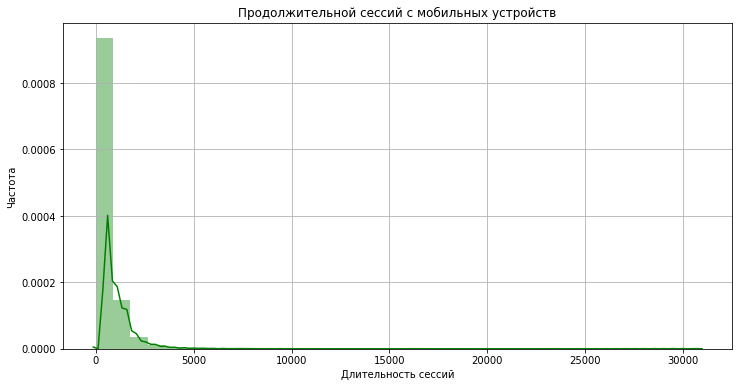

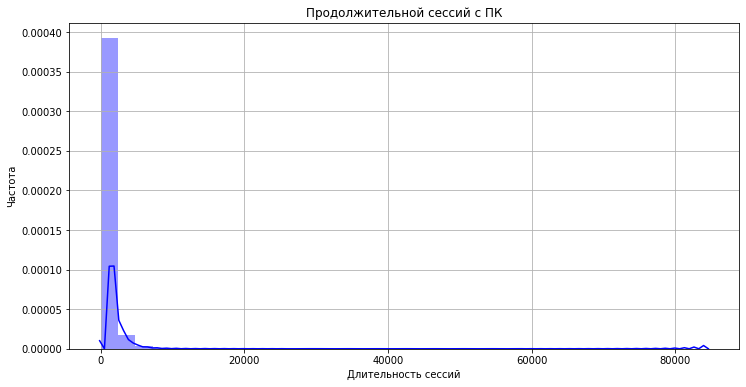

In [20]:
# Построение гистограммы продолжительности сессий
# создание иллюстрации
fig = plt.figure(figsize=(12, 6))
# добавление одного графика на иллюстрацию
graph = fig.add_subplot()
# создание графика
sns.distplot(visits_touch['session_duration_sec'], bins=35, color='green', ax=graph)
# создание названий
plot_names(graph, 'Продолжительной сессий с мобильных устройств', 'Длительность сессий', 'Частота')

# создание иллюстрации
fig = plt.figure(figsize=(12, 6))
# добавление одного графика на иллюстрацию
graph = fig.add_subplot()
# создание графика
sns.distplot(visits_PC['session_duration_sec'], bins=35, color='blue', ax=graph)
# создание названий
plot_names(graph, 'Продолжительной сессий c ПК', 'Длительность сессий', 'Частота')


Распределения на гистограммах продолжительности сессий не являются нормальными, поэтому для определения средней продолжительности сессиий ASL используем моды гистограмм

In [21]:
# Определение средней продолжительности сессии
asl_touch = visits_touch['session_duration_sec'].mode()
print('Средняя продолжительность сессии на мобильных устройствах {0} с'.format(asl_touch[0]))

asl_PC = visits_PC['session_duration_sec'].mode()
print('Средняя продолжительность сессии на мобильных устройствах {0} с'.format(asl_PC[0]))

Средняя продолжительность сессии на мобильных устройствах 60 с
Средняя продолжительность сессии на мобильных устройствах 60 с


<a id='the_destination9'></a>
## 2.4 Определение частоты возвращения людей
Определим коэффициент удержания Retention rate и коэффициент оттока Churn rate

In [22]:
# Определение даты, когда пользователь впервые проявил активность на мобильных устройствах
first_session_date_touch = visits_touch.groupby(['uid'])['start_ts'].min()
first_session_date_touch.name = 'first_session_date'
print('\033[1m' + 'Даты проявления первой активности на мобильных устройствах'+'\033[0m')
display(first_session_date_touch.head(10))
print('\n')
print('\033[1m' + 'Данные о посещениях сайта на мобильных устройствах'+'\033[0m')
visits_touch = visits_touch.join(first_session_date_touch, on='uid')
display(visits_touch.head())

# Определение даты, когда пользователь впервые проявил активность
first_session_date_PC = visits_PC.groupby(['uid'])['start_ts'].min()
first_session_date_PC.name = 'first_session_date'
print('\033[1m' + 'Даты проявления первой активности на ПК '+'\033[0m')
display(first_session_date_PC.head(10))
visits_PC = visits_PC.join(first_session_date_PC, on='uid')
print('\n')
print('\033[1m' + 'Данные о посещениях сайта на ПК'+'\033[0m')
display(visits_PC.head())

Даты проявления первой активности на мобильных устройствах


uid
11863502262781     2018-03-01 17:27:00
49537067089222     2018-02-06 15:55:00
397399764396656    2018-01-18 12:32:00
801587065806307    2017-10-29 13:03:00
1091316338292477   2018-04-04 00:29:00
1362630949957523   2018-02-01 17:34:00
1575281904278712   2017-06-03 10:13:00
1665945393659334   2018-05-03 23:23:00
1694117054512843   2018-03-28 14:48:00
1775552645483506   2018-02-01 12:48:00
Name: first_session_date, dtype: datetime64[ns]



Данные о посещениях сайта на мобильных устройствах


device              end_ts  source_id            start_ts  \
0   touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
2   touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
7   touch 2017-11-05 15:15:00          3 2017-11-05 15:14:00   
14  touch 2018-04-23 18:01:00          9 2018-04-23 18:00:00   
15  touch 2018-02-12 20:30:00          2 2018-02-12 19:24:00   

                     uid  session_year  session_month  session_week  \
0   16879256277535980062          2017             12            51   
2    7459035603376831527          2017              7            26   
7   11423865690854540312          2017             11            44   
14  18026419100367255411          2018              4            17   
15  18188358787673499603          2018              2             7   

   session_date  session_duration_sec  first_session_date  
0    2017-12-20                  1080 2017-12-20 17:20:00  
2    2017-07-01                     0 2017-07-01 01:54:00  
7    2017-11-05                    60 2017-11-05 15:14:00  
14   2018-04-23                    60 2017-10-04 22:44:00  
15   2018-02-12                  3960 2018-02-10 12:17:00

Даты проявления первой активности на ПК 


uid
297729379853735   2017-06-07 18:47:00
313578113262317   2017-09-18 22:49:00
325320750514679   2017-09-30 14:29:00
407573351275847   2017-06-17 13:40:00
498809019029702   2018-02-21 22:09:00
526778907996220   2017-10-21 17:51:00
577434573913691   2018-01-28 14:15:00
639163879428517   2018-03-13 14:17:00
673910773442622   2017-09-25 01:33:00
728666161001356   2018-04-04 16:38:00
Name: first_session_date, dtype: datetime64[ns]



Данные о посещениях сайта на ПК


device              end_ts  source_id            start_ts  \
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   
5  desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
6  desktop 2018-01-30 12:09:00          1 2018-01-30 11:13:00   

                    uid  session_year  session_month  session_week  \
1    104060357244891740          2018              2             8   
3  16174680259334210214          2018              5            20   
4   9969694820036681168          2017             12            52   
5  16007536194108375387          2017              9            35   
6   6661610529277171451          2018              1             5   

  session_date  session_duration_sec  first_session_date  
1   2018-02-19                  1680 2018-02-19 16:53:00  
3   2018-05-20                  1440 2018-03-09 20:05:00  
4   2017-12-27                     0 2017-12-27 14:06:00  
5   2017-09-03                    60 2017-09-03 21:35:00  
6   2018-01-30                  3360 2017-06-29 09:00:00

Сформируем когорты периодом в один месяц, так как диапазон рассматриваемых данных составляет 2 года, то изучение когорт в одну неделю не является необходимым.  

In [23]:
# Определение идентификатора месяца на мобильных устройствах
print('\033[1m' + 'Данные о посещениях сайта на мобильных устройствах'+'\033[0m')
visits_touch['first_session_month'] = visits_touch['first_session_date'].astype('datetime64[M]')
display(visits_touch.head())
print('\n')
print('\033[1m' + 'Данные о посещениях сайта на ПК'+'\033[0m')
# Определение идентификатора месяца на ПК
visits_PC['first_session_month'] = visits_PC['first_session_date'].astype('datetime64[M]')
display(visits_PC.head())

Данные о посещениях сайта на мобильных устройствах


device              end_ts  source_id            start_ts  \
0   touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
2   touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
7   touch 2017-11-05 15:15:00          3 2017-11-05 15:14:00   
14  touch 2018-04-23 18:01:00          9 2018-04-23 18:00:00   
15  touch 2018-02-12 20:30:00          2 2018-02-12 19:24:00   

                     uid  session_year  session_month  session_week  \
0   16879256277535980062          2017             12            51   
2    7459035603376831527          2017              7            26   
7   11423865690854540312          2017             11            44   
14  18026419100367255411          2018              4            17   
15  18188358787673499603          2018              2             7   

   session_date  session_duration_sec  first_session_date first_session_month  
0    2017-12-20                  1080 2017-12-20 17:20:00          2017-12-01  
2    2017-07-01                     0 2017-07-01 01:54:00          2017-07-01  
7    2017-11-05                    60 2017-11-05 15:14:00          2017-11-01  
14   2018-04-23                    60 2017-10-04 22:44:00          2017-10-01  
15   2018-02-12                  3960 2018-02-10 12:17:00          2018-02-01



Данные о посещениях сайта на ПК


device              end_ts  source_id            start_ts  \
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   
5  desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
6  desktop 2018-01-30 12:09:00          1 2018-01-30 11:13:00   

                    uid  session_year  session_month  session_week  \
1    104060357244891740          2018              2             8   
3  16174680259334210214          2018              5            20   
4   9969694820036681168          2017             12            52   
5  16007536194108375387          2017              9            35   
6   6661610529277171451          2018              1             5   

  session_date  session_duration_sec  first_session_date first_session_month  
1   2018-02-19                  1680 2018-02-19 16:53:00          2018-02-01  
3   2018-05-20                  1440 2018-03-09 20:05:00          2018-03-01  
4   2017-12-27                     0 2017-12-27 14:06:00          2017-12-01  
5   2017-09-03                    60 2017-09-03 21:35:00          2017-09-01  
6   2018-01-30                  3360 2017-06-29 09:00:00          2017-06-01

In [24]:
# Определение времени жизни когорты на мобильных устройствах
print('\033[1m' + 'Данные о посещениях сайта на мобильных устройствах'+'\033[0m')
visits_touch['cohort_lifetime'] = visits_touch['start_ts'].astype('datetime64[M]') - visits_touch['first_session_month']
visits_touch['cohort_lifetime'] = visits_touch['cohort_lifetime'] / np.timedelta64(1,'M')
visits_touch['cohort_lifetime'] = visits_touch['cohort_lifetime'].round()
visits_touch['cohort_lifetime'] = visits_touch['cohort_lifetime'].astype(('int'))
display(visits_touch.head())

print('\n')
print('\033[1m' + 'Данные о посещениях сайта на ПК'+'\033[0m')
# Определение времени жизни когорты на ПК
visits_PC['cohort_lifetime'] = visits_PC['start_ts'].astype('datetime64[M]') - visits_PC['first_session_month']
visits_PC['cohort_lifetime'] = visits_PC['cohort_lifetime'] / np.timedelta64(1,'M')
visits_PC['cohort_lifetime'] = visits_PC['cohort_lifetime'].round()
visits_PC['cohort_lifetime'] = visits_PC['cohort_lifetime'].astype('int')
display(visits_PC.head())

Данные о посещениях сайта на мобильных устройствах


device              end_ts  source_id            start_ts  \
0   touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
2   touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
7   touch 2017-11-05 15:15:00          3 2017-11-05 15:14:00   
14  touch 2018-04-23 18:01:00          9 2018-04-23 18:00:00   
15  touch 2018-02-12 20:30:00          2 2018-02-12 19:24:00   

                     uid  session_year  session_month  session_week  \
0   16879256277535980062          2017             12            51   
2    7459035603376831527          2017              7            26   
7   11423865690854540312          2017             11            44   
14  18026419100367255411          2018              4            17   
15  18188358787673499603          2018              2             7   

   session_date  session_duration_sec  first_session_date first_session_month  \
0    2017-12-20                  1080 2017-12-20 17:20:00          2017-12-01   
2    2017-07-01                     0 2017-07-01 01:54:00          2017-07-01   
7    2017-11-05                    60 2017-11-05 15:14:00          2017-11-01   
14   2018-04-23                    60 2017-10-04 22:44:00          2017-10-01   
15   2018-02-12                  3960 2018-02-10 12:17:00          2018-02-01   

    cohort_lifetime  
0                 0  
2                 0  
7                 0  
14                6  
15                0



Данные о посещениях сайта на ПК


device              end_ts  source_id            start_ts  \
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   
5  desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
6  desktop 2018-01-30 12:09:00          1 2018-01-30 11:13:00   

                    uid  session_year  session_month  session_week  \
1    104060357244891740          2018              2             8   
3  16174680259334210214          2018              5            20   
4   9969694820036681168          2017             12            52   
5  16007536194108375387          2017              9            35   
6   6661610529277171451          2018              1             5   

  session_date  session_duration_sec  first_session_date first_session_month  \
1   2018-02-19                  1680 2018-02-19 16:53:00          2018-02-01   
3   2018-05-20                  1440 2018-03-09 20:05:00          2018-03-01   
4   2017-12-27                     0 2017-12-27 14:06:00          2017-12-01   
5   2017-09-03                    60 2017-09-03 21:35:00          2017-09-01   
6   2018-01-30                  3360 2017-06-29 09:00:00          2017-06-01   

   cohort_lifetime  
1                0  
3                2  
4                0  
5                0  
6                7

In [25]:
# Группировка данных по когорте и времени жизни когорты на мобильных устройствах
print('\033[1m' + 'Данные о посещениях сайта на мобильных устройствах, отсортированные по когортам'+'\033[0m')
cohorts_touch = visits_touch.groupby(['first_session_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
display(cohorts_touch)

print('\n')
print('\033[1m' + 'Данные о посещениях сайта на ПК, отсортированные по когортам'+'\033[0m')
# Группировка данных по когорте и времени жизни когорты
cohorts_PC = visits_PC.groupby(['first_session_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
display(cohorts_PC)

Данные о посещениях сайта на мобильных устройствах, отсортированные по когортам


first_session_month  cohort_lifetime   uid
0           2017-06-01                0  3655
1           2017-06-01                1   187
2           2017-06-01                2   112
3           2017-06-01                3   124
4           2017-06-01                4   152
..                 ...              ...   ...
73          2018-03-01                1   238
74          2018-03-01                2   147
75          2018-04-01                0  5311
76          2018-04-01                1   205
77          2018-05-01                0  5501

[78 rows x 3 columns]



Данные о посещениях сайта на ПК, отсортированные по когортам


first_session_month  cohort_lifetime    uid
0           2017-06-01                0   9761
1           2017-06-01                1    771
2           2017-06-01                2    541
3           2017-06-01                3    620
4           2017-06-01                4    678
..                 ...              ...    ...
73          2018-03-01                1    615
74          2018-03-01                2    381
75          2018-04-01                0  11055
76          2018-04-01                1    540
77          2018-05-01                0  10465

[78 rows x 3 columns]

In [26]:
# Определение числа пользователей, изначально бывших в когорте, для мобильных устройств
print('\033[1m' + 'Число пользователей, изначально бывших в когорте, для мобильных устройств'+'\033[0m')
initial_users_count_touch = cohorts_touch[cohorts_touch['cohort_lifetime'] == 0][['first_session_month','uid']]
initial_users_count_touch = initial_users_count_touch.rename(columns={'uid':'cohort_users'})
display(initial_users_count_touch)
# Объединение данных по когортам с исходным количеством пользователей в когорте
cohorts_touch = cohorts_touch.merge(initial_users_count_touch,on='first_session_month')

print('\n')
print('\033[1m' + 'Число пользователей, изначально бывших в когорте, для ПК'+'\033[0m')
# Определение числа пользователей, изначально бывших в когорте
initial_users_count_PC = cohorts_PC[cohorts_PC['cohort_lifetime'] == 0][['first_session_month','uid']]
initial_users_count_PC = initial_users_count_PC.rename(columns={'uid':'cohort_users'})
display(initial_users_count_PC)
# Объединение данных по когортам с исходным количеством пользователей в когорте
cohorts_PC = cohorts_PC.merge(initial_users_count_PC,on='first_session_month')

Число пользователей, изначально бывших в когорте, для мобильных устройств


first_session_month  cohort_users
0           2017-06-01          3655
12          2017-07-01          4036
23          2017-08-01          2865
33          2017-09-01          5256
42          2017-10-01          8055
50          2017-11-01          7792
57          2017-12-01          7459
63          2018-01-01          7387
68          2018-02-01          7206
72          2018-03-01          6822
75          2018-04-01          5311
77          2018-05-01          5501



Число пользователей, изначально бывших в когорте, для ПК


first_session_month  cohort_users
0           2017-06-01          9761
12          2017-07-01          9374
23          2017-08-01          7532
33          2017-09-01         11838
42          2017-10-01         18638
50          2017-11-01         20400
57          2017-12-01         18760
63          2018-01-01         16072
68          2018-02-01         15911
72          2018-03-01         14717
75          2018-04-01         11055
77          2018-05-01         10465

In [27]:
# Определение коэффициента удержания Retention Rate на мобильных устройствах
print('\033[1m' + 'Данные о посещениях сайта на мобильных устройствах, отсортированные по когортам'+'\033[0m')
cohorts_touch['retention'] = cohorts_touch['uid']/cohorts_touch['cohort_users']
display(cohorts_touch)

print('\n')
print('\033[1m' + 'Данные о посещениях сайта на ПК, отсортированные по когортам'+'\033[0m')
# Определение коэффициента удержания Retention Rate на ПК
cohorts_PC['retention'] = cohorts_PC['uid']/cohorts_PC['cohort_users']
display(cohorts_PC)

Данные о посещениях сайта на мобильных устройствах, отсортированные по когортам


first_session_month  cohort_lifetime   uid  cohort_users  retention
0           2017-06-01                0  3655          3655   1.000000
1           2017-06-01                1   187          3655   0.051163
2           2017-06-01                2   112          3655   0.030643
3           2017-06-01                3   124          3655   0.033926
4           2017-06-01                4   152          3655   0.041587
..                 ...              ...   ...           ...        ...
73          2018-03-01                1   238          6822   0.034887
74          2018-03-01                2   147          6822   0.021548
75          2018-04-01                0  5311          5311   1.000000
76          2018-04-01                1   205          5311   0.038599
77          2018-05-01                0  5501          5501   1.000000

[78 rows x 5 columns]



Данные о посещениях сайта на ПК, отсортированные по когортам


first_session_month  cohort_lifetime    uid  cohort_users  retention
0           2017-06-01                0   9761          9761   1.000000
1           2017-06-01                1    771          9761   0.078988
2           2017-06-01                2    541          9761   0.055425
3           2017-06-01                3    620          9761   0.063518
4           2017-06-01                4    678          9761   0.069460
..                 ...              ...    ...           ...        ...
73          2018-03-01                1    615         14717   0.041788
74          2018-03-01                2    381         14717   0.025888
75          2018-04-01                0  11055         11055   1.000000
76          2018-04-01                1    540         11055   0.048847
77          2018-05-01                0  10465         10465   1.000000

[78 rows x 5 columns]

In [28]:
# Построение сводной таблицы для мобильных устройств
print('\033[1m' + 'Динамика удержания пользователей на мобильных устройствах'+'\033[0m')
retention_pivot_touch = cohorts_touch.pivot_table(index='first_session_month',columns='cohort_lifetime',values='retention',aggfunc='sum')
display(retention_pivot_touch)

print('\n')
print('\033[1m' + 'Динамика удержания пользователей на ПК'+'\033[0m')
# Построение сводной таблицы
retention_pivot_PC = cohorts_PC.pivot_table(index='first_session_month',columns='cohort_lifetime',values='retention',aggfunc='sum')
display(retention_pivot_PC)

Динамика удержания пользователей на мобильных устройствах


cohort_lifetime       0         1         2         3         4         5   \
first_session_month                                                          
2017-06-01           1.0  0.051163  0.030643  0.033926  0.041587  0.033926   
2017-07-01           1.0  0.038404  0.031715  0.035927  0.034688  0.029485   
2017-08-01           1.0  0.059686  0.046771  0.042583  0.030366  0.031414   
2017-09-01           1.0  0.070396  0.048326  0.032534  0.028919  0.021689   
2017-10-01           1.0  0.059714  0.040472  0.026816  0.021477  0.021105   
2017-11-01           1.0  0.065837  0.035806  0.028619  0.025411  0.015529   
2017-12-01           1.0  0.055369  0.029763  0.025607  0.014613  0.011396   
2018-01-01           1.0  0.051442  0.031948  0.018140  0.013267       NaN   
2018-02-01           1.0  0.043575  0.017485  0.017347       NaN       NaN   
2018-03-01           1.0  0.034887  0.021548       NaN       NaN       NaN   
2018-04-01           1.0  0.038599       NaN       NaN       NaN       NaN   
2018-05-01           1.0       NaN       NaN       NaN       NaN       NaN   

cohort_lifetime            6         7         8         9         10       11  
first_session_month                                                             
2017-06-01           0.030096  0.028728  0.025171  0.023529  0.018605  0.02435  
2017-07-01           0.024529  0.025768  0.022795  0.015857  0.016105      NaN  
2017-08-01           0.026527  0.027923  0.012216  0.013264       NaN      NaN  
2017-09-01           0.021689  0.013508  0.015411       NaN       NaN      NaN  
2017-10-01           0.013656  0.010801       NaN       NaN       NaN      NaN  
2017-11-01           0.016170       NaN       NaN       NaN       NaN      NaN  
2017-12-01                NaN       NaN       NaN       NaN       NaN      NaN  
2018-01-01                NaN       NaN       NaN       NaN       NaN      NaN  
2018-02-01                NaN       NaN       NaN       NaN       NaN      NaN  
2018-03-01                NaN       NaN       NaN       NaN       NaN      NaN  
2018-04-01                NaN       NaN       NaN       NaN       NaN      NaN  
2018-05-01                NaN       NaN       NaN       NaN       NaN      NaN



Динамика удержания пользователей на ПК


cohort_lifetime       0         1         2         3         4         5   \
first_session_month                                                          
2017-06-01           1.0  0.078988  0.055425  0.063518  0.069460  0.074275   
2017-07-01           1.0  0.057393  0.051419  0.055686  0.058673  0.046938   
2017-08-01           1.0  0.075544  0.062666  0.062931  0.051912  0.042618   
2017-09-01           1.0  0.082446  0.070620  0.051867  0.038182  0.039111   
2017-10-01           1.0  0.078013  0.051615  0.037397  0.033748  0.032300   
2017-11-01           1.0  0.075049  0.042549  0.037255  0.031912  0.022794   
2017-12-01           1.0  0.050053  0.036514  0.028891  0.018657  0.018657   
2018-01-01           1.0  0.057554  0.038265  0.024452  0.020284       NaN   
2018-02-01           1.0  0.056250  0.024888  0.018792       NaN       NaN   
2018-03-01           1.0  0.041788  0.025888       NaN       NaN       NaN   
2018-04-01           1.0  0.048847       NaN       NaN       NaN       NaN   
2018-05-01           1.0       NaN       NaN       NaN       NaN       NaN   

cohort_lifetime            6         7         8         9         10  \
first_session_month                                                     
2017-06-01           0.061059  0.058601  0.053785  0.050302  0.040775   
2017-07-01           0.045765  0.044165  0.038404  0.029016  0.024749   
2017-08-01           0.034785  0.038237  0.029607  0.027616       NaN   
2017-09-01           0.034888  0.023568  0.022301       NaN       NaN   
2017-10-01           0.021354  0.020764       NaN       NaN       NaN   
2017-11-01           0.021225       NaN       NaN       NaN       NaN   
2017-12-01                NaN       NaN       NaN       NaN       NaN   
2018-01-01                NaN       NaN       NaN       NaN       NaN   
2018-02-01                NaN       NaN       NaN       NaN       NaN   
2018-03-01                NaN       NaN       NaN       NaN       NaN   
2018-04-01                NaN       NaN       NaN       NaN       NaN   
2018-05-01                NaN       NaN       NaN       NaN       NaN   

cohort_lifetime            11  
first_session_month            
2017-06-01           0.043746  
2017-07-01                NaN  
2017-08-01                NaN  
2017-09-01                NaN  
2017-10-01                NaN  
2017-11-01                NaN  
2017-12-01                NaN  
2018-01-01                NaN  
2018-02-01                NaN  
2018-03-01                NaN  
2018-04-01                NaN  
2018-05-01                NaN

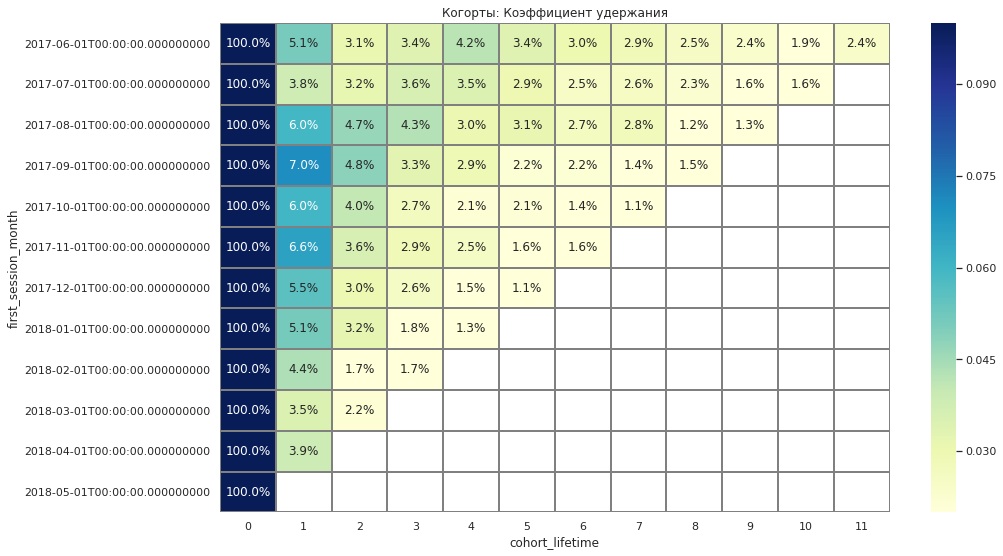

In [29]:
# Построение тепловой карты для мобильных устройств
sns.set(style='white')
plt.figure(figsize=(15, 9))
plt.title('Когорты: Коэффициент удержания')
sns.heatmap(retention_pivot_touch, annot=True, fmt='.1%', linewidths=1, linecolor='gray', cmap='YlGnBu', vmin = 0.02, vmax=0.1)

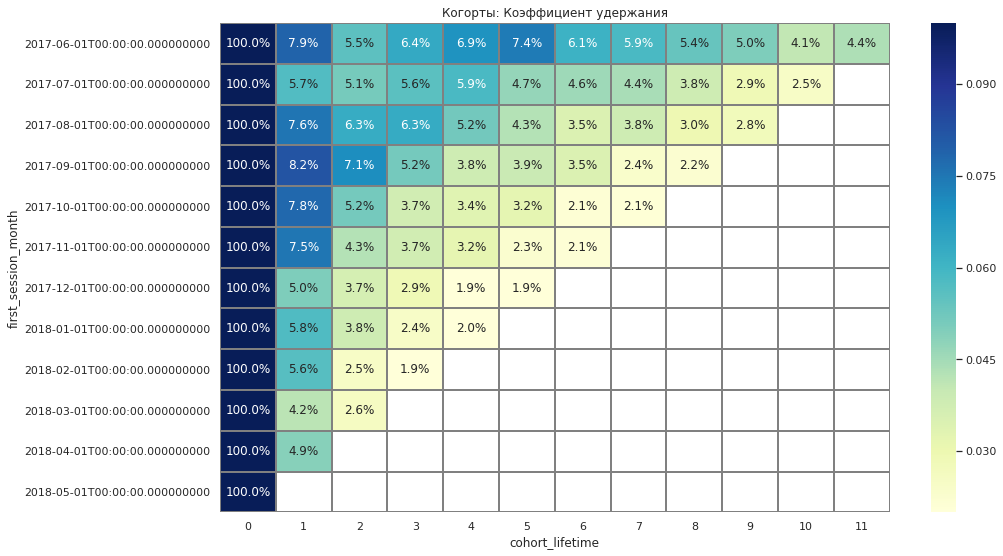

In [30]:
# Построение тепловой карты
sns.set(style='white')
plt.figure(figsize=(15, 9))
plt.title('Когорты: Коэффициент удержания')
sns.heatmap(retention_pivot_PC, annot=True, fmt='.1%', linewidths=1, linecolor='gray', cmap='YlGnBu', vmin = 0.02, vmax=0.1)

In [31]:
# Определение коэффициента оттока для мобильных устройств
print('\033[1m' + 'Данные о посещениях сайта на мобильных устройствах, отсортированные по когортам'+'\033[0m')
cohorts_touch['churn_rate'] = cohorts_touch.groupby(['first_session_month'])['uid'].pct_change()
display(cohorts_touch.head())
print('\n')
print('\033[1m' + 'Данные о посещениях сайта на ПК, отсортированные по когортам'+'\033[0m')
# Определение коэффициента оттока
cohorts_PC['churn_rate'] = cohorts_PC.groupby(['first_session_month'])['uid'].pct_change()
display(cohorts_PC.head())


Данные о посещениях сайта на мобильных устройствах, отсортированные по когортам


first_session_month  cohort_lifetime   uid  cohort_users  retention  \
0          2017-06-01                0  3655          3655   1.000000   
1          2017-06-01                1   187          3655   0.051163   
2          2017-06-01                2   112          3655   0.030643   
3          2017-06-01                3   124          3655   0.033926   
4          2017-06-01                4   152          3655   0.041587   

   churn_rate  
0         NaN  
1   -0.948837  
2   -0.401070  
3    0.107143  
4    0.225806



Данные о посещениях сайта на ПК, отсортированные по когортам


first_session_month  cohort_lifetime   uid  cohort_users  retention  \
0          2017-06-01                0  9761          9761   1.000000   
1          2017-06-01                1   771          9761   0.078988   
2          2017-06-01                2   541          9761   0.055425   
3          2017-06-01                3   620          9761   0.063518   
4          2017-06-01                4   678          9761   0.069460   

   churn_rate  
0         NaN  
1   -0.921012  
2   -0.298314  
3    0.146026  
4    0.093548

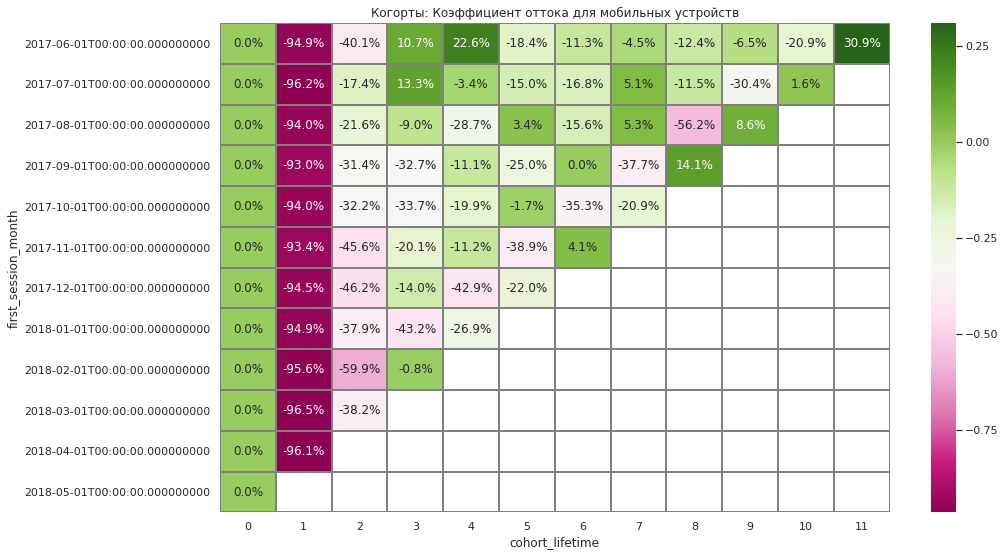

In [32]:
# Построение тепловой карты для мобильных устройств

churn_pivot_touch = cohorts_touch.pivot_table(index='first_session_month',columns='cohort_lifetime',values='churn_rate',aggfunc='sum')

sns.set(style='white')
plt.figure(figsize=(15, 9))
plt.title('Когорты: Коэффициент оттока для мобильных устройств')
sns.heatmap(churn_pivot_touch, annot=True, fmt='.1%', linewidths=1, linecolor='gray', cmap='PiYG')



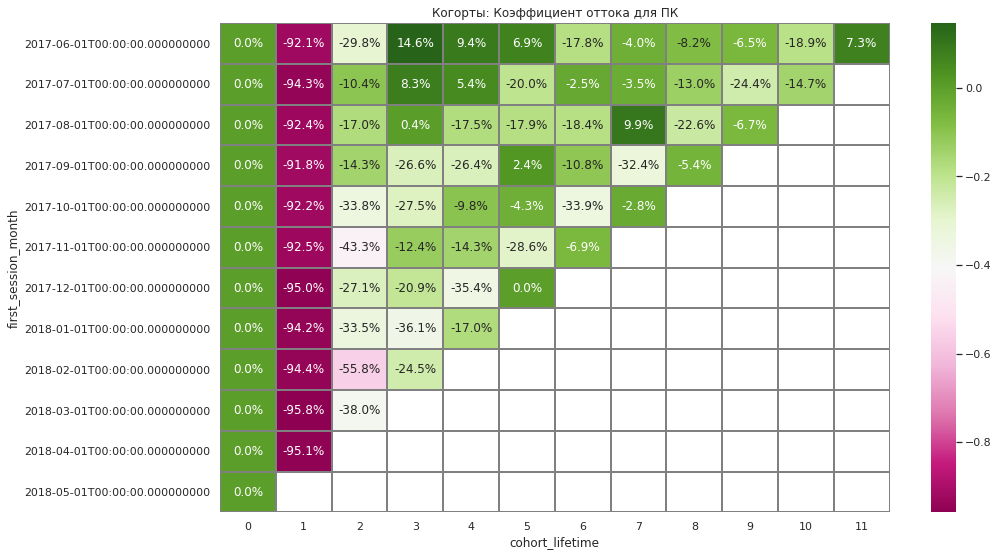

In [33]:
# Построение тепловой карты

churn_pivot_PC = cohorts_PC.pivot_table(index='first_session_month',columns='cohort_lifetime',values='churn_rate',aggfunc='sum')

sns.set(style='white')
plt.figure(figsize=(15, 9))
plt.title('Когорты: Коэффициент оттока для ПК')
sns.heatmap(churn_pivot_PC, annot=True, fmt='.1%', linewidths=1, linecolor='gray', cmap='PiYG')

<a id='the_destination10'></a>
## Вывод по разделу 2

Проанализируем полученные данные по пользовательским метрикам для мобильных устройств и ПК. Для более эффективного анализа сведем полученные данные в общую таблицу.

In [34]:
users_engagement = pd.DataFrame([[1, 'DAU', int(dau_total_touch), int(dau_total_PC)],
                                 [2,'WAU', int(wau_total_touch), int(wau_total_PC)],
                                 [3,'MAU', int(mau_total_touch), int(mau_total_PC)],
                                 [4, 'week_sticky_factor', sticky_factor_week_touch[0], sticky_factor_week_PC[0]],
                                 [5, 'month_sticky_factor', sticky_factor_month_touch[0], sticky_factor_month_PC[0]]],
                                columns=['index', 'metric', 'touch', 'PC'])
print('Таблица 1. Данные по пользовательским метрикам для мобильных устройств и ПК')
display(users_engagement)

Таблица 1. Данные по пользовательским метрикам для мобильных устройств и ПК


index               metric        touch            PC
0      1                  DAU   252.000000    659.000000
1      2                  WAU  1634.000000   4129.000000
2      3                  MAU  6825.000000  16724.000000
3      4   week_sticky_factor    15.466970     15.964233
4      5  month_sticky_factor     3.704605      3.941691

Проанализировав таблицу 1 можно сделать вывод, что количество уникальных пользователей для пользователей ПК значительно выше, чем для пользователей мобильных устройств, то есть большая часть пользователей сайта Яндекс.Афиша заходят на него через компьютер. Коэффициент прилипаемости для пользователей ПК и мобильных устройств практически не отличается. Это говорит о том, что регулярность пользования Яндекс.Афиши на ПК и мобильных устройствах не отличается. 

session_month  MAU_touch  MAU_PC
0               6       3655    9761
1               7       4223   10145
2               8       3132    8611
3               9       5679   13509
4              10       8856   21286
5              11       8913   24439
6              12       8785   23294
7               1       8741   20350
8               2       8590   20574
9               3       8303   19574
10              4       6387   14844
11              5       6647   14312

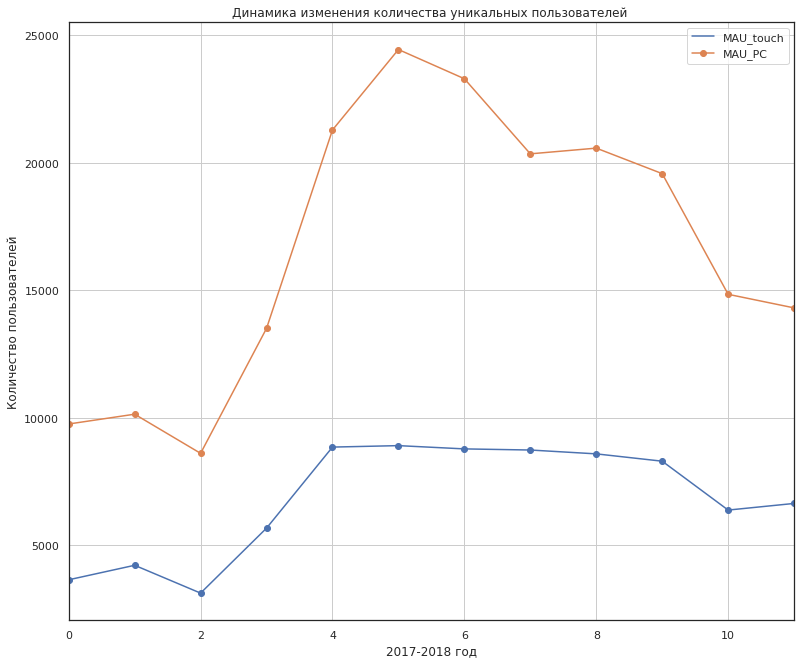

In [35]:
# построение графика динамики изменения количества уникальных пользователей по месяцам
mau = visits_touch.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'})
mau_PC = visits_PC.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'})
mau = mau.merge(mau_PC,on='session_month').reset_index()
mau.rename(columns={'uid_x': 'MAU_touch', 'uid_y': 'MAU_PC'}, inplace=True)
display(mau)

# создание иллюстрации
fig = plt.figure(figsize=(8, 10))
# добавление одного графика на иллюстрацию
graph = fig.add_subplot()
# создание графика
mau.plot(y='MAU_touch', style='-o',figsize=(13, 11), grid=True, ax=graph)
mau.plot(y='MAU_PC', style='-o',figsize=(13, 11), grid=True, ax=graph)
# создание названий
plot_names(graph, 'Динамика изменения количества уникальных пользователей ', '2017-2018 год', 'Количество пользователей')

Для анализа динамики изменения количества пользователей с течением времени рассмотрим динамику изменения MAU в анализируемом периоде. Для этого построим графики изменения MAU для пользователей мобильных устройств и ПК. Хорошо видно, что с начала анализируемого периода (июнь 2017 года) до ноября наблюдался рост количества пользователей Яндекс.Афиши, но после ноября количество пользователей начало снижаться. Вероятно это связано с сезонностью использования приложений и сайтов для поиска информации о развлекательных мероприятиях, наибольший спрос на эти услуги существует в период, когда пользователи осуществляют поиск информации и покупку билетов на новогодние праздники. Однако, для более тщательной оценки поведения пользователей целесообразно оценить также коэффициенты оттока и удержания для Яндекс.Афиши. 

На рис. 1 и рис. 2 изображены тепловые таблицы с изменением коэффицента удержания для пользователей разных когорт. Для пользователей мобильных устройств видно, что для пользователей зарегистрировавшиеся с августа 2017 до января 2018 года коэффициент удержания незначительно выше, чем для пользователей других когорт, однако после февраля 2018 года для пользователей всех когорт коэффициент удержания падает. Для пользователей ПК наиболее активно пользующимися являются когорты пользователей, зарегистрировавшихся до ноября 2017 года, пользователи более поздних когорт имеют значительно меньший коэффициент удержания. Можно отметить, что доя пользователей ПК, что для пользователей мобильных устройств коэффициент удержания значительно снижается после января 2018 года, что может говорить о снижении интереса к продукту. Также надо отметить, что для пользователей ПК и пользователей мобильных устройств всех когорт отмечается незначительное снижения коэффициента удержания после марта 2018 года, 
видимо это связано с тем, что основная масса пользователей осуществляет пользование Яндекс.Афишей в период сезона праздников, осуществляя изучение афиши и покупку билетов к новогодним праздникам, 14 февраля, 23 февраля и 8 марта, поэтому к апрелю спрос на услуги снижается, восстанавливаясь к майским праздникам. 

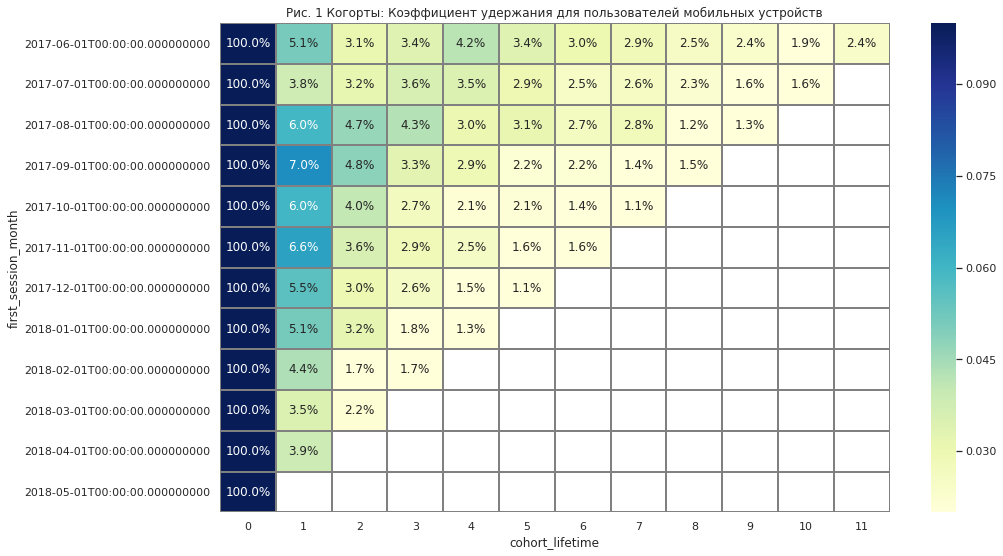

In [36]:
plt.figure(figsize=(15, 9))
plt.title('Рис. 1 Когорты: Коэффициент удержания для пользователей мобильных устройств')
sns.heatmap(retention_pivot_touch, annot=True, fmt='.1%', linewidths=1, linecolor='gray', cmap='YlGnBu', vmin = 0.02, vmax=0.1)


Эта динамика также хорошо заметна на рис. 3-4, где изображены тепловые таблицы с коэффициентами оттока пользователей. 

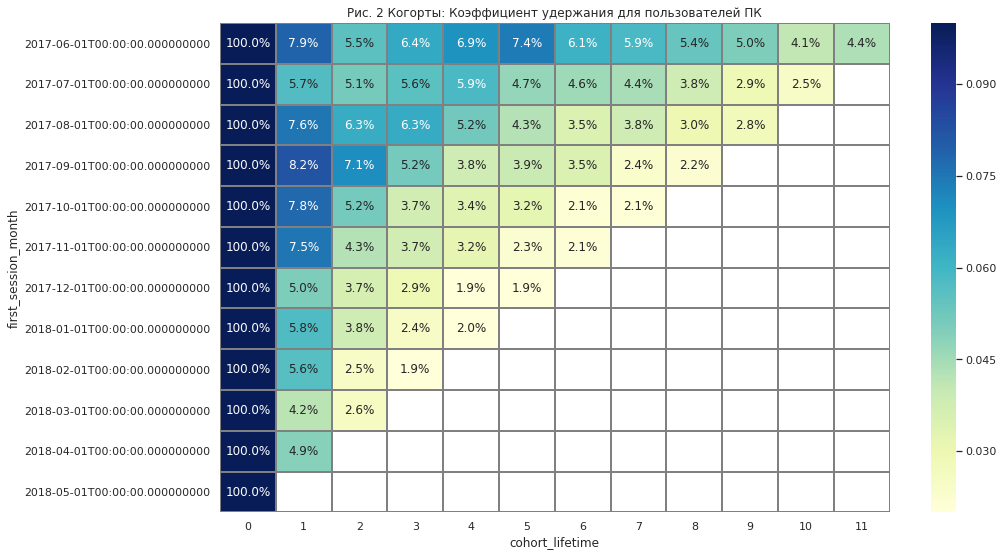

In [37]:
plt.figure(figsize=(15, 9))
plt.title('Рис. 2 Когорты: Коэффициент удержания для пользователей ПК')
sns.heatmap(retention_pivot_PC, annot=True, fmt='.1%', linewidths=1, linecolor='gray', cmap='YlGnBu', vmin = 0.02, vmax=0.1)

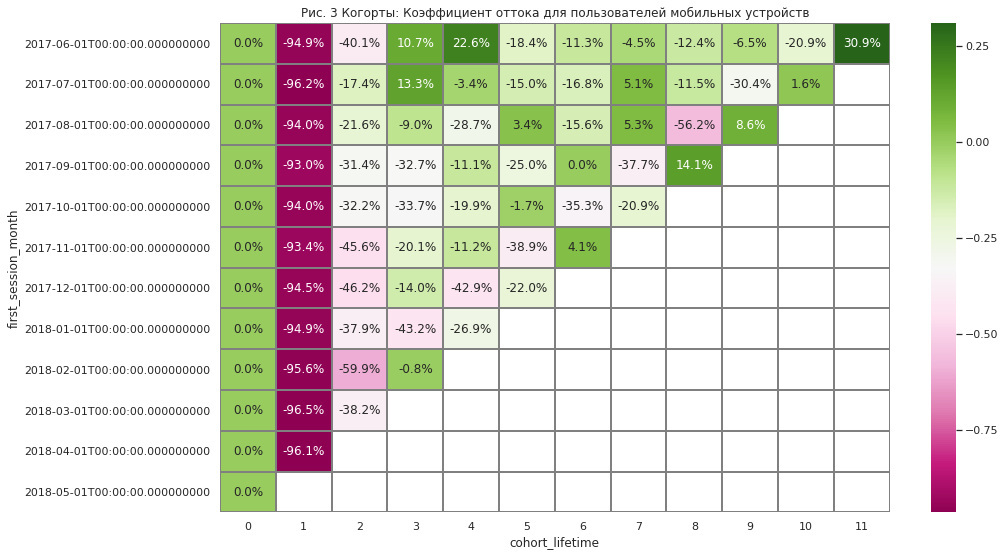

In [38]:
plt.figure(figsize=(15, 9))
plt.title('Рис. 3 Когорты: Коэффициент оттока для пользователей мобильных устройств')
sns.heatmap(churn_pivot_touch, annot=True, fmt='.1%', linewidths=1, linecolor='gray', cmap='PiYG')


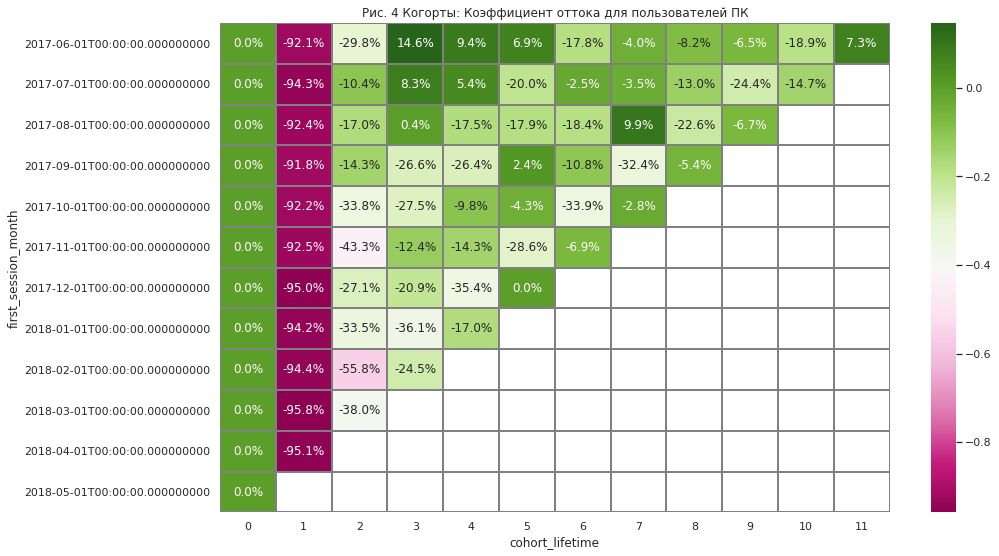

In [39]:
plt.figure(figsize=(15, 9))
plt.title('Рис. 4 Когорты: Коэффициент оттока для пользователей ПК')
sns.heatmap(churn_pivot_PC, annot=True, fmt='.1%', linewidths=1, linecolor='gray', cmap='PiYG')

В таблице 2 приведены данные о пользовательских сессиях для мобильных устройств и ПК.

In [40]:
data_sessions = sessions_per_user_yearly

# Определение средней продолжительности сессии
visits_touch_2017 = visits_touch.query('session_year == 2017')
asl_touch_2017 = visits_touch_2017['session_duration_sec'].mode()

visits_touch_2018 = visits_touch.query('session_year == 2018')
asl_touch_2018 = visits_touch_2018['session_duration_sec'].mode()

visits_PC_2017 = visits_PC.query('session_year == 2017')
asl_PC_2017 = visits_PC_2017['session_duration_sec'].mode()

visits_PC_2018 = visits_PC.query('session_year == 2018')
asl_PC_2018 = visits_PC_2018['session_duration_sec'].mode()

data_sessions['asl'] = [asl_touch_2017[0], asl_touch_2018[0], asl_PC_2017[0], asl_PC_2018[0]]
print('Таблица 2. Данные о пользовательских сессиях')
display(data_sessions)

Таблица 2. Данные о пользовательских сессиях


mean  asl
session_year device                
2017         desktop  1.084203   60
             touch    1.051739   60
2018         desktop  1.095735   60
             touch    1.050113   60

Хорошо видно, что для пользователей мобильных устройств и ПК средняя продолжительность пользовательской сессии и количество пользовательских сессий в день не отличаются. И этот показатель практически не меняется с течением времени. В среднем пользователи пользуются Яндекс.Афишей 1 раз в день в течение 60 с. 

<a id='the_destination11'></a>
# 3. Построение отчетов и метрик для продаж

<a id='the_destination12'></a>
## 3.1 Оценка распределения времени от первой даты посещения до первой покупки

Для анализа данных распределения времени построим сводную таблицу из двух датафреймов - с информацией о посещениях сайта visits и покупках. Также как для предыдущего задания разделим его на два датасета - для мобильных устройств и ПК.

In [41]:
# Создание сводной таблицы
sales = visits.merge(orders,on='uid')

# Удаление строк, для которых дата покупки меньше даты входа, и тех строк, где отсутствует значение времени покупки (покупка не совершалась)
sales = sales[~sales['buy_ts'].isna() & (sales['buy_ts'] > sales['start_ts'])]

# Создание срезов для мобильных устройств sales_touch и ПК sales_PC
# Создание срезов по устройствам
sales_touch = sales[sales['device'] == 'touch']
sales_PC = sales[sales['device'] == 'desktop']

print('\033[1m' + 'Данные о посещениях сайта и заказах на мобильных устройствах'+'\033[0m')
display(sales_touch.head())

print('\n')
print('\033[1m' + 'Данные о посещениях сайта и заказах на ПК'+'\033[0m')
display(sales_PC.head())

Данные о посещениях сайта и заказах на мобильных устройствах


device              end_ts  source_id            start_ts  \
9982  touch 2018-02-12 20:30:00          2 2018-02-12 19:24:00   
9983  touch 2018-02-12 20:30:00          2 2018-02-12 19:24:00   
9985  touch 2018-02-13 20:13:00          2 2018-02-13 19:45:00   
9986  touch 2018-02-10 12:17:00          3 2018-02-10 12:17:00   
9987  touch 2018-02-10 12:17:00          3 2018-02-10 12:17:00   

                       uid  session_year  session_month  session_week  \
9982  18188358787673499603          2018              2             7   
9983  18188358787673499603          2018              2             7   
9985  18188358787673499603          2018              2             7   
9986  18188358787673499603          2018              2             6   
9987  18188358787673499603          2018              2             6   

     session_date              buy_ts  revenue  
9982   2018-02-12 2018-02-12 19:48:00     0.73  
9983   2018-02-12 2018-02-13 19:48:00     0.06  
9985   2018-02-13 2018-02-13 19:48:00     0.06  
9986   2018-02-10 2018-02-12 19:48:00     0.73  
9987   2018-02-10 2018-02-13 19:48:00     0.06



Данные о посещениях сайта и заказах на ПК


device              end_ts  source_id            start_ts  \
1  desktop 2018-03-09 20:33:00          4 2018-03-09 20:05:00   
2  desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
3  desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
4  desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
6  desktop 2017-10-27 16:02:00          3 2017-10-27 15:20:00   

                    uid  session_year  session_month  session_week  \
1  16174680259334210214          2018              3            10   
2  16007536194108375387          2017              9            35   
3  16007536194108375387          2017              9            35   
4  16007536194108375387          2017              9            35   
6  16007536194108375387          2017             10            43   

  session_date              buy_ts  revenue  
1   2018-03-09 2018-03-09 20:25:00     2.33  
2   2017-09-03 2017-09-04 12:46:00     2.44  
3   2017-09-03 2017-10-28 00:01:00     1.53  
4   2017-09-03 2017-10-28 19:16:00     1.53  
6   2017-10-27 2017-10-28 00:01:00     1.53

In [42]:
# Добавление данных о первом посещении в таблицы с данными
sales_touch = sales_touch.join(first_session_date_touch, on='uid')

sales_PC = sales_PC.join(first_session_date_PC, on='uid')

# Добавление данных о первой покупке в таблицы с данными 
first_buy_date_touch = sales_touch.groupby(['uid'])['buy_ts'].min()
first_buy_date_touch.name = 'first_buy_date'
sales_touch = sales_touch.join(first_buy_date_touch, on='uid')
print('\033[1m' + 'Данные о посещениях сайта и заказах на мобильных устройствах'+'\033[0m')
display(sales_touch.head())

print('\n')
print('\033[1m' + 'Данные о посещениях сайта и заказах на ПК'+'\033[0m')
first_buy_date_PC = sales_PC.groupby(['uid'])['buy_ts'].min()
first_buy_date_PC.name = 'first_buy_date'
sales_PC = sales_PC.join(first_buy_date_PC, on='uid')
display(sales_PC.head())

Данные о посещениях сайта и заказах на мобильных устройствах


device              end_ts  source_id            start_ts  \
9982  touch 2018-02-12 20:30:00          2 2018-02-12 19:24:00   
9983  touch 2018-02-12 20:30:00          2 2018-02-12 19:24:00   
9985  touch 2018-02-13 20:13:00          2 2018-02-13 19:45:00   
9986  touch 2018-02-10 12:17:00          3 2018-02-10 12:17:00   
9987  touch 2018-02-10 12:17:00          3 2018-02-10 12:17:00   

                       uid  session_year  session_month  session_week  \
9982  18188358787673499603          2018              2             7   
9983  18188358787673499603          2018              2             7   
9985  18188358787673499603          2018              2             7   
9986  18188358787673499603          2018              2             6   
9987  18188358787673499603          2018              2             6   

     session_date              buy_ts  revenue  first_session_date  \
9982   2018-02-12 2018-02-12 19:48:00     0.73 2018-02-10 12:17:00   
9983   2018-02-12 2018-02-13 19:48:00     0.06 2018-02-10 12:17:00   
9985   2018-02-13 2018-02-13 19:48:00     0.06 2018-02-10 12:17:00   
9986   2018-02-10 2018-02-12 19:48:00     0.73 2018-02-10 12:17:00   
9987   2018-02-10 2018-02-13 19:48:00     0.06 2018-02-10 12:17:00   

          first_buy_date  
9982 2018-02-12 19:48:00  
9983 2018-02-12 19:48:00  
9985 2018-02-12 19:48:00  
9986 2018-02-12 19:48:00  
9987 2018-02-12 19:48:00



Данные о посещениях сайта и заказах на ПК


device              end_ts  source_id            start_ts  \
1  desktop 2018-03-09 20:33:00          4 2018-03-09 20:05:00   
2  desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
3  desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
4  desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
6  desktop 2017-10-27 16:02:00          3 2017-10-27 15:20:00   

                    uid  session_year  session_month  session_week  \
1  16174680259334210214          2018              3            10   
2  16007536194108375387          2017              9            35   
3  16007536194108375387          2017              9            35   
4  16007536194108375387          2017              9            35   
6  16007536194108375387          2017             10            43   

  session_date              buy_ts  revenue  first_session_date  \
1   2018-03-09 2018-03-09 20:25:00     2.33 2018-03-09 20:05:00   
2   2017-09-03 2017-09-04 12:46:00     2.44 2017-09-03 21:35:00   
3   2017-09-03 2017-10-28 00:01:00     1.53 2017-09-03 21:35:00   
4   2017-09-03 2017-10-28 19:16:00     1.53 2017-09-03 21:35:00   
6   2017-10-27 2017-10-28 00:01:00     1.53 2017-09-03 21:35:00   

       first_buy_date  
1 2018-03-09 20:25:00  
2 2017-09-04 12:46:00  
3 2017-09-04 12:46:00  
4 2017-09-04 12:46:00  
6 2017-09-04 12:46:00

In [43]:
# Определение разницы между первой покупкой и первым посещением
sales_touch['timedelta'] = sales_touch['first_buy_date'] - sales_touch['first_session_date']
sales_touch['timedelta'] = sales_touch['timedelta'] / np.timedelta64(1,'m')
sales_PC['timedelta'] = sales_PC['first_buy_date'] - sales_PC['first_session_date']
sales_PC['timedelta'] = sales_PC['timedelta'] / np.timedelta64(1,'m')

print('\033[1m' + 'Данные о посещениях сайта и заказах на мобильных устройствах'+'\033[0m')
display(sales_touch.head())
print('\n')
print('\033[1m' + 'Данные о посещениях сайта и заказах на ПК'+'\033[0m')
display(sales_PC.head())

Данные о посещениях сайта и заказах на мобильных устройствах


device              end_ts  source_id            start_ts  \
9982  touch 2018-02-12 20:30:00          2 2018-02-12 19:24:00   
9983  touch 2018-02-12 20:30:00          2 2018-02-12 19:24:00   
9985  touch 2018-02-13 20:13:00          2 2018-02-13 19:45:00   
9986  touch 2018-02-10 12:17:00          3 2018-02-10 12:17:00   
9987  touch 2018-02-10 12:17:00          3 2018-02-10 12:17:00   

                       uid  session_year  session_month  session_week  \
9982  18188358787673499603          2018              2             7   
9983  18188358787673499603          2018              2             7   
9985  18188358787673499603          2018              2             7   
9986  18188358787673499603          2018              2             6   
9987  18188358787673499603          2018              2             6   

     session_date              buy_ts  revenue  first_session_date  \
9982   2018-02-12 2018-02-12 19:48:00     0.73 2018-02-10 12:17:00   
9983   2018-02-12 2018-02-13 19:48:00     0.06 2018-02-10 12:17:00   
9985   2018-02-13 2018-02-13 19:48:00     0.06 2018-02-10 12:17:00   
9986   2018-02-10 2018-02-12 19:48:00     0.73 2018-02-10 12:17:00   
9987   2018-02-10 2018-02-13 19:48:00     0.06 2018-02-10 12:17:00   

          first_buy_date  timedelta  
9982 2018-02-12 19:48:00     3331.0  
9983 2018-02-12 19:48:00     3331.0  
9985 2018-02-12 19:48:00     3331.0  
9986 2018-02-12 19:48:00     3331.0  
9987 2018-02-12 19:48:00     3331.0



Данные о посещениях сайта и заказах на ПК


device              end_ts  source_id            start_ts  \
1  desktop 2018-03-09 20:33:00          4 2018-03-09 20:05:00   
2  desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
3  desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
4  desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
6  desktop 2017-10-27 16:02:00          3 2017-10-27 15:20:00   

                    uid  session_year  session_month  session_week  \
1  16174680259334210214          2018              3            10   
2  16007536194108375387          2017              9            35   
3  16007536194108375387          2017              9            35   
4  16007536194108375387          2017              9            35   
6  16007536194108375387          2017             10            43   

  session_date              buy_ts  revenue  first_session_date  \
1   2018-03-09 2018-03-09 20:25:00     2.33 2018-03-09 20:05:00   
2   2017-09-03 2017-09-04 12:46:00     2.44 2017-09-03 21:35:00   
3   2017-09-03 2017-10-28 00:01:00     1.53 2017-09-03 21:35:00   
4   2017-09-03 2017-10-28 19:16:00     1.53 2017-09-03 21:35:00   
6   2017-10-27 2017-10-28 00:01:00     1.53 2017-09-03 21:35:00   

       first_buy_date  timedelta  
1 2018-03-09 20:25:00       20.0  
2 2017-09-04 12:46:00      911.0  
3 2017-09-04 12:46:00      911.0  
4 2017-09-04 12:46:00      911.0  
6 2017-09-04 12:46:00      911.0

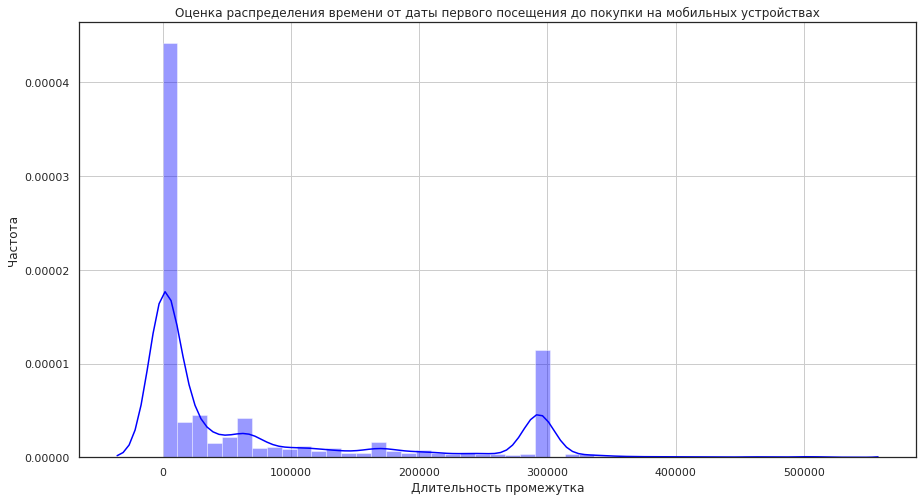

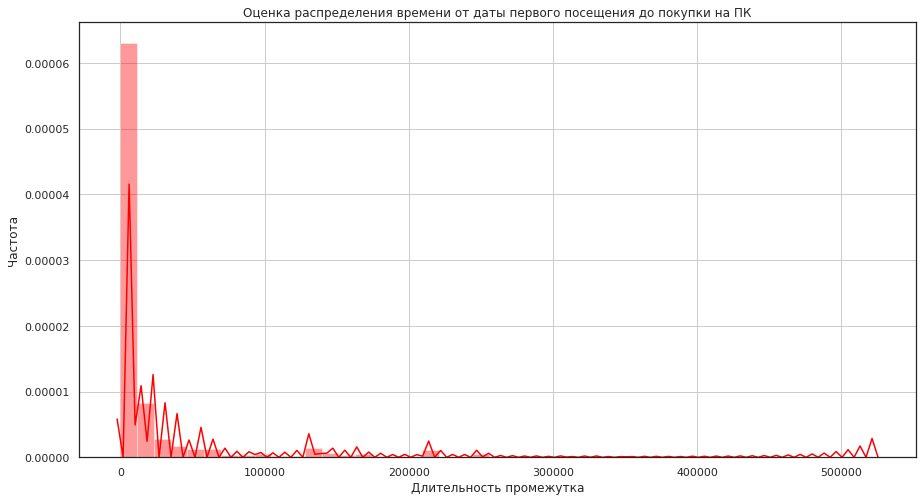

In [44]:
# Построение гистограммы распределения времени до первой покупки

# создание иллюстрации
fig = plt.figure(figsize=(15, 8))
# добавление одного графика на иллюстрацию
graph = fig.add_subplot()
# создание графика
sns.distplot(sales_touch['timedelta'], bins=45, color='blue', ax=graph)
# создание названий
plot_names(graph, 'Оценка распределения времени от даты первого посещения до покупки на мобильных устройствах', 'Длительность промежутка', 'Частота')

# создание иллюстрации
fig = plt.figure(figsize=(15, 8))
# добавление одного графика на иллюстрацию
graph = fig.add_subplot()
# создание графика
sns.distplot(sales_PC['timedelta'], bins=45, color='red', ax=graph)
# создание названий
plot_names(graph, 'Оценка распределения времени от даты первого посещения до покупки на ПК', 'Длительность промежутка', 'Частота')

Распределение отличается от нормального, как для пользователей ПК, так и для пользователей мобильных устройств. Распределение для пользователей мобильных устройств является бимодальным - с модами в районе 0 и 300000 мин, поэтому для оценки средней продолжительности промежутка между первым посещением и покупкой используем медиану. Распределение для пользователей ПК также является бимодальным с менее ярко выраженными модами в районе 0 и 6000 мин, поэтому для оценки средней продолжительности промежутка между первым посещением и покупкой используем медиану. 

In [45]:
# Определение  средней продолжительности промежутка между первым посещением и первой покупкой 
timedelta_touch = sales_touch['timedelta']
print('Моды для распределения для пользователей мобильных телефонов'+ '\n', timedelta_touch.mode())
timedelta_touch_median  = timedelta_touch.median() / 60
print('Средняя продолжительность промежутка между первым посещением и первой покупкой на мобильных устройствах {:.1f} ч'.format(timedelta_touch_median))

timedelta_PC = sales_PC['timedelta']
print('Моды для распределения для пользователей ПК'+ '\n', timedelta_PC.mode())
timedelta_PC_median  = timedelta_PC.median() / 60
print('Средняя продолжительность промежутка между первым посещением и первой покупкой на ПК {:.1f} ч'.format(timedelta_PC_median))

Моды для распределения для пользователей мобильных телефонов
 0    293340.0
dtype: float64
Средняя продолжительность промежутка между первым посещением и первой покупкой на мобильных устройствах 157.7 ч
Моды для распределения для пользователей ПК
 0    6231.0
dtype: float64
Средняя продолжительность промежутка между первым посещением и первой покупкой на ПК 47.8 ч


Группировка данных о длительности промежутка между первым просмотром и покупкой по месяцу сессии на мобильных устройствах


timedelta
session_month           
1                 4675.0
2                 2513.0
3                46672.0
4                 4751.0
5                 3640.0
6                29414.0
7                18779.0
8                56385.0
9                21502.0
10                5661.5
11                5375.5
12                9460.0



Группировка данных о длительности промежутка между первым просмотром и покупкой по месяцу сессии на ПК


timedelta
session_month           
1                 2869.0
2                 2869.0
3                 4097.0
4                   22.0
5                  141.0
6                 3041.0
7                 1642.0
8                 1642.0
9                 2869.0
10                2869.0
11                6231.0
12                4097.0

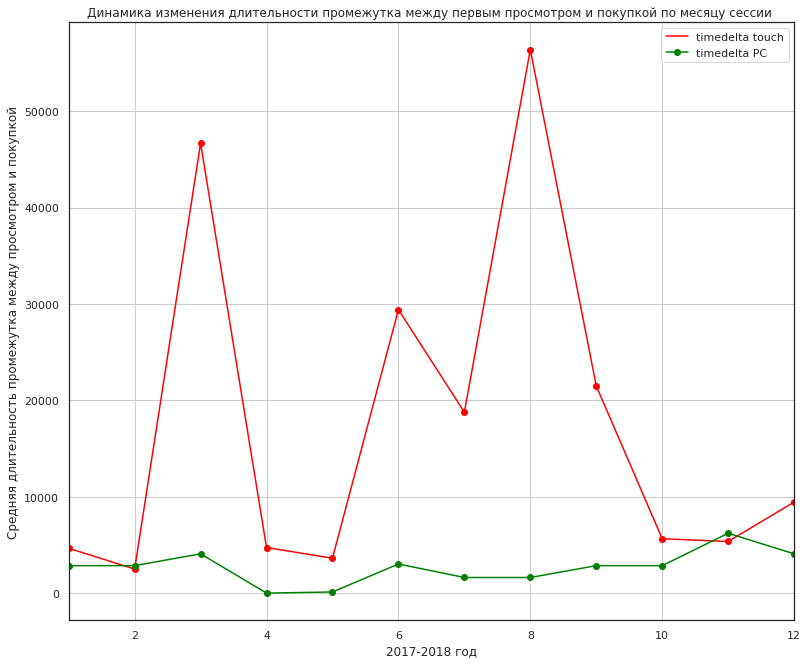

In [46]:
# Группировка данных по месяцу сессии
print('\033[1m' + 'Группировка данных о длительности промежутка между первым просмотром и покупкой по месяцу сессии на мобильных устройствах'+'\033[0m')
timeline_sales_touch = sales_touch.groupby(['session_month']).agg({'timedelta':'median'})
display(timeline_sales_touch)

print('\n')
print('\033[1m' + 'Группировка данных о длительности промежутка между первым просмотром и покупкой по месяцу сессии на ПК'+'\033[0m')
# Группировка данных по месяцу сессии
timeline_sales_PC = sales_PC.groupby(['session_month']).agg({'timedelta':'median'})
display(timeline_sales_PC)

# построение графика динамики изменения длительности между визитом и покупкой по месяцам

# создание иллюстрации
fig = plt.figure(figsize=(8, 10))
# добавление одного графика на иллюстрацию
graph = fig.add_subplot()
# создание графика
timeline_sales_touch.plot(y='timedelta', style='-o',figsize=(13, 11), grid=True, ax=graph, label='timedelta touch', color="red")
timeline_sales_PC.plot(y='timedelta', style='-o',figsize=(13, 11), grid=True, ax=graph, label='timedelta PC', color="green")
# создание названий
plot_names(graph, 'Динамика изменения длительности промежутка между первым просмотром и покупкой по месяцу сессии ', '2017-2018 год', 'Средняя длительность промежутка между просмотром и покупкой')

<a id='the_destination13'></a>
## 3.2. Оценка числа покупок в разные периоды времени

In [47]:
# Определение дат заказа для мобильных устройств
sales_touch['order_year']  = sales_touch['buy_ts'].dt.year
sales_touch['order_month'] = sales_touch['buy_ts'].dt.month
sales_touch['order_week']  = sales_touch['buy_ts'].dt.week
sales_touch['order_date'] =  sales_touch['buy_ts'].dt.date

# Определение дат заказа для ПК
sales_PC['order_year']  = sales_PC['buy_ts'].dt.year
sales_PC['order_month'] = sales_PC['buy_ts'].dt.month
sales_PC['order_week']  = sales_PC['buy_ts'].dt.week
sales_PC['order_date'] =  sales_PC['buy_ts'].dt.date

# Добавление столбцов с годом, месяцем и неделей, полной датой
orders_yearly_touch = sales_touch.groupby(['order_year']).agg({'uid': 'count'}).reset_index()
orders_yearly_touch.rename(columns={'uid': 'orders_yearly'}, inplace=True)
display(orders_yearly_touch)

orders_monthly_touch = sales_touch.groupby(['order_year', 'order_month']).agg({'uid': 'count'}).reset_index()
orders_monthly_touch.rename(columns={'uid': 'orders_monthly'}, inplace=True)
display(orders_monthly_touch)

orders_weekly_touch = sales_touch.groupby(['order_year', 'order_week']).agg({'uid': 'count'}).reset_index()
orders_weekly_touch.rename(columns={'uid': 'orders_weekly'}, inplace=True)

orders_daily_touch = sales_touch.groupby(['order_year','order_date']).agg({'uid': 'count'}).reset_index()
orders_daily_touch.rename(columns={'uid': 'orders_daily'}, inplace=True)

orders_touch = orders_yearly_touch.merge(orders_monthly_touch, on ='order_year')
orders_touch = orders_touch.merge(orders_weekly_touch, on ='order_year')
orders_touch = orders_touch.merge(orders_daily_touch, on ='order_year')

display(orders_touch.head())

order_year  orders_yearly
0        2017          11421
1        2018          16546

order_year  order_month  orders_monthly
0         2017            6             412
1         2017            7             716
2         2017            8             484
3         2017            9             978
4         2017           10            2357
5         2017           11            3242
6         2017           12            3232
7         2018            1            2484
8         2018            2            3077
9         2018            3            4413
10        2018            4            2719
11        2018            5            3853

order_year  orders_yearly  order_month  orders_monthly  order_week  \
0        2017          11421            6             412          22   
1        2017          11421            6             412          22   
2        2017          11421            6             412          22   
3        2017          11421            6             412          22   
4        2017          11421            6             412          22   

   orders_weekly  order_date  orders_daily  
0             56  2017-06-01            10  
1             56  2017-06-02            12  
2             56  2017-06-03            21  
3             56  2017-06-04            13  
4             56  2017-06-05            22

In [48]:
# Добавление столбцов с годом, месяцем и неделей, полной датой
orders_yearly_PC = sales_PC.groupby(['order_year']).agg({'uid': 'count'}).reset_index()
orders_yearly_PC.rename(columns={'uid': 'orders_yearly'}, inplace=True)
display(orders_yearly_PC)

orders_monthly_PC = sales_PC.groupby(['order_year', 'order_month']).agg({'uid': 'count'}).reset_index()
orders_monthly_PC.rename(columns={'uid': 'orders_monthly'}, inplace=True)
display(orders_monthly_PC)

orders_weekly_PC = sales_PC.groupby(['order_year', 'order_week']).agg({'uid': 'count'}).reset_index()
orders_weekly_PC.rename(columns={'uid': 'orders_weekly'}, inplace=True)

orders_daily_PC = sales_PC.groupby(['order_year','order_date']).agg({'uid': 'count'}).reset_index()
orders_daily_PC.rename(columns={'uid': 'orders_daily'}, inplace=True)

orders_PC = orders_yearly_PC.merge(orders_monthly_PC, on ='order_year')
orders_PC = orders_PC.merge(orders_weekly_PC, on ='order_year')
orders_PC = orders_PC.merge(orders_daily_PC, on ='order_year')

display(orders_PC.head())

order_year  orders_yearly
0        2017         128593
1        2018         233459

order_year  order_month  orders_monthly
0         2017            6            3076
1         2017            7            5002
2         2017            8            6647
3         2017            9           15051
4         2017           10           23785
5         2017           11           26741
6         2017           12           48291
7         2018            1           38920
8         2018            2           58033
9         2018            3           53303
10        2018            4           33978
11        2018            5           49224
12        2018            6               1

order_year  orders_yearly  order_month  orders_monthly  order_week  \
0        2017         128593            6            3076          22   
1        2017         128593            6            3076          22   
2        2017         128593            6            3076          22   
3        2017         128593            6            3076          22   
4        2017         128593            6            3076          22   

   orders_weekly  order_date  orders_daily  
0            327  2017-06-01            95  
1            327  2017-06-02           106  
2            327  2017-06-03            62  
3            327  2017-06-04            64  
4            327  2017-06-05           191

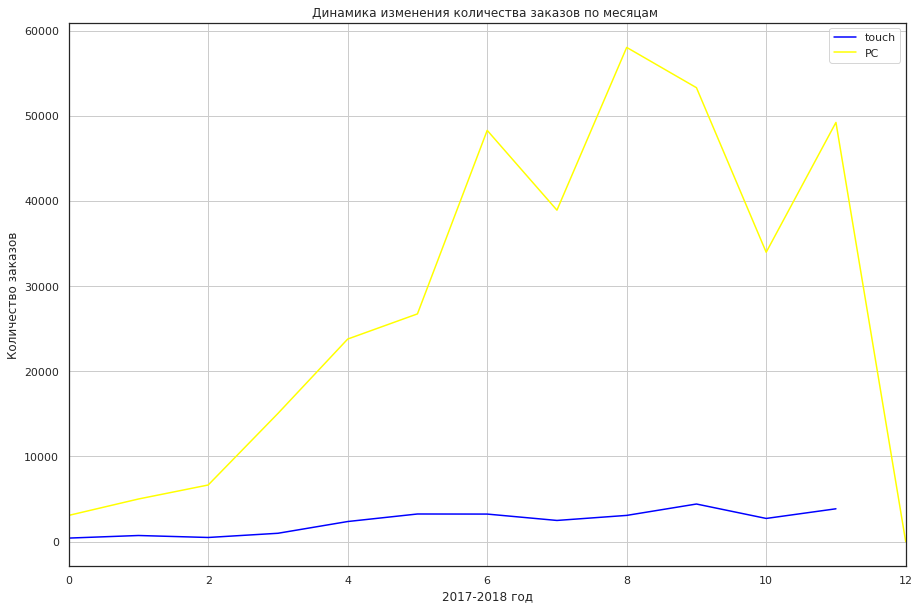

In [49]:
# создание иллюстрации с сравнением изменения во времени количества заказов в месяц 
fig = plt.figure(figsize=(15, 10))
# добавление одного графика на иллюстрацию
graph = fig.add_subplot()
# создание графика по месяцам
orders_monthly_touch.plot(y='orders_monthly', grid=True, ax=graph, color="blue", label='touch')
orders_monthly_PC.plot(y='orders_monthly', grid=True, ax=graph, color="yellow", label='PC')
# создание названий
plot_names(graph, 'Динамика изменения количества заказов по месяцам ', '2017-2018 год', 'Количество заказов')

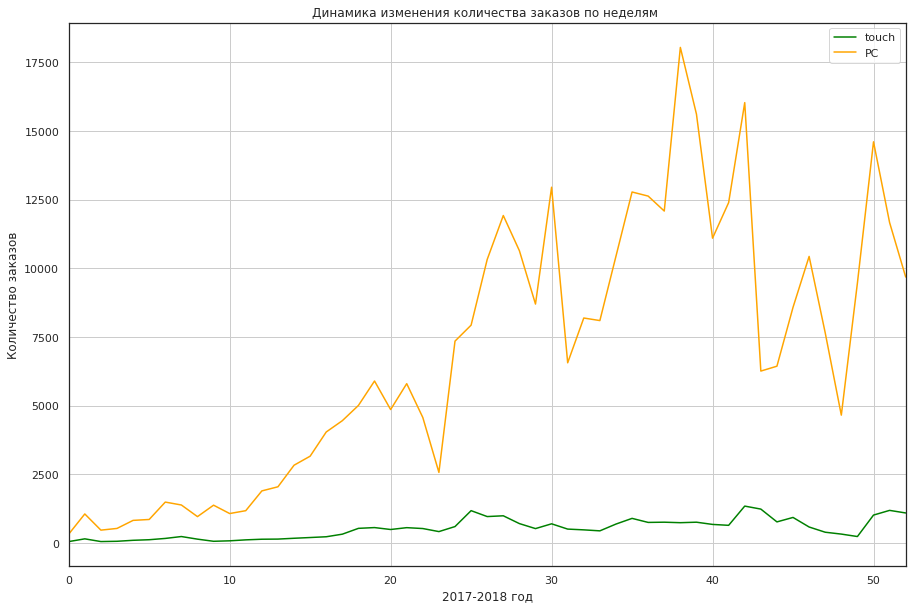

In [50]:
# создание иллюстрации с сравнением изменения во времени количества заказов в неделю
fig = plt.figure(figsize=(15, 10))
# добавление одного графика на иллюстрацию
graph = fig.add_subplot()
# создание графика по месяцам
orders_weekly_touch.plot(y='orders_weekly', grid=True, ax=graph, color="green", label='touch')
orders_weekly_PC.plot(y='orders_weekly', grid=True, ax=graph, color="orange", label='PC')
# создание названий
plot_names(graph, 'Динамика изменения количества заказов по неделям ', '2017-2018 год', 'Количество заказов')

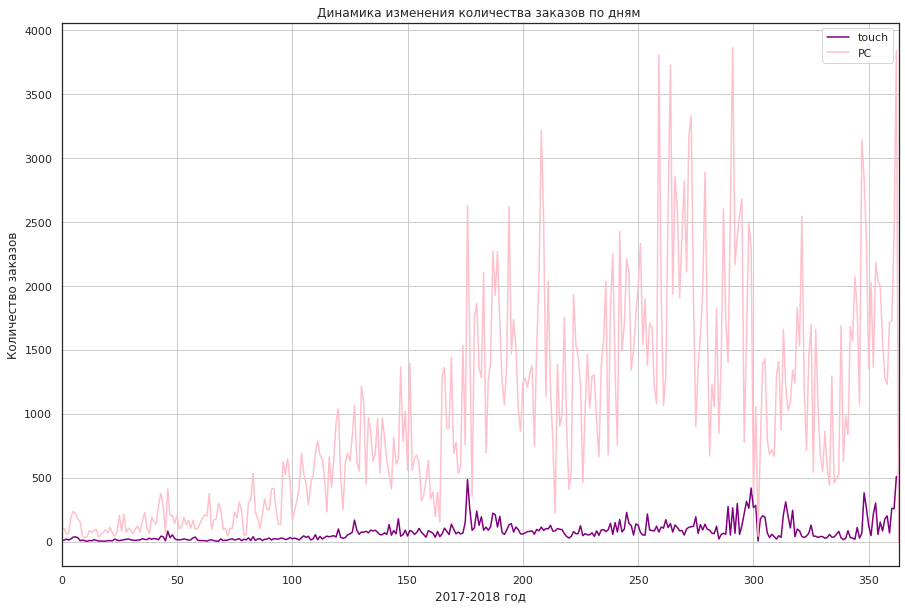

In [51]:
# создание иллюстрации с сравнением изменения во времени количества заказов в день
fig = plt.figure(figsize=(15, 10))
# добавление одного графика на иллюстрацию
graph = fig.add_subplot()
# создание графика по месяцам
orders_daily_touch.plot(y='orders_daily', grid=True, ax=graph, color="purple", label='touch')
orders_daily_PC.plot(y='orders_daily', grid=True, ax=graph, color="pink", label='PC')
# создание названий
plot_names(graph, 'Динамика изменения количества заказов по дням ', '2017-2018 год', 'Количество заказов')


In [52]:
sales_touch['first_buy_month'] = sales_touch['first_buy_date'].astype('datetime64[M]')
sales_touch['sale_month'] = sales_touch['buy_ts'].astype('datetime64[M]')


display(sales_touch.pivot_table(index='first_buy_month',
    columns='sale_month',
    values='uid',
    aggfunc='count')) 

sale_month       2017-06-01  2017-07-01  2017-08-01  2017-09-01  2017-10-01  \
first_buy_month                                                               
2017-06-01            412.0        19.0        13.0        26.0        55.0   
2017-07-01              NaN       697.0        43.0        64.0       120.0   
2017-08-01              NaN         NaN       428.0        24.0        99.0   
2017-09-01              NaN         NaN         NaN       864.0       609.0   
2017-10-01              NaN         NaN         NaN         NaN      1474.0   
2017-11-01              NaN         NaN         NaN         NaN         NaN   
2017-12-01              NaN         NaN         NaN         NaN         NaN   
2018-01-01              NaN         NaN         NaN         NaN         NaN   
2018-02-01              NaN         NaN         NaN         NaN         NaN   
2018-03-01              NaN         NaN         NaN         NaN         NaN   
2018-04-01              NaN         NaN         NaN         NaN         NaN   
2018-05-01              NaN         NaN         NaN         NaN         NaN   

sale_month       2017-11-01  2017-12-01  2018-01-01  2018-02-01  2018-03-01  \
first_buy_month                                                               
2017-06-01             16.0        26.0         9.0        17.0        48.0   
2017-07-01            271.0       125.0       121.0       251.0       325.0   
2017-08-01             46.0        79.0        77.0       157.0        74.0   
2017-09-01            726.0       339.0       194.0       134.0       199.0   
2017-10-01            259.0       157.0        86.0        69.0        87.0   
2017-11-01           1924.0       441.0       181.0       506.0       172.0   
2017-12-01              NaN      2065.0       274.0        67.0        60.0   
2018-01-01              NaN         NaN      1542.0       247.0        42.0   
2018-02-01              NaN         NaN         NaN      1629.0       187.0   
2018-03-01              NaN         NaN         NaN         NaN      3219.0   
2018-04-01              NaN         NaN         NaN         NaN         NaN   
2018-05-01              NaN         NaN         NaN         NaN         NaN   

sale_month       2018-04-01  2018-05-01  
first_buy_month                          
2017-06-01             10.0        35.0  
2017-07-01            483.0       746.0  
2017-08-01             73.0        58.0  
2017-09-01             88.0       107.0  
2017-10-01             59.0       163.0  
2017-11-01             45.0       118.0  
2017-12-01             81.0        56.0  
2018-01-01             21.0       108.0  
2018-02-01             58.0        36.0  
2018-03-01           1010.0      1161.0  
2018-04-01            791.0        86.0  
2018-05-01              NaN      1179.0

In [53]:
sales_PC['first_buy_month'] = sales_PC['first_buy_date'].astype('datetime64[M]')
sales_PC['sale_month'] = sales_PC['buy_ts'].astype('datetime64[M]')


display(sales_PC.pivot_table(index='first_buy_month',
    columns='sale_month',
    values='uid',
    aggfunc='count')) 

sale_month       2017-06-01  2017-07-01  2017-08-01  2017-09-01  2017-10-01  \
first_buy_month                                                               
2017-06-01           3076.0      2296.0      4010.0      8533.0     13911.0   
2017-07-01              NaN      2706.0       680.0      1778.0      1490.0   
2017-08-01              NaN         NaN      1957.0       851.0      1504.0   
2017-09-01              NaN         NaN         NaN      3889.0       867.0   
2017-10-01              NaN         NaN         NaN         NaN      6013.0   
2017-11-01              NaN         NaN         NaN         NaN         NaN   
2017-12-01              NaN         NaN         NaN         NaN         NaN   
2018-01-01              NaN         NaN         NaN         NaN         NaN   
2018-02-01              NaN         NaN         NaN         NaN         NaN   
2018-03-01              NaN         NaN         NaN         NaN         NaN   
2018-04-01              NaN         NaN         NaN         NaN         NaN   
2018-05-01              NaN         NaN         NaN         NaN         NaN   
2018-06-01              NaN         NaN         NaN         NaN         NaN   

sale_month       2017-11-01  2017-12-01  2018-01-01  2018-02-01  2018-03-01  \
first_buy_month                                                               
2017-06-01          13973.0     26147.0     20648.0     31500.0     23936.0   
2017-07-01            877.0      3647.0      2811.0      1108.0      1124.0   
2017-08-01           1751.0      3549.0      2381.0      2139.0      3947.0   
2017-09-01           1218.0      3326.0      1526.0      2796.0      3135.0   
2017-10-01           1082.0       737.0       728.0      1055.0      1087.0   
2017-11-01           7840.0      3402.0      2467.0      6152.0      4043.0   
2017-12-01              NaN      7483.0      3077.0      4841.0      4362.0   
2018-01-01              NaN         NaN      5282.0      2804.0      3143.0   
2018-02-01              NaN         NaN         NaN      5638.0      2520.0   
2018-03-01              NaN         NaN         NaN         NaN      6006.0   
2018-04-01              NaN         NaN         NaN         NaN         NaN   
2018-05-01              NaN         NaN         NaN         NaN         NaN   
2018-06-01              NaN         NaN         NaN         NaN         NaN   

sale_month       2018-04-01  2018-05-01  2018-06-01  
first_buy_month                                      
2017-06-01          14636.0      8815.0         NaN  
2017-07-01            782.0      3358.0         NaN  
2017-08-01           2691.0      1796.0         NaN  
2017-09-01           1866.0      1822.0         NaN  
2017-10-01           1476.0      2308.0         NaN  
2017-11-01           1023.0      3386.0         NaN  
2017-12-01           2116.0      2698.0         NaN  
2018-01-01           1602.0      2627.0         NaN  
2018-02-01           1412.0      1825.0         NaN  
2018-03-01           2782.0     12197.0         NaN  
2018-04-01           3592.0      3346.0         NaN  
2018-05-01              NaN      5046.0         NaN  
2018-06-01              NaN         NaN         1.0

<font color='purple'> 
## Расчет количества покупок

In [54]:
# Расчет среднего количества покупок, которое приходится на одного покупателя за весь период анализа
orders_by_uid_touch = sales_touch.groupby(['uid']).agg({'buy_ts': 'count'}).reset_index()
orders_by_uid_touch.rename(columns={'buy_ts': 'orders_by_uid'}, inplace=True)
display(orders_by_uid_touch.head())
orders_touch_mean = int(orders_by_uid_touch['orders_by_uid'].mean())
print('Cреднее количество заказов одним пользователем на мобильном устройстве за весь период анализа', orders_touch_mean)

orders_by_uid_PC = sales_PC.groupby(['uid']).agg({'buy_ts': 'count'}).reset_index()
orders_by_uid_PC.rename(columns={'buy_ts': 'orders_by_uid'}, inplace=True)
display(orders_by_uid_PC.head())
orders_PC_mean = int(orders_by_uid_PC['orders_by_uid'].mean())
print('Cреднее количество заказов одним пользователем на компьютере за весь период анализа', orders_PC_mean)

uid  orders_by_uid
0   1575281904278712              2
1   3077748354309989              1
2  12695041396440380              5
3  15930622431697628              3
4  16118742129536584              8

Cреднее количество заказов одним пользователем на мобильном устройстве за весь период анализа 3


uid  orders_by_uid
0   313578113262317              1
1  2429014661409475              1
2  2464366381792757              2
3  2551852515556206              2
4  3605148382144603              7

Cреднее количество заказов одним пользователем на компьютере за весь период анализа 12


Среднее количество заказов пользователем на мобильном устройстве за весь период анализа составляет 3, а на ПК - 12, то есть количество заказов на ПК в среднем значительно выше, чем на мобильных устройствах.

<a id='the_destination14'></a>
## 3.3 Определение среднего чека

In [55]:
#средний чек — сумма покупок, делённая на число покупателей

# Сформируем таблицу по когортам покупателей на мобильных устройствах, их суммарным затратам на покупку в когорте и количеству покупателей в когорте
orders_grouped_by_cohorts_touch = sales_touch.groupby(['first_buy_month','sale_month']).agg({'revenue':'sum','uid':'nunique'})
orders_grouped_by_cohorts_touch.rename(columns={'revenue': 'cohort_revenue', 'uid': 'number_of_buyers'}, inplace=True)
print('Таблица по когортам покупателей на мобильных устройствах, их суммарным затратам на покупку в когорте и количеству покупателей в когорте')
display(orders_grouped_by_cohorts_touch.head()) 

# Сформируем таблицу по когортам покупателей на ПК, их суммарным затратам на покупку в когорте и количеству покупателей в когорте
orders_grouped_by_cohorts_PC = sales_PC.groupby(['first_buy_month','sale_month']).agg({'revenue':'sum','uid':'nunique'})
orders_grouped_by_cohorts_PC.rename(columns={'revenue': 'cohort_revenue', 'uid': 'number_of_buyers'}, inplace=True)
print('Таблица по когортам покупателей на ПК, их суммарным затратам на покупку в когорте и количеству покупателей в когорте')
display(orders_grouped_by_cohorts_PC.head()) 

Таблица по когортам покупателей на мобильных устройствах, их суммарным затратам на покупку в когорте и количеству покупателей в когорте


cohort_revenue  number_of_buyers
first_buy_month sale_month                                  
2017-06-01      2017-06-01         1466.33               303
                2017-07-01          114.99                10
                2017-08-01           99.30                 5
                2017-09-01          130.06                 3
                2017-10-01          459.01                 8

Таблица по когортам покупателей на ПК, их суммарным затратам на покупку в когорте и количеству покупателей в когорте


cohort_revenue  number_of_buyers
first_buy_month sale_month                                  
2017-06-01      2017-06-01        18024.36              1618
                2017-07-01        12810.06                51
                2017-08-01        20986.46                43
                2017-09-01        82460.58                49
                2017-10-01       113263.17                78

In [56]:
# Определение среднего чека покупателя revenue_per_user — разделим показатель cohort_revenue на number_of_buyers
orders_grouped_by_cohorts_touch['revenue_per_user'] = orders_grouped_by_cohorts_touch['cohort_revenue'] / orders_grouped_by_cohorts_touch['number_of_buyers']
print('Таблица по когортам покупателей на мобильных устройствах, их суммарным затратам на покупку в когорте и количеству покупателей в когорте')
display(orders_grouped_by_cohorts_touch.tail()) 

orders_grouped_by_cohorts_PC['revenue_per_user'] = orders_grouped_by_cohorts_PC['cohort_revenue'] / orders_grouped_by_cohorts_PC['number_of_buyers']
print('Таблица по когортам покупателей на ПК, их суммарным затратам на покупку в когорте и количеству покупателей в когорте')
display(orders_grouped_by_cohorts_PC.tail()) 

Таблица по когортам покупателей на мобильных устройствах, их суммарным затратам на покупку в когорте и количеству покупателей в когорте


cohort_revenue  number_of_buyers  revenue_per_user
first_buy_month sale_month                                                    
2018-03-01      2018-04-01        45949.10                17       2702.888235
                2018-05-01         7714.14                19        406.007368
2018-04-01      2018-04-01         3380.69               479          7.057808
                2018-05-01          386.96                14         27.640000
2018-05-01      2018-05-01         4785.55               688          6.955741

Таблица по когортам покупателей на ПК, их суммарным затратам на покупку в когорте и количеству покупателей в когорте


cohort_revenue  number_of_buyers  revenue_per_user
first_buy_month sale_month                                                    
2018-03-01      2018-05-01        56061.86                50       1121.237200
2018-04-01      2018-04-01        19601.59              1834         10.687890
                2018-05-01        34238.09                59        580.306610
2018-05-01      2018-05-01        24583.94              2328         10.560112
2018-06-01      2018-06-01            3.42                 1          3.420000

In [57]:
# Формирование сводной таблицы изменения среднего чека в когортах по месяцу совершения покупки
# Формирование сводной таблицы для мобильных устройств
average_check_touch = orders_grouped_by_cohorts_touch.pivot_table(index='first_buy_month',columns='sale_month',values='revenue_per_user',aggfunc='mean')

# Формирование сводной таблицы для ПК
average_check_PC = orders_grouped_by_cohorts_PC.pivot_table(index='first_buy_month',columns='sale_month',values='revenue_per_user',aggfunc='mean')

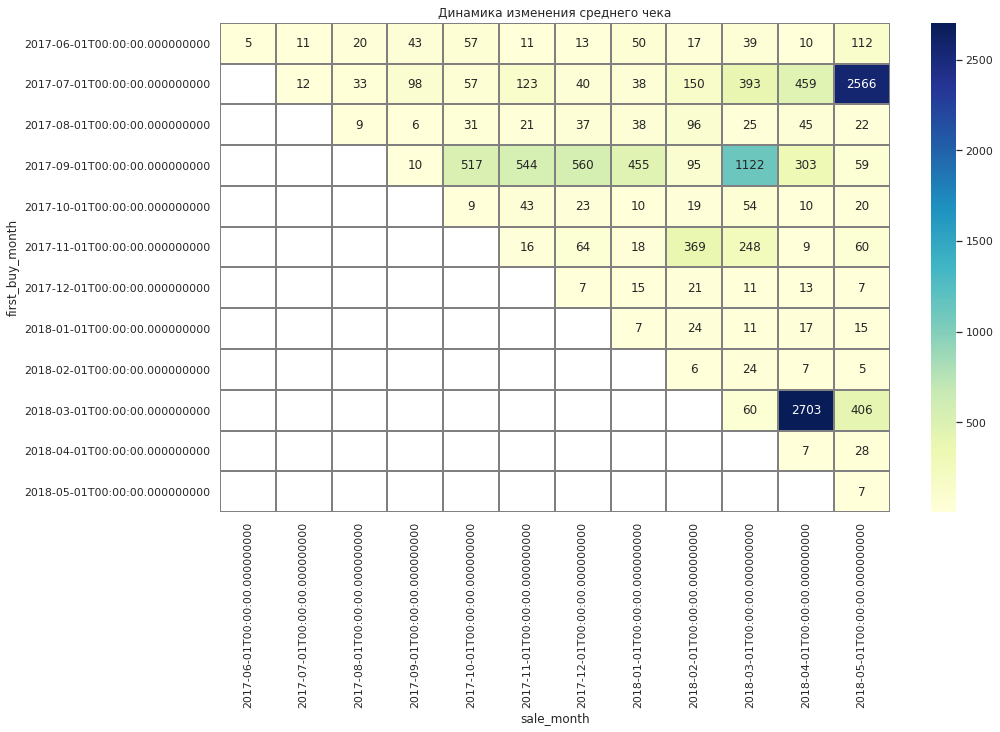

In [58]:
# Построение тепловой карты изменения среднего чека для мобильных устройств
sns.set(style='white')
plt.figure(figsize=(15, 9))
plt.title('Динамика изменения среднего чека')
sns.heatmap(average_check_touch, annot=True, fmt='.0f', linewidths=1, linecolor='gray', cmap='YlGnBu')

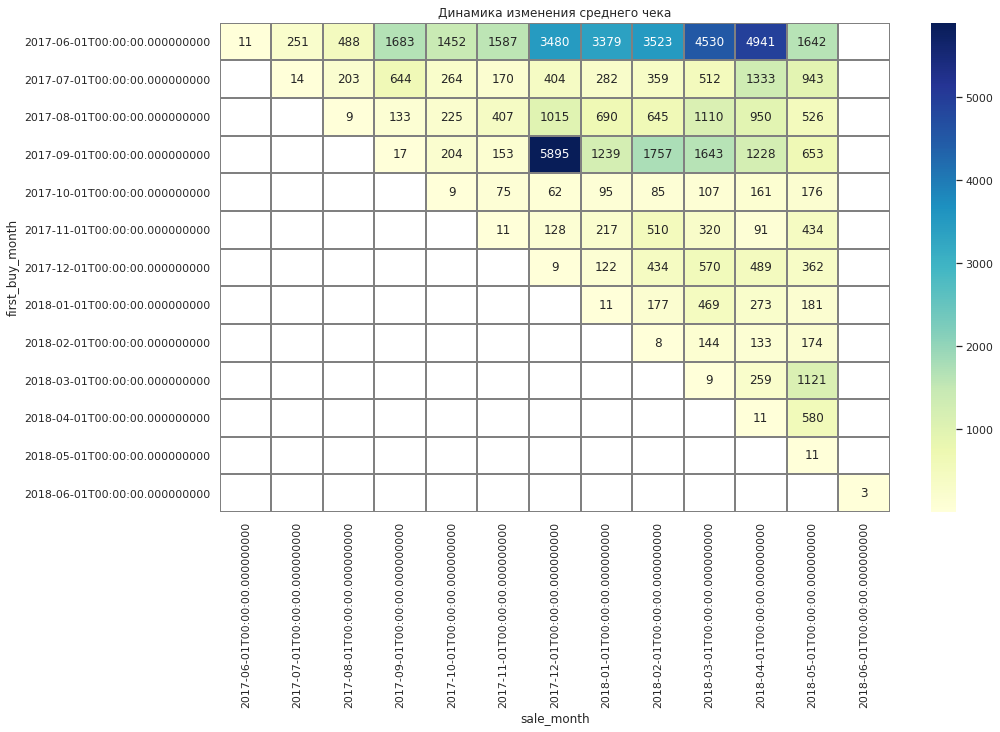

In [59]:
# Построение тепловой карты изменения среднего чека для мобильных устройств
sns.set(style='white')
plt.figure(figsize=(15, 9))
plt.title('Динамика изменения среднего чека')
sns.heatmap(average_check_PC, annot=True, fmt='.0f', linewidths=1, linecolor='gray', cmap='YlGnBu')

In [60]:
#средний чек — сумма покупок, делённая на число покупателей

# Сформируем таблицу c количеством покупателей на мобильных устройствах, месяцем покупки, их суммарным затратам на покупку
orders_grouped_touch = sales_touch.groupby(['sale_month']).agg({'revenue':'sum','uid':'nunique'})
orders_grouped_touch.rename(columns={'revenue': 'cohort_revenue', 'uid': 'number_of_buyers'}, inplace=True)
orders_grouped_touch['revenue_per_user'] = orders_grouped_touch['cohort_revenue'] / orders_grouped_touch['number_of_buyers']
print('Таблица количества покупателей на мобильных устройствах, их суммарных затратам на покупку и месяцем покупки')
display(orders_grouped_touch) 

# Сформируем таблицу количеству покупателей на ПК, их суммарным затратам на покупку
orders_grouped_PC = sales_PC.groupby(['sale_month']).agg({'revenue':'sum','uid':'nunique'})
orders_grouped_PC.rename(columns={'revenue': 'cohort_revenue', 'uid': 'number_of_buyers'}, inplace=True)
orders_grouped_PC['revenue_per_user'] = orders_grouped_PC['cohort_revenue'] / orders_grouped_PC['number_of_buyers']
print('Таблица количества покупателей на ПК, их суммарных затратам на покупку и месяцем покупки')
display(orders_grouped_PC) 

Таблица количества покупателей на мобильных устройствах, их суммарных затратам на покупку и месяцем покупки


cohort_revenue  number_of_buyers  revenue_per_user
sale_month                                                    
2017-06-01         1466.33               303          4.839373
2017-07-01         4796.40               395         12.142785
2017-08-01         2830.29               272         10.405478
2017-09-01         6525.88               555         11.758342
2017-10-01        23400.30               880         26.591250
2017-11-01        31212.10               944         33.063665
2017-12-01        18661.19              1077         17.327010
2018-01-01        13107.04               872         15.031009
2018-02-01        21400.38              1044         20.498448
2018-03-01        72168.59               951         75.887056
2018-04-01        56772.90               581         97.715835
2018-05-01        33554.19               820         40.919744

Таблица количества покупателей на ПК, их суммарных затратам на покупку и месяцем покупки


cohort_revenue  number_of_buyers  revenue_per_user
sale_month                                                    
2017-06-01        18024.36              1618         11.139901
2017-07-01        33574.17              1517         22.131951
2017-08-01        39420.89              1175         33.549694
2017-09-01       154316.58              2153         71.675142
2017-10-01       194586.42              3761         51.737947
2017-11-01       180649.76              3718         48.587886
2017-12-01       680395.86              3976        171.125719
2018-01-01       308381.71              3091         99.767619
2018-02-01       443078.32              3319        133.497535
2018-03-01       489852.99              3337        146.794423
2018-04-01       373895.63              2246        166.471785
2018-05-01       321830.39              2813        114.408244
2018-06-01            3.42                 1          3.420000

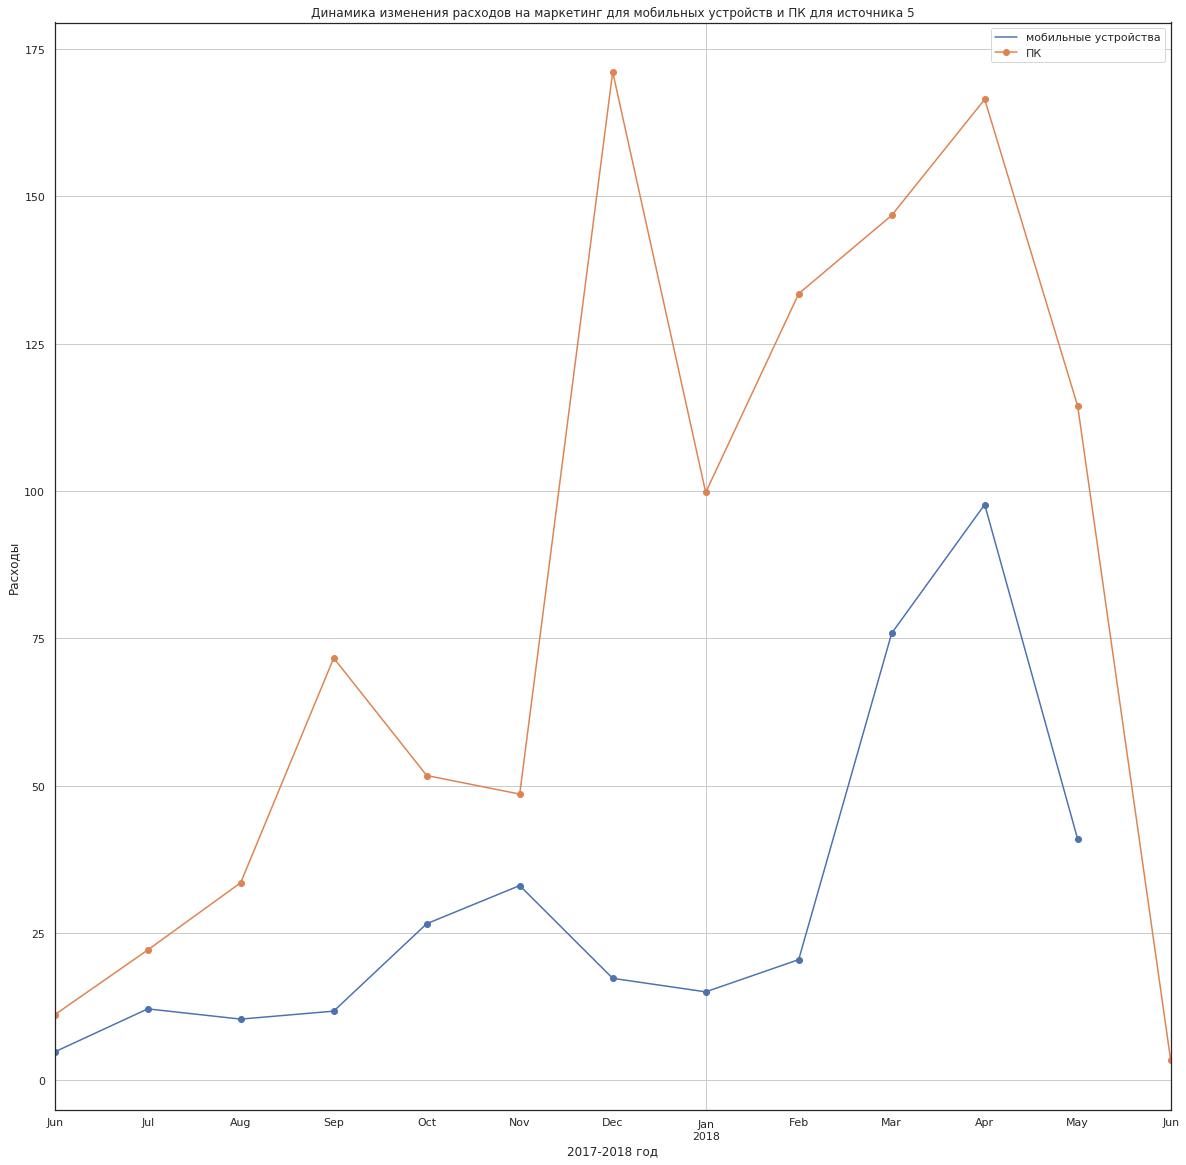

In [61]:
# Построим графики для сравнения среднего чека на мобильных устройствах и ПК
# создание иллюстрации
fig = plt.figure(figsize=(20, 20))
# добавление графика на иллюстрацию
graph = fig.add_subplot()
# создание графика
orders_grouped_touch.plot(y='revenue_per_user', style='-o', grid=True, ax=graph, label='мобильные устройства')
orders_grouped_PC.plot(y='revenue_per_user', style='-o', grid=True, ax=graph, label='ПК')
# создание названий
plot_names(graph, 'Динамика изменения расходов на маркетинг для мобильных устройств и ПК для источника 5', '2017-2018 год', 'Расходы')

Средний чек для мобильных устройств и ПК изменяется сезонно, однако динамика для изменения среднего чека по месяцам для мобильных устройств и ПК несколько отличается, наибольший средний чек для ПК приходится на декабрь и апрель, а для мобильных устройств - на ноябрь и апрель. В среднем значения среднего чека для ПК выше, чем для мобильных устройств

<a id='the_destination15'></a>
## 3.3 Определение LTV

Для расчета LTV необходимо учитывать маржинальность приложения. Так как в исходном задании маржинальность не задана, то можно предположить, что маржинальность Яндекс.Афиши составляет 1, то есть предполагаем что затраты на производство пренебрежимо малы.

In [62]:
#Определение LTV без разделения на устройства и источники
orders = orders.sort_values(by='uid')
display(orders.head(2))
print(orders.shape[0])

# Определение месяца покупки
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')

# Формирование месячных когорт с учетом источника, с которого заходили первый раз
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
display(first_orders.head())

# Определение количества новых покупателей
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'new_buyers']
display(cohort_sizes)


# Добавление в таблицу столбца с первой датой заказа
orders_merged = orders.merge(first_orders, on='uid')

# Группировка таблицы заказов по месяцу первой покупки и месяцу каждого заказа и определение выручки
cohorts_revenue = orders_merged.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
display(cohorts_revenue.head())
display(cohorts_revenue['revenue'].max())

# Добавление данных о новых покупателях
cohorts_ltv = pd.merge(cohort_sizes, cohorts_revenue, on=['first_order_month'])
print('Данные по когортам с учетом расходов и количества новых клиентов')
display(cohorts_ltv.head())
display(cohorts_ltv.shape[0])


# Расчет возраста когорты
cohorts_ltv['age'] = (cohorts_ltv['order_month'] - cohorts_ltv['first_order_month'])/ np.timedelta64(1, 'M')
cohorts_ltv['age'] = cohorts_ltv['age'].round().astype('int')
print('Данные по когортам с учетом возраста когорты')
display(cohorts_ltv)
# Рассчитаем итоговую сумму денег, которую один клиент приносит в среднем со всех своих покупок, LTV
cohorts_ltv['ltv'] = cohorts_ltv['revenue'] /cohorts_ltv['new_buyers']
display(cohorts_ltv.head())

buy_ts  revenue               uid
27944 2018-01-03 21:51:00     0.55   313578113262317
213   2017-06-03 10:13:00     1.22  1575281904278712

50415


uid first_order_month
0   313578113262317        2018-01-01
1  1575281904278712        2017-06-01
2  2429014661409475        2017-10-01
3  2464366381792757        2018-01-01
4  2551852515556206        2017-11-01

first_order_month  new_buyers
0         2017-06-01        2023
1         2017-07-01        1923
2         2017-08-01        1370
3         2017-09-01        2581
4         2017-10-01        4340
5         2017-11-01        4081
6         2017-12-01        4383
7         2018-01-01        3373
8         2018-02-01        3651
9         2018-03-01        3533
10        2018-04-01        2276
11        2018-05-01        2988
12        2018-06-01           1

first_order_month order_month  revenue
0        2017-06-01  2017-06-01  9557.49
1        2017-06-01  2017-07-01   981.82
2        2017-06-01  2017-08-01   885.34
3        2017-06-01  2017-09-01  1931.30
4        2017-06-01  2017-10-01  2068.58

21716.1999999998

Данные по когортам с учетом расходов и количества новых клиентов


first_order_month  new_buyers order_month  revenue
0        2017-06-01        2023  2017-06-01  9557.49
1        2017-06-01        2023  2017-07-01   981.82
2        2017-06-01        2023  2017-08-01   885.34
3        2017-06-01        2023  2017-09-01  1931.30
4        2017-06-01        2023  2017-10-01  2068.58

79

Данные по когортам с учетом возраста когорты


first_order_month  new_buyers order_month   revenue  age
0         2017-06-01        2023  2017-06-01   9557.49    0
1         2017-06-01        2023  2017-07-01    981.82    1
2         2017-06-01        2023  2017-08-01    885.34    2
3         2017-06-01        2023  2017-09-01   1931.30    3
4         2017-06-01        2023  2017-10-01   2068.58    4
..               ...         ...         ...       ...  ...
74        2018-03-01        3533  2018-05-01   1114.87    2
75        2018-04-01        2276  2018-04-01  10600.69    0
76        2018-04-01        2276  2018-05-01   1209.92    1
77        2018-05-01        2988  2018-05-01  13925.76    0
78        2018-06-01           1  2018-06-01      3.42    0

[79 rows x 5 columns]

first_order_month  new_buyers order_month  revenue  age       ltv
0        2017-06-01        2023  2017-06-01  9557.49    0  4.724414
1        2017-06-01        2023  2017-07-01   981.82    1  0.485329
2        2017-06-01        2023  2017-08-01   885.34    2  0.437637
3        2017-06-01        2023  2017-09-01  1931.30    3  0.954671
4        2017-06-01        2023  2017-10-01  2068.58    4  1.022531

Данные по динамике изменения LTV по длительности жизни когорты


age                      0         1         2         3         4         5   \
first_order_month                                                               
2017-06-01         4.724414  0.485329  0.437637  0.954671  1.022531  0.735502   
2017-07-01         6.010218  0.335211  0.623531  0.358976  0.176791  0.156048   
2017-08-01         5.276518  0.471993  0.458482  0.391277  0.494051  0.283540   
2017-09-01         5.644529  1.117586  0.520930  3.975792  0.400558  0.647067   
2017-10-01         5.003733  0.535763  0.191394  0.157145  0.151560  0.120362   
2017-11-01         5.154683  0.399233  0.199556  0.324952  0.148013  0.053879   
2017-12-01         4.738191  0.260374  0.925097  1.065275  0.312930  0.338047   
2018-01-01         4.135636  0.294758  0.304281  0.142778  0.062698       NaN   
2018-02-01         4.156987  0.278274  0.078515  0.074144       NaN       NaN   
2018-03-01         4.838803  0.300892  0.315559       NaN       NaN       NaN   
2018-04-01         4.657597  0.531599       NaN       NaN       NaN       NaN   
2018-05-01         4.660562       NaN       NaN       NaN       NaN       NaN   
2018-06-01         3.420000       NaN       NaN       NaN       NaN       NaN   

age                      6         7         8         9         10        11  
first_order_month                                                              
2017-06-01         0.950440  0.581592  0.553213  0.605788  0.571261  0.256856  
2017-07-01         0.120208  0.141820  0.161232  0.147145  0.155673       NaN  
2017-08-01         0.210664  0.405007  0.292212  0.187978       NaN       NaN  
2017-09-01         0.701608  0.243150  0.184006       NaN       NaN       NaN  
2017-10-01         0.084816  0.115470       NaN       NaN       NaN       NaN  
2017-11-01         0.114928       NaN       NaN       NaN       NaN       NaN  
2017-12-01              NaN       NaN       NaN       NaN       NaN       NaN  
2018-01-01              NaN       NaN       NaN       NaN       NaN       NaN  
2018-02-01              NaN       NaN       NaN       NaN       NaN       NaN  
2018-03-01              NaN       NaN       NaN       NaN       NaN       NaN  
2018-04-01              NaN       NaN       NaN       NaN       NaN       NaN  
2018-05-01              NaN       NaN       NaN       NaN       NaN       NaN  
2018-06-01              NaN       NaN       NaN       NaN       NaN       NaN


Данные по динамике изменения накопительного LTV по месяцам для разных когорт


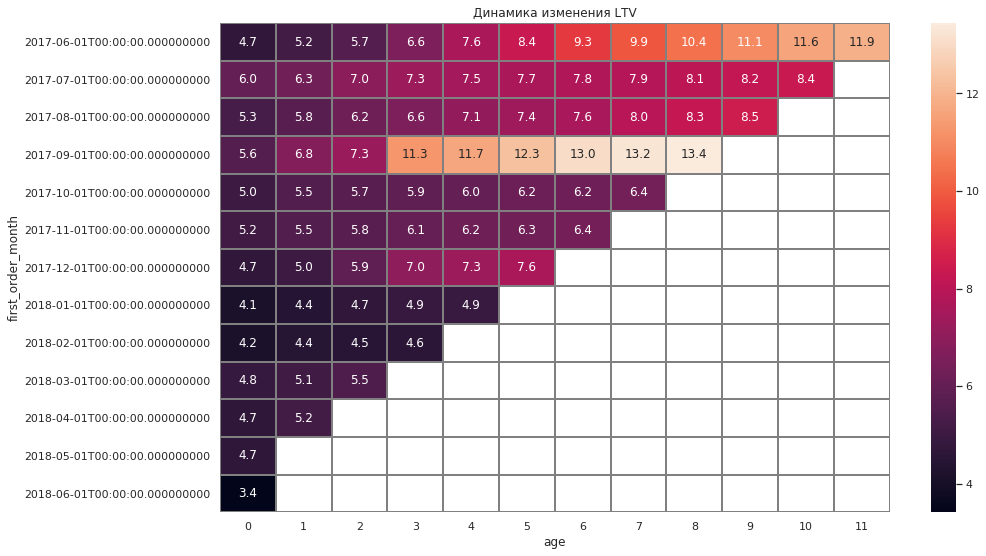

In [63]:
output = cohorts_ltv.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='ltv', 
        aggfunc='mean')
print('Данные по динамике изменения LTV по длительности жизни когорты')
display(output)
output = output.cumsum(axis=1).round(2)     
output.fillna('') 
print('\n'+'Данные по динамике изменения накопительного LTV по месяцам для разных когорт')
# Построение тепловой карты изменения LTV
sns.set(style='white')
plt.figure(figsize=(15, 9))
plt.title('Динамика изменения LTV')
sns.heatmap(output, annot=True, fmt='.1f', linewidths=1, linecolor='gray')

In [64]:
# Подготовка таблиц к объединению
display(orders.head(2))
visits  = visits.sort_values(by='uid')
display(visits.head(1))
print('Размер таблицы orders', orders.shape[0])
print('Размер таблицы visits', visits.shape[0])
print('Количество уникальных значений uid в таблице orders', len(orders['uid'].unique()))
print('Количество уникальных значений uid в таблице visits', len(visits['uid'].unique()))

#Таблицы содержат разное количество пользователей, для объединения необходимо обратиться к профилю пользователя
visits['visit_day'] = visits['start_ts'].astype('datetime64[D]')
visits_profile = visits.sort_values(by = ['uid', 'start_ts']).groupby('uid').agg({'visit_day' : 'first', 'source_id': 'first', 'device': 'first'}).reset_index()
visits_profile.columns = ['uid', 'first_visit', 'first_visit_source' , 'first_visit_device']
display(visits_profile.head())

orders_profile = orders.sort_values(by = ['uid']).groupby('uid').agg({'order_month' : 'min', 'revenue': 'sum'}).reset_index()
orders_profile.columns = ['uid', 'first_order_month', 'user_revenue']
display(orders_profile.head())

user_profile = visits_profile.merge(orders_profile, on='uid')
display(user_profile.head())

buy_ts  revenue               uid order_month
27944 2018-01-03 21:51:00     0.55   313578113262317  2018-01-01
213   2017-06-03 10:13:00     1.22  1575281904278712  2017-06-01

device              end_ts  source_id            start_ts  \
196543  touch 2018-03-01 17:33:00          3 2018-03-01 17:27:00   

                   uid  session_year  session_month  session_week session_date  
196543  11863502262781          2018              3             9   2018-03-01

Размер таблицы orders 50415
Размер таблицы visits 359400
Количество уникальных значений uid в таблице orders 36523
Количество уникальных значений uid в таблице visits 228169


uid first_visit  first_visit_source first_visit_device
0   11863502262781  2018-03-01                   3              touch
1   49537067089222  2018-02-06                   2              touch
2  297729379853735  2017-06-07                   3            desktop
3  313578113262317  2017-09-18                   2            desktop
4  325320750514679  2017-09-30                   5            desktop

uid first_order_month  user_revenue
0   313578113262317        2018-01-01          0.55
1  1575281904278712        2017-06-01          3.05
2  2429014661409475        2017-10-01         73.33
3  2464366381792757        2018-01-01          2.44
4  2551852515556206        2017-11-01         10.99

uid first_visit  first_visit_source first_visit_device  \
0   313578113262317  2017-09-18                   2            desktop   
1  1575281904278712  2017-06-03                  10              touch   
2  2429014661409475  2017-10-11                   3            desktop   
3  2464366381792757  2018-01-27                   5            desktop   
4  2551852515556206  2017-11-24                   5            desktop   

  first_order_month  user_revenue  
0        2018-01-01          0.55  
1        2017-06-01          3.05  
2        2017-10-01         73.33  
3        2018-01-01          2.44  
4        2017-11-01         10.99

In [65]:
# Определение количества новых покупателей
cohort_sizes = user_profile.groupby(['first_visit_source' , 'first_visit_device', 'first_order_month']).agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_visit_source' , 'first_visit_device','first_order_month', 'new_buyers']
print('Количество новых покупателей')
display(cohort_sizes)
display(cohort_sizes.shape[0])

# Таблица заказов с датой первого заказа
display(orders_merged)
orders_joined = orders_merged.merge(user_profile[['uid', 'first_visit', 'first_visit_source', 'first_visit_device']], on='uid')
print('Данные о заказах')
display(orders_joined.head())

# Группировка таблицы заказов по месяцу первой покупки и месяцу каждого заказа и определение выручки
cohorts_revenue = orders_joined.groupby(['first_visit_source' , 'first_visit_device', 'first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
print('Таблица заказов по месяцу первой покупки и месяцу каждого заказа и определение выручки')
display(cohorts_revenue.head())
display(cohorts_revenue['revenue'].max())

# Добавление данных о новых покупателях
cohorts_ltv_specified = pd.merge(cohort_sizes, cohorts_revenue, on=['first_visit_source' , 'first_visit_device', 'first_order_month'])
print('Данные по когортам с учетом расходов и количества новых клиентов')
display(cohorts_ltv.head())


# Расчет возраста когорты
cohorts_ltv_specified['age'] = (cohorts_ltv_specified['order_month'] - cohorts_ltv_specified['first_order_month'])/ np.timedelta64(1, 'M')
cohorts_ltv_specified['age'] = cohorts_ltv_specified['age'].round().astype('int')
print('Данные по когортам с учетом возраста когорты')
# Рассчитаем итоговую сумму денег, которую один клиент приносит в среднем со всех своих покупок, LTV
cohorts_ltv_specified['ltv'] = cohorts_ltv_specified['revenue'] /cohorts_ltv_specified['new_buyers']
display(cohorts_ltv.head())

Количество новых покупателей


first_visit_source first_visit_device first_order_month  new_buyers
0                     1            desktop        2017-06-01         163
1                     1            desktop        2017-07-01         138
2                     1            desktop        2017-08-01          94
3                     1            desktop        2017-09-01         181
4                     1            desktop        2017-10-01         272
..                  ...                ...               ...         ...
165                  10              touch        2018-01-01          19
166                  10              touch        2018-02-01          21
167                  10              touch        2018-03-01          48
168                  10              touch        2018-04-01          27
169                  10              touch        2018-05-01          35

[170 rows x 4 columns]

170

buy_ts  revenue                   uid order_month  \
0     2018-01-03 21:51:00     0.55       313578113262317  2018-01-01   
1     2017-06-03 10:13:00     1.22      1575281904278712  2017-06-01   
2     2017-06-03 17:39:00     1.83      1575281904278712  2017-06-01   
3     2017-10-11 18:33:00    73.33      2429014661409475  2017-10-01   
4     2018-01-28 15:54:00     2.44      2464366381792757  2018-01-01   
...                   ...      ...                   ...         ...   
50410 2017-09-25 15:56:00     0.12  18445407535914413204  2017-09-01   
50411 2017-09-22 23:55:00     0.52  18445407535914413204  2017-09-01   
50412 2018-03-26 22:54:00     4.22  18445601152732270159  2018-03-01   
50413 2018-02-18 19:34:00     9.78  18446156210226471712  2018-02-01   
50414 2017-10-17 10:16:00     7.94  18446167067214817906  2017-10-01   

      first_order_month  
0            2018-01-01  
1            2017-06-01  
2            2017-06-01  
3            2017-10-01  
4            2018-01-01  
...                 ...  
50410        2017-09-01  
50411        2017-09-01  
50412        2018-03-01  
50413        2018-02-01  
50414        2017-10-01  

[50415 rows x 5 columns]

Данные о заказах


buy_ts  revenue               uid order_month  \
0 2018-01-03 21:51:00     0.55   313578113262317  2018-01-01   
1 2017-06-03 10:13:00     1.22  1575281904278712  2017-06-01   
2 2017-06-03 17:39:00     1.83  1575281904278712  2017-06-01   
3 2017-10-11 18:33:00    73.33  2429014661409475  2017-10-01   
4 2018-01-28 15:54:00     2.44  2464366381792757  2018-01-01   

  first_order_month first_visit  first_visit_source first_visit_device  
0        2018-01-01  2017-09-18                   2            desktop  
1        2017-06-01  2017-06-03                  10              touch  
2        2017-06-01  2017-06-03                  10              touch  
3        2017-10-01  2017-10-11                   3            desktop  
4        2018-01-01  2018-01-27                   5            desktop

Таблица заказов по месяцу первой покупки и месяцу каждого заказа и определение выручки


first_visit_source first_visit_device first_order_month order_month  \
0                   1            desktop        2017-06-01  2017-06-01   
1                   1            desktop        2017-06-01  2017-07-01   
2                   1            desktop        2017-06-01  2017-08-01   
3                   1            desktop        2017-06-01  2017-09-01   
4                   1            desktop        2017-06-01  2017-10-01   

   revenue  
0  1249.17  
1   413.15  
2   419.43  
3   692.92  
4   768.36

9481.919999999998

Данные по когортам с учетом расходов и количества новых клиентов


first_order_month  new_buyers order_month  revenue  age       ltv
0        2017-06-01        2023  2017-06-01  9557.49    0  4.724414
1        2017-06-01        2023  2017-07-01   981.82    1  0.485329
2        2017-06-01        2023  2017-08-01   885.34    2  0.437637
3        2017-06-01        2023  2017-09-01  1931.30    3  0.954671
4        2017-06-01        2023  2017-10-01  2068.58    4  1.022531

Данные по когортам с учетом возраста когорты


first_order_month  new_buyers order_month  revenue  age       ltv
0        2017-06-01        2023  2017-06-01  9557.49    0  4.724414
1        2017-06-01        2023  2017-07-01   981.82    1  0.485329
2        2017-06-01        2023  2017-08-01   885.34    2  0.437637
3        2017-06-01        2023  2017-09-01  1931.30    3  0.954671
4        2017-06-01        2023  2017-10-01  2068.58    4  1.022531

Данные по динамике изменения LTV по месяцам для разных когорт для ПК


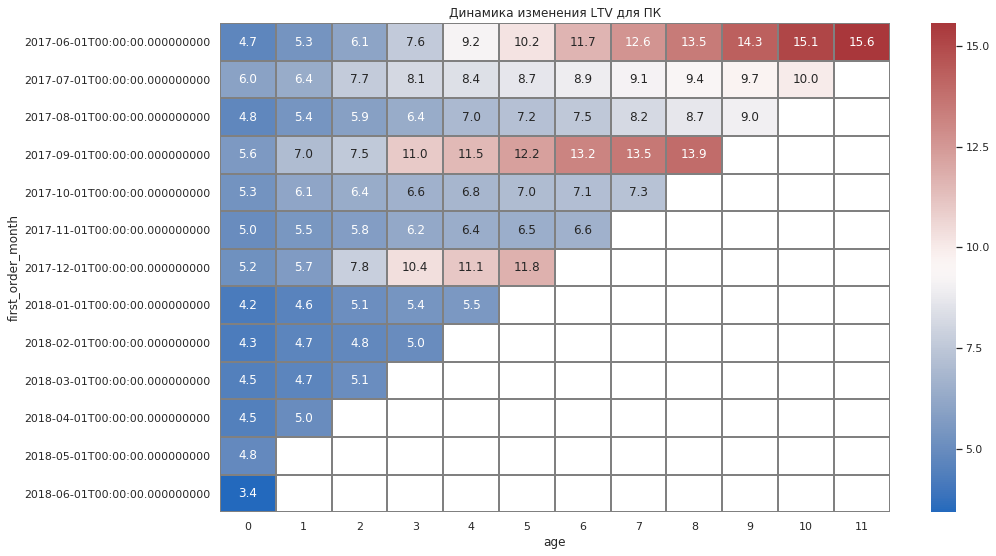

In [66]:
output_PC = cohorts_ltv_specified[cohorts_ltv_specified['first_visit_device'] == 'desktop'].pivot_table(
        index='first_order_month', 
        columns='age', 
        values='ltv', 
        aggfunc='mean')
output_PC = output_PC.cumsum(axis=1).round(2)     
output_PC.fillna('') 
print('Данные по динамике изменения LTV по месяцам для разных когорт для ПК')
# Построение тепловой карты изменения LTV для ПК
sns.set(style='white')
plt.figure(figsize=(15, 9))
plt.title('Динамика изменения LTV для ПК')
sns.heatmap(output_PC, annot=True, fmt='.1f', linewidths=1, linecolor='gray', cmap='vlag')

Данные по динамике изменения LTV по месяцам для разных когорт для мобильных устройств


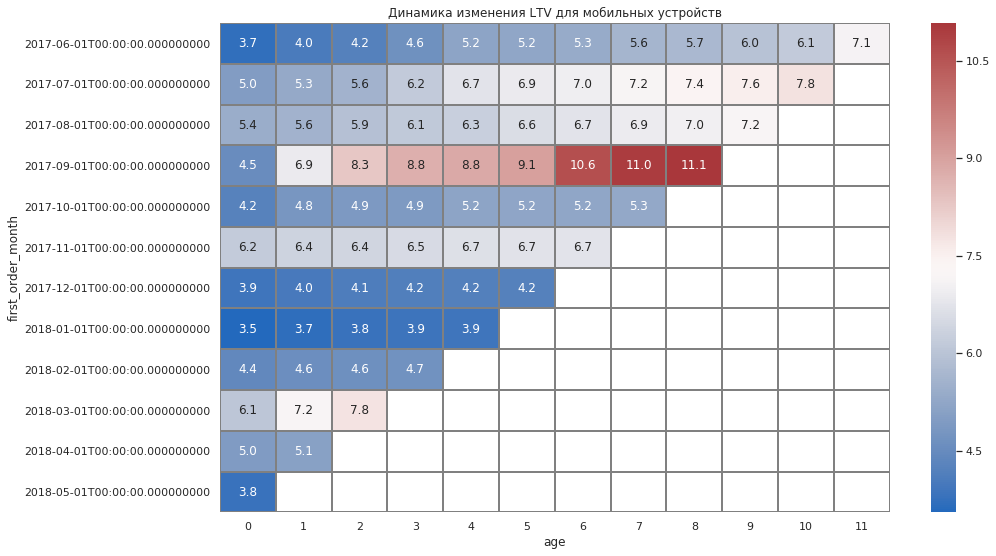

In [67]:
output_touch = cohorts_ltv_specified[cohorts_ltv_specified['first_visit_device'] == 'touch'].pivot_table(
        index='first_order_month', 
        columns='age', 
        values='ltv', 
        aggfunc='mean')
output_touch = output_touch.cumsum(axis=1).round(2)     
output_touch.fillna('') 
print('Данные по динамике изменения LTV по месяцам для разных когорт для мобильных устройств')
# Построение тепловой карты изменения LTV для мобильных устройств
sns.set(style='white')
plt.figure(figsize=(15, 9))
plt.title('Динамика изменения LTV для мобильных устройств')
sns.heatmap(output_touch, annot=True, fmt='.1f', linewidths=1, linecolor='gray', cmap='vlag')

Для мобильных устройств значения LTV для когорт в среднем ниже, чем для ПК, LTV пользователей снижается для когорт пользователей, совершивших покупки после сентября 2017 года для мобильных устройств, и после декабря 2017 для ПК.

<a id='the_destination16'></a>
## Вывод по разделу 3

На рис. 5 приведено распределение длительности времени между первым посещением сайта Яндекс.Афиша и первой покупкой.

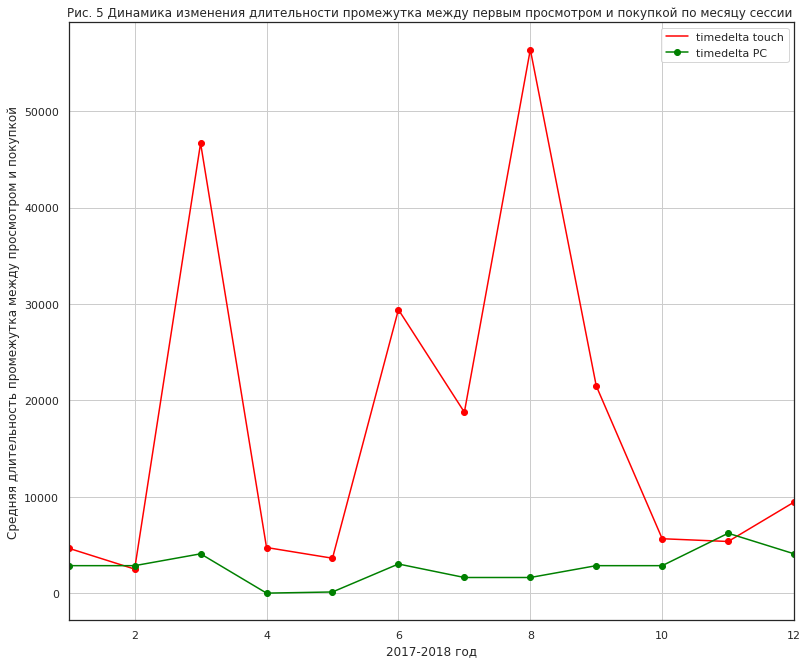

In [68]:
# построение графика динамики изменения длительности между визитом и покупкой по месяцам

# создание иллюстрации
fig = plt.figure(figsize=(8, 10))
# добавление одного графика на иллюстрацию
graph = fig.add_subplot()
# создание графика
timeline_sales_touch.plot(y='timedelta', style='-o',figsize=(13, 11), grid=True, ax=graph, label='timedelta touch', color="red")
timeline_sales_PC.plot(y='timedelta', style='-o',figsize=(13, 11), grid=True, ax=graph, label='timedelta PC', color="green")
# создание названий
plot_names(graph, 'Рис. 5 Динамика изменения длительности промежутка между первым просмотром и покупкой по месяцу сессии ', '2017-2018 год', 'Средняя длительность промежутка между просмотром и покупкой')

Хорошо видно, что для мобильных устройств время между первой покупкой и первым посещением значительно выше, чем для ПК, причем также это время сильно зависит от сезона (месяца покупки), в высокий сезон (осень-зима) время может быть выше, чем в остальные периоды, видимо это связано с более сложным и длительном выбором развлекательного мероприятия и сложностями при выборе на мобильных устройствах. Для ПК время распределено более равномерно, но также имеет сезонный характер, однако, с пиками, совпадающими с мобильными устройствами, то есть в высокий сезон выбор занимает несколько больше времени, чем в низкий.

При анализе числа покупок в разные периоды времени при предварительном анализе были получены графики для изменения среднего числа покупок в течение года в таблице 3, 4  и для месяца, недели и дня в таблице 5. На основании таблицы 4 были построены графики, изображенные на рис. 6-8.

In [69]:
print('Табл. 3 Среднее число покупок в разные годы на мобильных устройствах')
display(orders_yearly_touch)

print('Табл. 4 Среднее число покупок в разные годы на ПК')
display(orders_yearly_PC)

print('Табл. 5 Среднее число покупок в разные периоды времени')
display(orders_PC.head())

Табл. 3 Среднее число покупок в разные годы на мобильных устройствах


order_year  orders_yearly
0        2017          11421
1        2018          16546

Табл. 4 Среднее число покупок в разные годы на ПК


order_year  orders_yearly
0        2017         128593
1        2018         233459

Табл. 5 Среднее число покупок в разные периоды времени


order_year  orders_yearly  order_month  orders_monthly  order_week  \
0        2017         128593            6            3076          22   
1        2017         128593            6            3076          22   
2        2017         128593            6            3076          22   
3        2017         128593            6            3076          22   
4        2017         128593            6            3076          22   

   orders_weekly  order_date  orders_daily  
0            327  2017-06-01            95  
1            327  2017-06-02           106  
2            327  2017-06-03            62  
3            327  2017-06-04            64  
4            327  2017-06-05           191

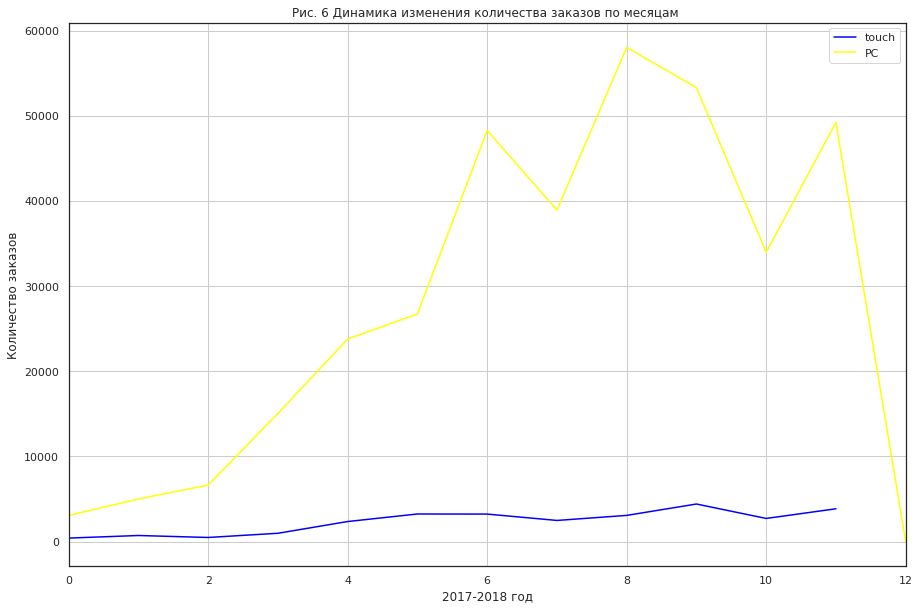

In [70]:
# создание иллюстрации с сравнением изменения во времени количества заказов в месяц 
fig = plt.figure(figsize=(15, 10))
# добавление одного графика на иллюстрацию
graph = fig.add_subplot()
# создание графика по месяцам
orders_monthly_touch.plot(y='orders_monthly', grid=True, ax=graph, color="blue", label='touch')
orders_monthly_PC.plot(y='orders_monthly', grid=True, ax=graph, color="yellow", label='PC')
# создание названий
plot_names(graph, 'Рис. 6 Динамика изменения количества заказов по месяцам ', '2017-2018 год', 'Количество заказов')

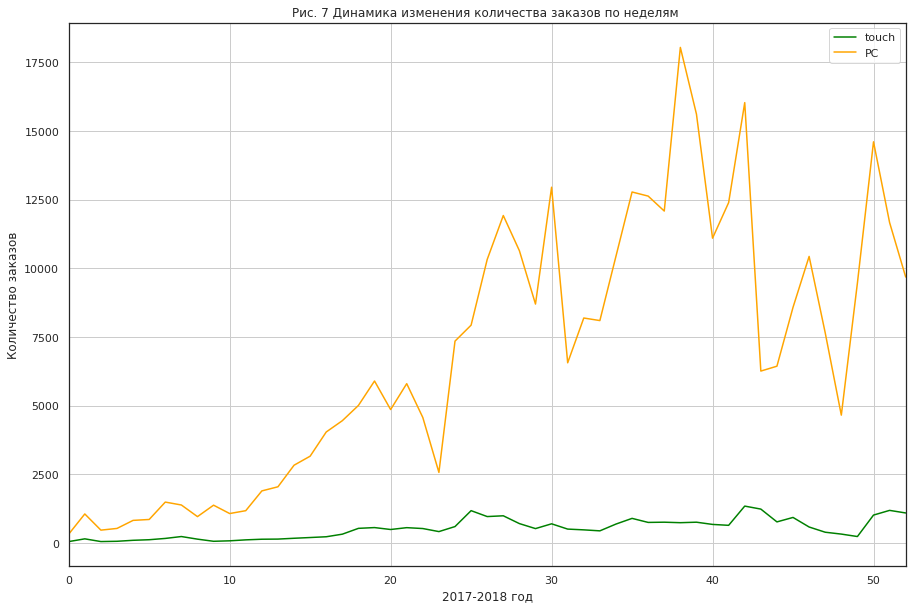

In [71]:
# создание иллюстрации с сравнением изменения во времени количества заказов в неделю
fig = plt.figure(figsize=(15, 10))
# добавление одного графика на иллюстрацию
graph = fig.add_subplot()
# создание графика по месяцам
orders_weekly_touch.plot(y='orders_weekly', grid=True, ax=graph, color="green", label='touch')
orders_weekly_PC.plot(y='orders_weekly', grid=True, ax=graph, color="orange", label='PC')
# создание названий
plot_names(graph, 'Рис. 7 Динамика изменения количества заказов по неделям ', '2017-2018 год', 'Количество заказов')


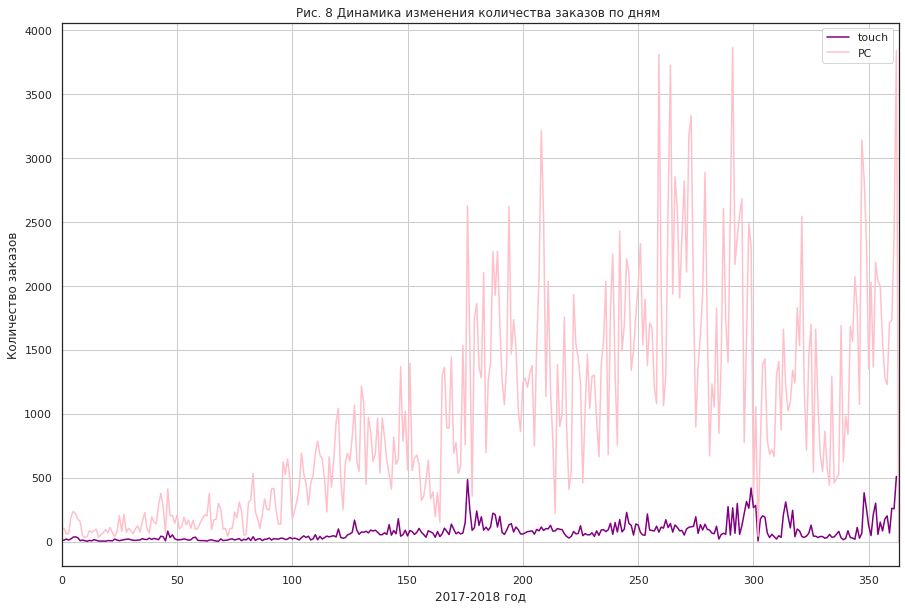

In [72]:
# создание иллюстрации с сравнением изменения во времени количества заказов в день
fig = plt.figure(figsize=(15, 10))
# добавление одного графика на иллюстрацию
graph = fig.add_subplot()
# создание графика по месяцам
orders_daily_touch.plot(y='orders_daily', grid=True, ax=graph, color="purple", label='touch')
orders_daily_PC.plot(y='orders_daily', grid=True, ax=graph, color="pink", label='PC')
# создание названий
plot_names(graph, 'Рис. 8 Динамика изменения количества заказов по дням ', '2017-2018 год', 'Количество заказов')

Хорошо видно, что общее количество заказов на мобильных устройствах значительно ниже чем на ПК. Однако, проанализировав рис. 6-8 можно отметить, что колебания общего количества заказов на мобильных устройствах ниже, чем на ПК. Количество заказов на ПК сильно зависит от сезона, недели и дня недели, для мобильных устройств также наблюдается некоторая сезонность, однако не такая заметная как для ПК. В течение наблюдаемого времени несмотря на отток пользователей общее количество заказов растет, что может говорить как о недостаточно широком диапазоне выборке (с учетом сезонности покупок билетов на развлекательные мероприятия), так и о том, что оставшиеся пользователи активно покупают в Яндекс.Афише и со временем общее количество покупок растет. 

Для анализа среднего чека были построение тепловые карты среднего чека, представленные на рис. 9, 10.

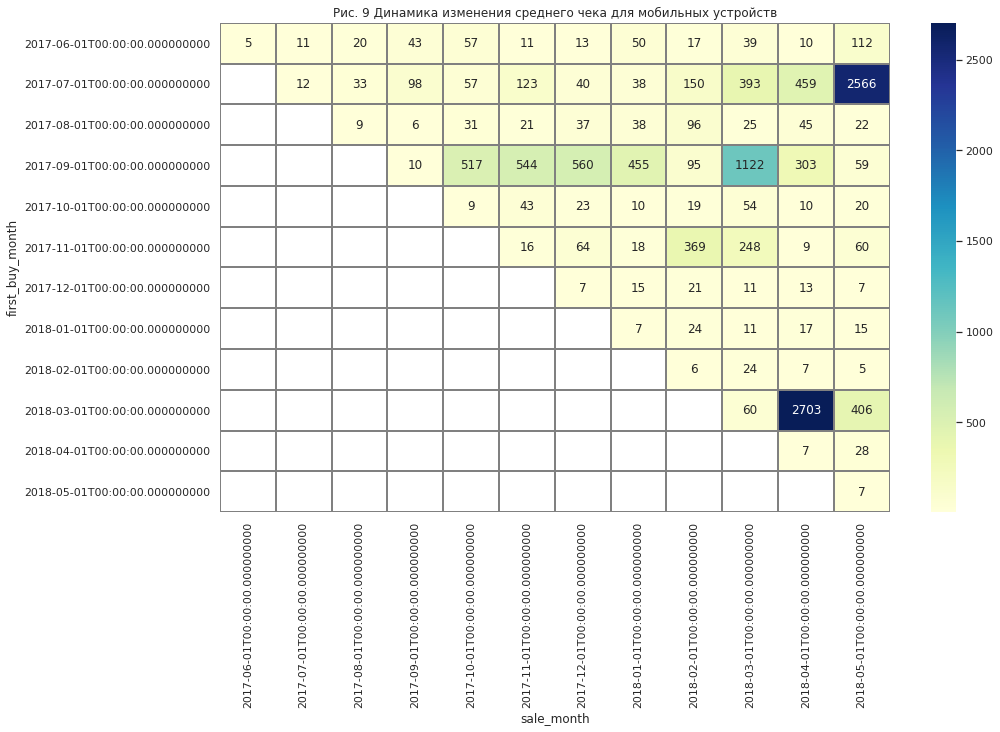

In [73]:
# Построение тепловой карты изменения среднего чека для мобильных устройств
sns.set(style='white')
plt.figure(figsize=(15, 9))
plt.title('Рис. 9 Динамика изменения среднего чека для мобильных устройств')
sns.heatmap(average_check_touch, annot=True, fmt='.0f', linewidths=1, linecolor='gray', cmap='YlGnBu')

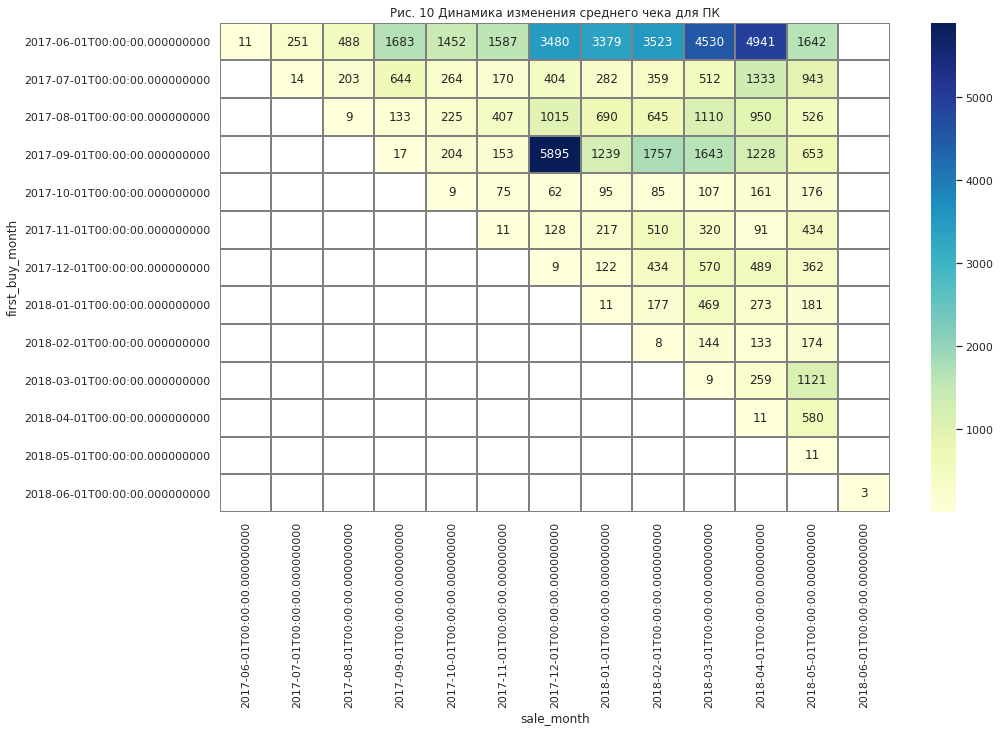

In [74]:
# Построение тепловой карты изменения среднего чека для мобильных устройств
sns.set(style='white')
plt.figure(figsize=(15, 9))
plt.title('Рис. 10 Динамика изменения среднего чека для ПК')
sns.heatmap(average_check_PC, annot=True, fmt='.0f', linewidths=1, linecolor='gray', cmap='YlGnBu')

На тепловых картах хорошо видно, что средний чек пользователя сильно меняется сильно в зависимости от сезона, однако для пользователей, зарегистрировавшихся до ноября 2017 года средний чек выше, чем для пользователей, зарегистрировавшихся позднее, для пользователей мобильных приложений средний чек ниже, чем для пользователей ПК. 

На рис. 11, 12 приведены тепловые карты изменения LTV - итоговой суммы денег, которую один клиент приносит в среднем со всех своих покупок по месяцам. 

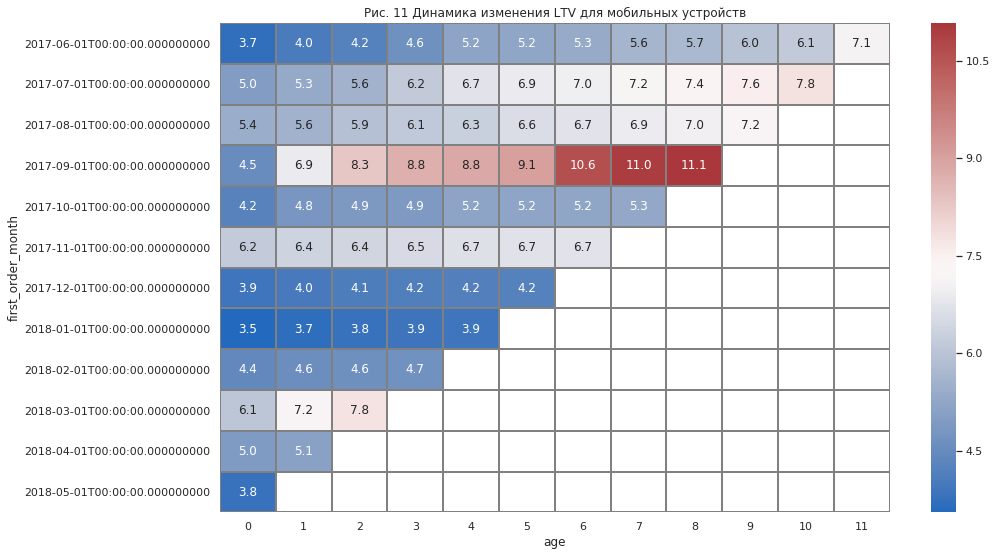

In [75]:
# Построение тепловой карты изменения LTV для мобильных устройств
sns.set(style='white')
plt.figure(figsize=(15, 9))
plt.title('Рис. 11 Динамика изменения LTV для мобильных устройств')
sns.heatmap(output_touch, annot=True, fmt='.1f', linewidths=1, linecolor='gray', cmap='vlag')

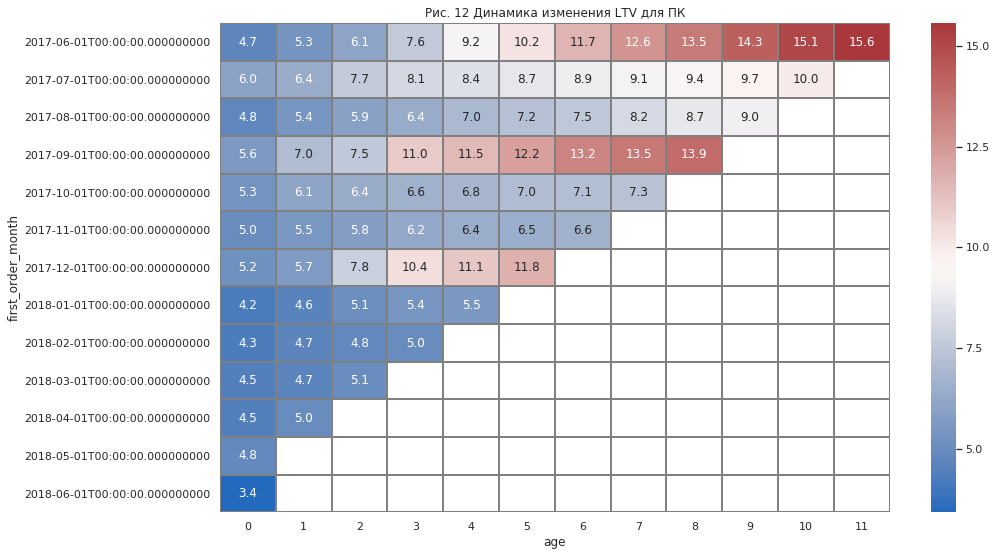

In [76]:
# Построение тепловой карты изменения LTV для ПК
sns.set(style='white')
plt.figure(figsize=(15, 9))
plt.title('Рис. 12 Динамика изменения LTV для ПК')
sns.heatmap(output_PC, annot=True, fmt='.1f', linewidths=1, linecolor='gray', cmap='vlag')

Для мобильных устройств значения LTV для когорт в среднем ниже, чем для ПК, LTV пользователей снижается для когорт пользователей, совершивших покупки после сентября 2017 года для мобильных устройств, и после декабря 2017 для ПК.

<a id='the_destination17'></a>
# 4. Построение отчётов и расчет метрик для маркетинга

<a id='the_destination18'></a>
## 4.1 Определение общих расходов на маркетинг

Определим общие расходы на маркетинг, расходы по источникам и по устройствам

In [77]:
display(expenses.head())
expenses['year'] = expenses['date'].dt.year

source_id       date  costs
0          1 2017-06-01  75.20
1          1 2017-06-02  62.25
2          1 2017-06-03  36.53
3          1 2017-06-04  55.00
4          1 2017-06-05  57.08

In [78]:
costs_yearly = expenses.pivot_table(index='year', columns='source_id', values='costs', aggfunc='sum')
print('Общие расходы на маркетинг по годам по источникам')
display(costs_yearly)

whole_costs = costs_yearly.sum(axis=0).round(2)
print('Общие затраты по источникам', whole_costs)

Общие расходы на маркетинг по годам по источникам


source_id        1         2         3         4         5        9        10
year                                                                         
2017       11754.42  24547.68  80495.21  34944.28  29613.94  3202.88  3402.74
2018        9078.85  18258.36  60826.42  26129.32  22143.16  2314.61  2419.75

Общие затраты по источникам source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
dtype: float64


In [79]:
# Рассчитаем ежемесячные расходы по источнику для мобильных устройств и ПК
expenses['month'] = expenses['date'].astype('datetime64[M]')
print('Общие расходы на маркетинг по месяцам')
monthly_costs_sources = expenses.pivot_table(index='month', columns = 'source_id', values='costs', aggfunc='sum')
display(monthly_costs_sources)

Общие расходы на маркетинг по месяцам


source_id        1        2         3        4        5       9       10
month                                                                   
2017-06-01  1125.61  2427.38   7731.65  3514.80  2616.12  285.22  314.22
2017-07-01  1072.88  2333.11   7674.37  3529.73  2998.14  302.54  329.82
2017-08-01   951.81  1811.05   6143.54  3217.36  2185.28  248.93  232.57
2017-09-01  1502.01  2985.66   9963.55  5192.26  3849.14  415.62  460.67
2017-10-01  2315.75  4845.00  15737.24  6420.84  5767.40  609.41  627.24
2017-11-01  2445.16  5247.68  17025.34  5388.82  6325.34  683.18  792.36
2017-12-01  2341.20  4897.80  16219.52  7680.47  5872.52  657.98  645.86
2018-01-01  2186.18  4157.74  14808.78  5832.79  5371.52  547.16  614.35
2018-02-01  2204.48  4474.34  14228.56  5711.96  5071.31  551.50  480.88
2018-03-01  1893.09  3943.14  13080.85  5961.87  4529.62  480.29  526.41
2018-04-01  1327.49  2993.70   9296.81  4408.49  3501.15  373.49  388.25
2018-05-01  1467.61  2689.44   9411.42  4214.21  3669.56  362.17  409.86

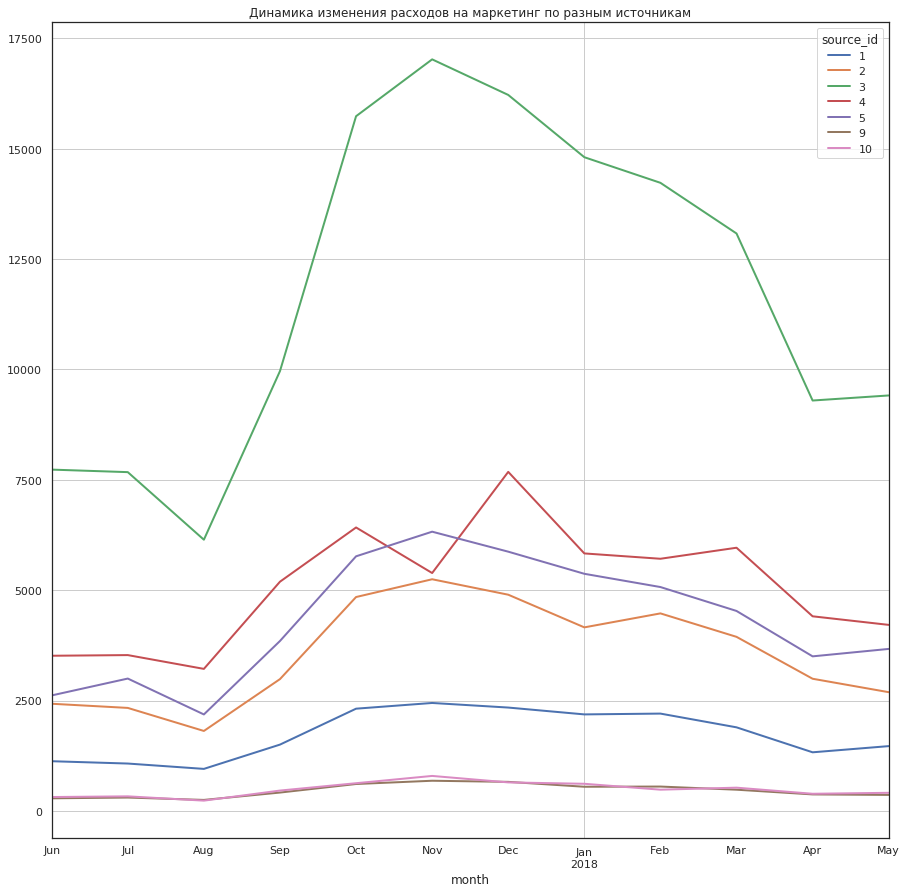

In [80]:
# добавление графика на иллюстрацию
# создание графикa
monthly_costs_sources.plot(linewidth=2, markersize=12, figsize=(15, 15), grid=True, title='Динамика изменения расходов на маркетинг по разным источникам')

Для того, чтобы разделить расходы по устройствам привяжем таблицу с расходами, где указаны цены за привлечение клиентов с источников к таблице с данными о профиле пользователя, осуществим слияние таблиц и по дате привлечения клиента и источнику. 

In [81]:
expenses.rename(columns={'date': 'first_visit', 'source_id': 'first_visit_source'}, inplace=True)

display(expenses.head(1))

display(user_profile.head(10))

# определение числа клиентов привлеченных в день с одного источникa
users_from_source = user_profile.groupby(by=['first_visit_source', 'first_visit']).agg({'uid': 'count'}).reset_index()
users_from_source.rename(columns={'uid': 'users_number'}, inplace=True)
print('Число клиентов привлеченных в день с одного источника')
display(users_from_source)

# Определение затрат по привлечению одного клиента в день по источникам и дням
expenses_merged = expenses.merge(users_from_source, on = ['first_visit_source', 'first_visit'])
print('Затраты на привлечение одного клиента в день')
expenses_merged['costs_per_user'] = (expenses_merged['costs'] / expenses_merged['users_number']).round(2)
display(expenses_merged.head())

# Определение расходов по платформам
user_profile = user_profile.merge(expenses_merged[['first_visit_source', 'first_visit', 'costs_per_user']], on=['first_visit_source', 'first_visit'])
print('Профиль пользователя')
display(user_profile.head())

first_visit_source first_visit  costs  year      month
0                   1  2017-06-01   75.2  2017 2017-06-01

uid first_visit  first_visit_source first_visit_device  \
0   313578113262317  2017-09-18                   2            desktop   
1  1575281904278712  2017-06-03                  10              touch   
2  2429014661409475  2017-10-11                   3            desktop   
3  2464366381792757  2018-01-27                   5            desktop   
4  2551852515556206  2017-11-24                   5            desktop   
5  3077748354309989  2018-03-03                   3              touch   
6  3605148382144603  2017-08-15                   2            desktop   
7  3753586865891862  2018-03-03                   4            desktop   
8  4808417689019433  2018-01-09                   4            desktop   
9  4992223027560440  2018-04-04                   5              touch   

  first_order_month  user_revenue  
0        2018-01-01          0.55  
1        2017-06-01          3.05  
2        2017-10-01         73.33  
3        2018-01-01          2.44  
4        2017-11-01         10.99  
5        2018-03-01          4.67  
6        2017-09-01          0.69  
7        2018-03-01          3.50  
8        2018-01-01          1.22  
9        2018-04-01          3.05

Число клиентов привлеченных в день с одного источника


first_visit_source first_visit  users_number
0                      1  2017-06-01            24
1                      1  2017-06-02            12
2                      1  2017-06-03             8
3                      1  2017-06-04             6
4                      1  2017-06-05            20
...                  ...         ...           ...
2395                  10  2018-05-27             2
2396                  10  2018-05-28             7
2397                  10  2018-05-29             4
2398                  10  2018-05-30            10
2399                  10  2018-05-31            25

[2400 rows x 3 columns]

Затраты на привлечение одного клиента в день


first_visit_source first_visit  costs  year      month  users_number  \
0                   1  2017-06-01  75.20  2017 2017-06-01            24   
1                   1  2017-06-02  62.25  2017 2017-06-01            12   
2                   1  2017-06-03  36.53  2017 2017-06-01             8   
3                   1  2017-06-04  55.00  2017 2017-06-01             6   
4                   1  2017-06-05  57.08  2017 2017-06-01            20   

   costs_per_user  
0            3.13  
1            5.19  
2            4.57  
3            9.17  
4            2.85

Профиль пользователя


uid first_visit  first_visit_source first_visit_device  \
0      313578113262317  2017-09-18                   2            desktop   
1   461339667956256009  2017-09-18                   2            desktop   
2   792100672631898829  2017-09-18                   2            desktop   
3  1639974580326523067  2017-09-18                   2            desktop   
4  2883839899480223178  2017-09-18                   2            desktop   

  first_order_month  user_revenue  costs_per_user  
0        2018-01-01          0.55            6.89  
1        2017-09-01          4.28            6.89  
2        2017-09-01          3.18            6.89  
3        2018-05-01          0.49            6.89  
4        2017-09-01          0.00            6.89

In [82]:
orders_joined = orders_joined.merge(user_profile[['uid', 'costs_per_user']], on='uid')
display(orders_joined.head(2))

data = orders_joined.groupby(by=['uid', 'order_month', 'first_visit_device']).agg({'revenue': 'sum', 'costs_per_user' : 'first'})
display(data.head())

monthly_costs_devices = data.pivot_table(index='order_month', columns = 'first_visit_device', values='costs_per_user', aggfunc='sum')
display(monthly_costs_devices)

whole_costs_devices = monthly_costs_devices.sum(axis=0).round(2).reset_index()
print('Общие затраты по платформам')
display(whole_costs_devices)

buy_ts  revenue               uid order_month  \
0 2018-01-03 21:51:00     0.55   313578113262317  2018-01-01   
1 2017-06-03 10:13:00     1.22  1575281904278712  2017-06-01   

  first_order_month first_visit  first_visit_source first_visit_device  \
0        2018-01-01  2017-09-18                   2            desktop   
1        2017-06-01  2017-06-03                  10              touch   

   costs_per_user  
0            6.89  
1            1.20

revenue  costs_per_user
uid              order_month first_visit_device                         
313578113262317  2018-01-01  desktop                0.55            6.89
1575281904278712 2017-06-01  touch                  3.05            1.20
2429014661409475 2017-10-01  desktop               73.33            8.85
2464366381792757 2018-01-01  desktop                2.44            8.49
2551852515556206 2017-11-01  desktop               10.99           16.35

first_visit_device   desktop    touch
order_month                          
2017-06-01          10365.11  1888.23
2017-07-01          11654.45  2700.52
2017-08-01           9986.67  2196.28
2017-09-01          17362.56  4318.78
2017-10-01          28462.08  6349.70
2017-11-01          31966.97  7021.78
2017-12-01          35821.76  8639.90
2018-01-01          30993.19  7694.79
2018-02-01          31814.62  9171.43
2018-03-01          33555.00  7747.66
2018-04-01          24376.61  5173.62
2018-05-01          26970.80  6812.55
2018-06-01              9.12      NaN

Общие затраты по платформам


first_visit_device          0
0            desktop  293338.94
1              touch   69715.24

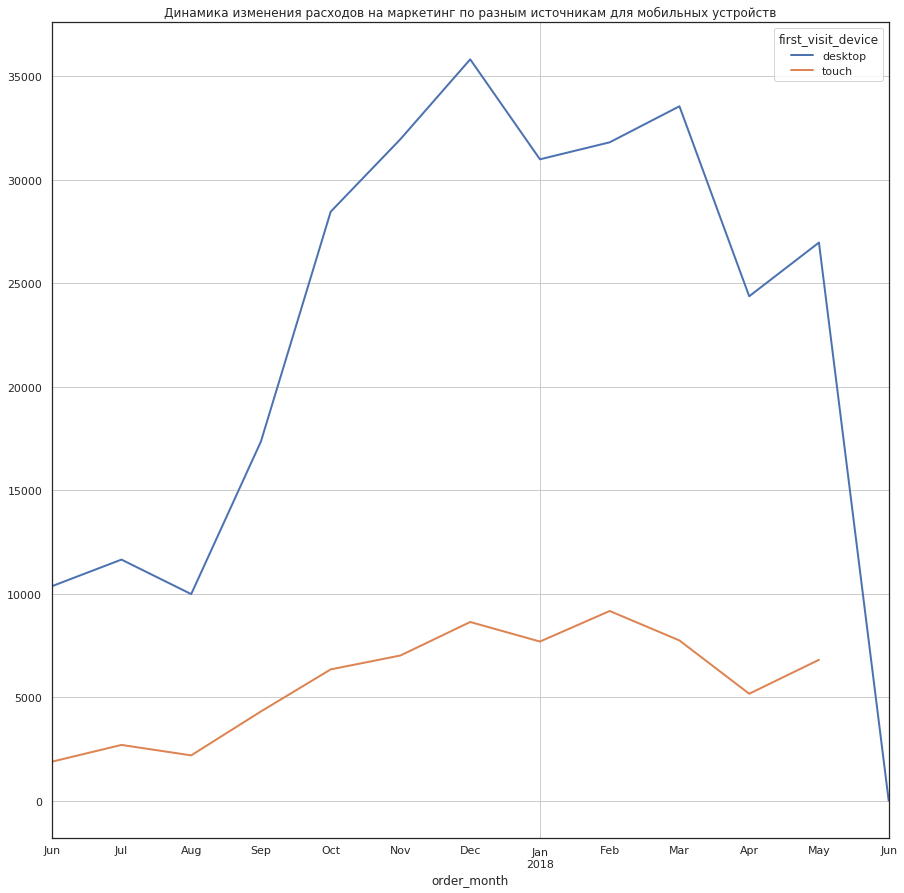

In [83]:
# создание графикa
monthly_costs_devices.plot(linewidth=2, markersize=12, figsize=(15, 15), grid=True, title='Динамика изменения расходов на маркетинг по разным источникам для мобильных устройств')

 Хорошо видно, что для мобильных устройств наибольшие расходы на источники 3,4, 5, а наименьшие - на источники 9 и 10. То есть источники 3, 4, 5 являются наиболее ресурсозатратными, как для мобильных устройств, так и для ПК, а источники 9 и 10 - наименее затратными. Для мобильных устройств и ПК наблюдается сезонность в колебаниях расходов, однако для ПК расходы значительно выше и растут после августа 2017 года, тогда как для мобильных устройств наблюдается снижение после марта 2018 года.

## Расчет САС и ROMI после правки

In [84]:
monthly_costs = user_profile.groupby(['first_order_month', 'first_visit_device', 'first_visit_source']).agg({'costs_per_user':'sum'}).reset_index()
monthly_costs.rename(columns={'costs_per_user': 'costs'}, inplace=True)
print('Таблица с данными по месячным расходам')
display(monthly_costs.head())
#print(monthly_costs['costs'].sum())
#print(expenses['costs'].sum())
print('Таблица с данными по LTV')
display(cohorts_ltv_specified.head())
#print(cohorts_ltv_specified['revenue'].sum())
#print(orders['revenue'].sum())

report = pd.merge(cohorts_ltv_specified, monthly_costs, on=['first_order_month', 'first_visit_device', 'first_visit_source'])
report['cac'] = report['costs'] / report['new_buyers']
print('Сводная таблица с указанием расходов и САС')
display(report.head())

# Определение ROMI - отношение LTV к CAC
report['romi'] = report['ltv'] / report['cac']
print('Сводная таблица с указанием ROMI')
display(report.head())

Таблица с данными по месячным расходам


first_order_month first_visit_device  first_visit_source    costs
0        2017-06-01            desktop                   1   654.67
1        2017-06-01            desktop                   2  1190.07
2        2017-06-01            desktop                   3  4829.93
3        2017-06-01            desktop                   4  1730.22
4        2017-06-01            desktop                   5  1690.46

Таблица с данными по LTV


first_visit_source first_visit_device first_order_month  new_buyers  \
0                   1            desktop        2017-06-01         163   
1                   1            desktop        2017-06-01         163   
2                   1            desktop        2017-06-01         163   
3                   1            desktop        2017-06-01         163   
4                   1            desktop        2017-06-01         163   

  order_month  revenue  age       ltv  
0  2017-06-01  1249.17    0  7.663620  
1  2017-07-01   413.15    1  2.534663  
2  2017-08-01   419.43    2  2.573190  
3  2017-09-01   692.92    3  4.251043  
4  2017-10-01   768.36    4  4.713865

Сводная таблица с указанием расходов и САС


first_visit_source first_visit_device first_order_month  new_buyers  \
0                   1            desktop        2017-06-01         163   
1                   1            desktop        2017-06-01         163   
2                   1            desktop        2017-06-01         163   
3                   1            desktop        2017-06-01         163   
4                   1            desktop        2017-06-01         163   

  order_month  revenue  age       ltv   costs      cac  
0  2017-06-01  1249.17    0  7.663620  654.67  4.01638  
1  2017-07-01   413.15    1  2.534663  654.67  4.01638  
2  2017-08-01   419.43    2  2.573190  654.67  4.01638  
3  2017-09-01   692.92    3  4.251043  654.67  4.01638  
4  2017-10-01   768.36    4  4.713865  654.67  4.01638

Сводная таблица с указанием ROMI


first_visit_source first_visit_device first_order_month  new_buyers  \
0                   1            desktop        2017-06-01         163   
1                   1            desktop        2017-06-01         163   
2                   1            desktop        2017-06-01         163   
3                   1            desktop        2017-06-01         163   
4                   1            desktop        2017-06-01         163   

  order_month  revenue  age       ltv   costs      cac      romi  
0  2017-06-01  1249.17    0  7.663620  654.67  4.01638  1.908091  
1  2017-07-01   413.15    1  2.534663  654.67  4.01638  0.631081  
2  2017-08-01   419.43    2  2.573190  654.67  4.01638  0.640674  
3  2017-09-01   692.92    3  4.251043  654.67  4.01638  1.058426  
4  2017-10-01   768.36    4  4.713865  654.67  4.01638  1.173660

In [85]:
# Определение средних по когортам значений САС
output = report.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='cac', 
        aggfunc='mean')
output.fillna('')
output = output.mean(axis=0)
output.name = 'cac_mean'
display(output)

age
0     7.864885
1     8.214737
2     7.735070
3     7.814922
4     7.258592
5     7.201373
6     7.145834
7     6.952833
8     6.520190
9     6.782894
10    6.157841
11    6.102712
Name: cac_mean, dtype: float64

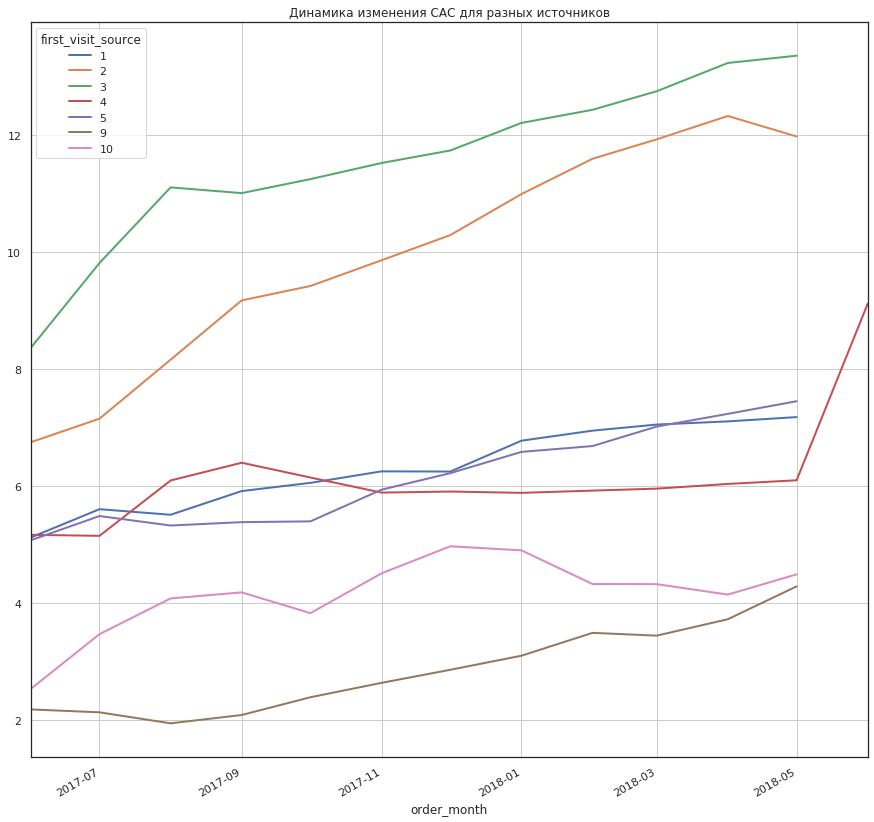

In [86]:
# Формирование графиков по источникам
output_cac_sources = report.pivot_table(
        index=['first_order_month', 'first_visit_source'], 
        columns='order_month', 
        values='cac', 
        aggfunc='mean').reset_index()
output_cac_sources = output_cac_sources.groupby(by='first_visit_source').mean()

output_cac_sources = output_cac_sources.transpose()
output_cac_sources.plot(linewidth=2, markersize=12, figsize=(15, 15), grid=True, title='Динамика изменения САС для разных источников')

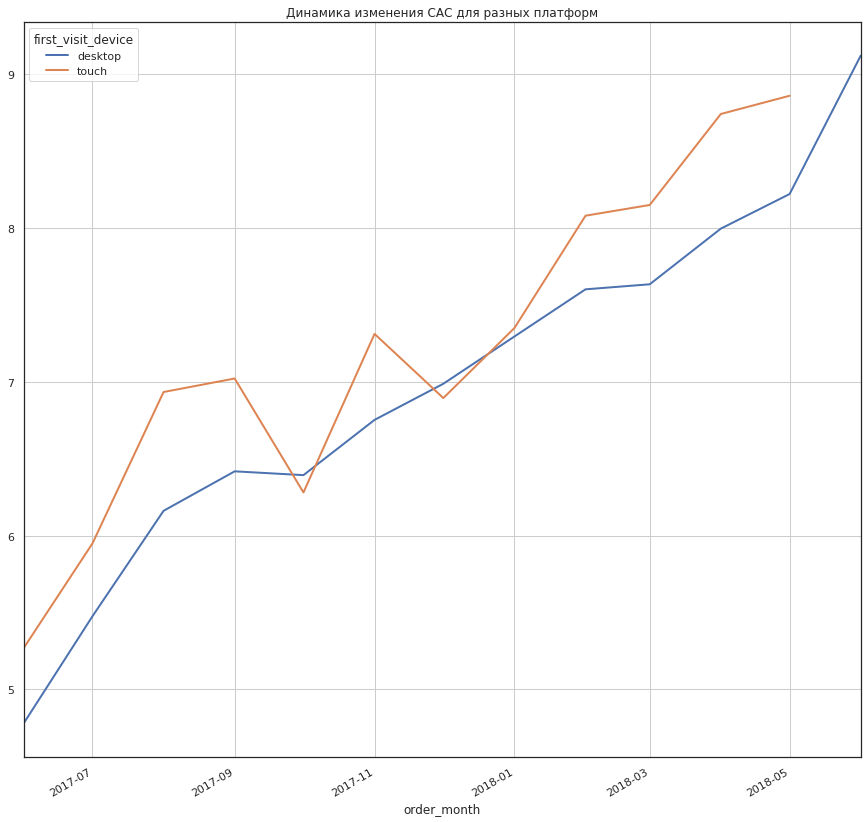

In [87]:
# Формирование графиков по устройствам
output_cac_device = report.pivot_table(
        index=['first_order_month', 'first_visit_device'], 
        columns='order_month', 
        values='cac', 
        aggfunc='mean').reset_index()
output_cac_device = output_cac_device.groupby(by='first_visit_device').mean()

output_cac_device = output_cac_device.transpose()
output_cac_device.plot(linewidth=2, markersize=12, figsize=(15, 15), grid=True, title='Динамика изменения САС для разных платформ')

Стоимость привлечения клиента и валовая прибыль изменяются в зависимости от сезона и когорты. Для того, чтобы сравнить расходы на привлечение клиентов по различным источником целесообразно воспользоваться средней когортой - то есть усреднить значения САС всех когорт за месяц их жизни. На рисунках приведена динамика средних расходов для разных источников для ПК и мобильных устройств. 
То есть с точки зрения стоимости привлечения клиента наиболее дорогостоящими являются источники 2, 3. Для всех источников характерно сезонное изменение расходов на средних значений стоимости привлечения клиентов. Наиболее дешевыми являются источники 9 и 10. Для оценки окупаемости расходов воспользуемся оценкой коэффициента ROMI.

In [88]:
# Определение средних по когортам значений ROMI
output = report.pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')
output = output.cumsum(axis=1).round(2)
output = output.mean(axis=0)
display(output)

age
0     0.729231
1     0.849091
2     0.951000
3     1.074444
4     1.198750
5     1.345714
6     1.498333
7     1.686000
8     1.922500
9     1.956667
10    2.225000
11    2.850000
dtype: float64

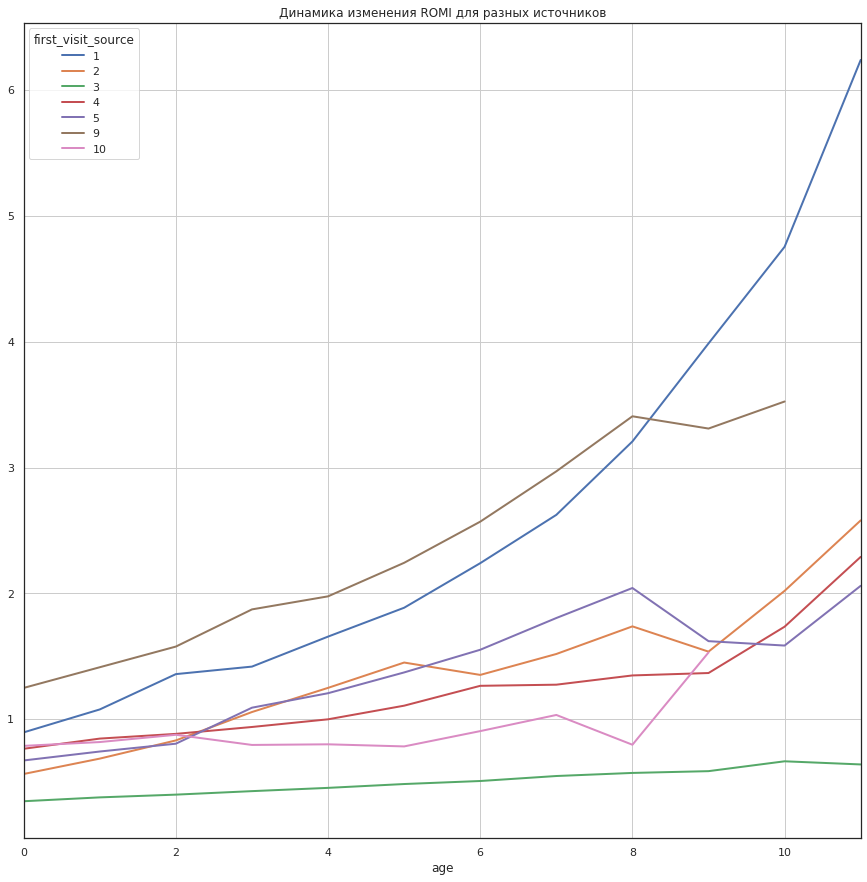

In [89]:
# Формирование графиков по источникам
output_romi_sources = report.pivot_table(
        index=['first_order_month', 'first_visit_source'], 
        columns='age', 
        values='romi', 
        aggfunc='mean').cumsum(axis=1).round(2).reset_index()
output_romi_sources = output_romi_sources.groupby(by='first_visit_source').mean()

output_romi_sources = output_romi_sources.transpose()
output_romi_sources.plot(linewidth=2, markersize=12, figsize=(15, 15), grid=True, title='Динамика изменения ROMI для разных источников')

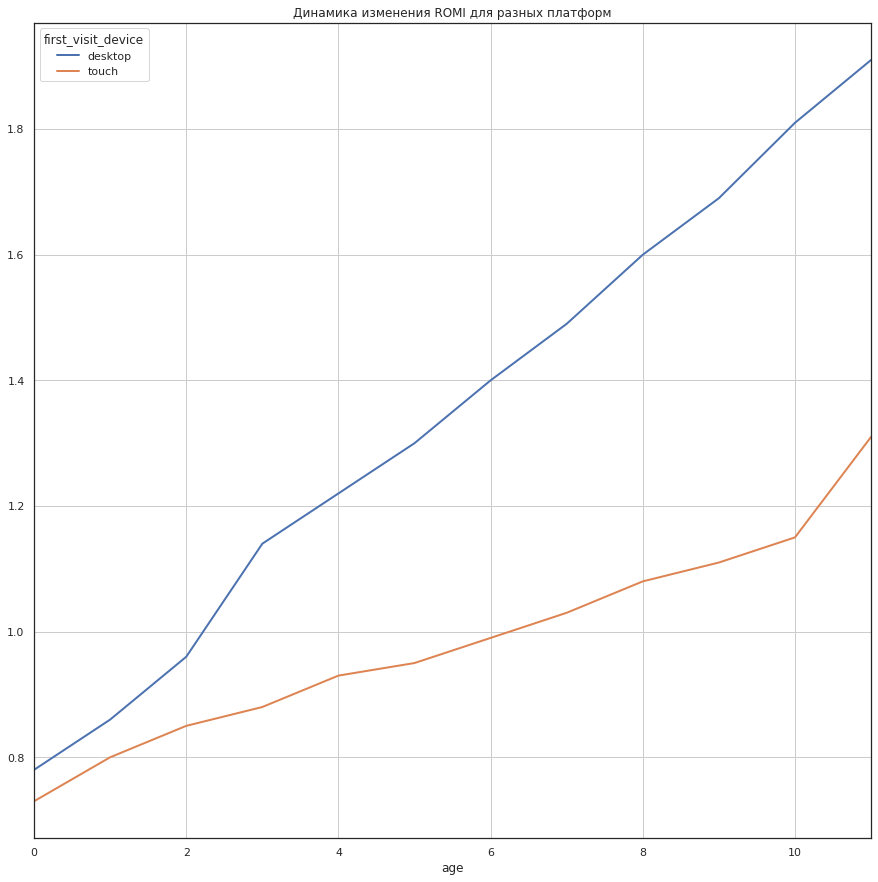

In [90]:
# Формирование графиков по платформам
output_romi_devices = report.pivot_table(
        index=['first_visit_device'], 
        columns='age', 
        values='romi', 
        aggfunc='mean').cumsum(axis=1).round(2).reset_index()
output_romi_devices = output_romi_devices.groupby(by='first_visit_device').mean()

output_romi_devices = output_romi_devices.transpose()
output_romi_devices.plot(linewidth=2, markersize=12, figsize=(15, 15), grid=True, title='Динамика изменения ROMI для разных платформ')

На рисунках приведена динамика накопительных коэффициентов ROMI для разных источников для мобильных устройств и ПК. Видно, что для источников 5, 9 и 10 характерно изменение накопительного коэффициента ROMI в зависимости от возраста когорты. В рассматриваемый промежуток времени окупаются источники 1, 2, 4, 5, 9, 10. Источник 3 не окупается. Наиболее быстро окупаются источники 9 и 1, медленнее 4, 2, 5, 10. Учитывая, что источники 9 и 10 являются также наименее затратными источниками, то целесообразно увеличить расходы на эти источники, также целесообразно продолжать вкладывать деньги в развитие источника 1. При сравнении мобильной платформы и ПК видно, что ПК окупается значительно быстрее.

<a id='the_destination20'></a>
# Вывод по разделу 4

Общие годовые расходы на маркетинг для разных источников приведены в таблице 6.

In [91]:
print('Таблица 6. Общие расходы на маркетинг по годам для разных источников')
costs_yearly = expenses.pivot_table(index='year', columns='first_visit_source', values='costs', aggfunc='sum')
display(costs_yearly)

Таблица 6. Общие расходы на маркетинг по годам для разных источников


first_visit_source        1         2         3         4         5        9   \
year                                                                            
2017                11754.42  24547.68  80495.21  34944.28  29613.94  3202.88   
2018                 9078.85  18258.36  60826.42  26129.32  22143.16  2314.61   

first_visit_source       10  
year                         
2017                3402.74  
2018                2419.75

Хорошо видно, что общие годовые расходы в 2018 году ниже, чем в 2017 году.
На рис. 13 и 14 приведены графики, отображающие динамику изменения расходов на маркетинг по разным источникам и платформам в течение исследуемого периода.

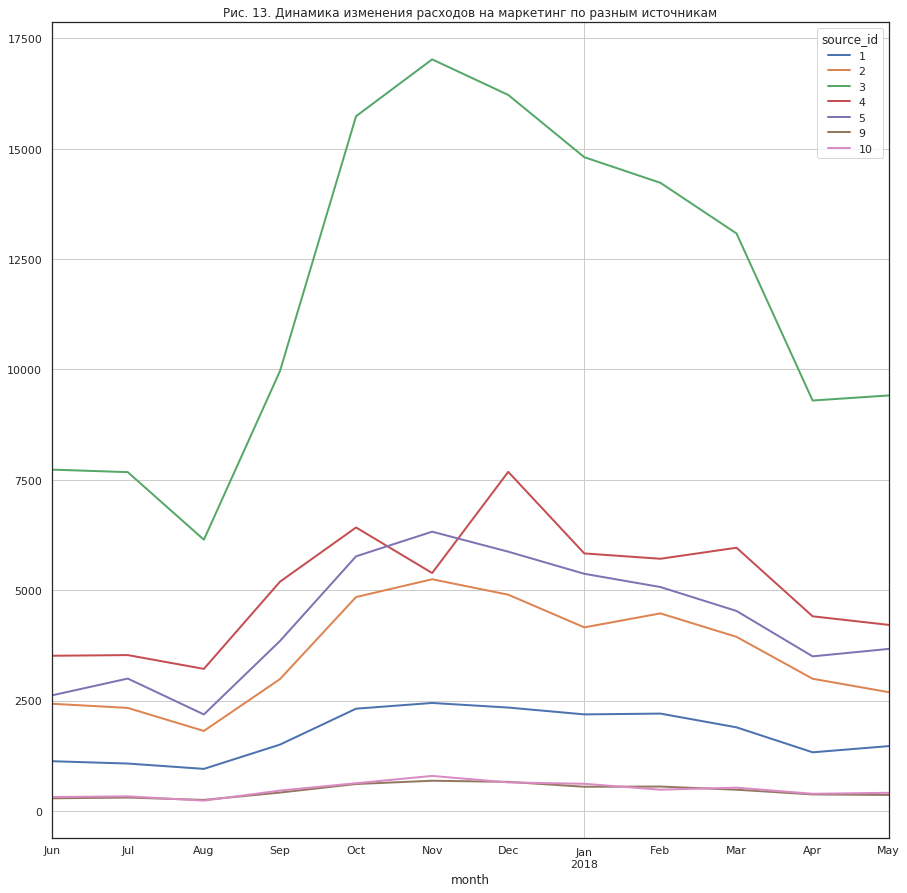

In [92]:
monthly_costs_sources.plot(linewidth=2, markersize=12, figsize=(15, 15), grid=True, title='Рис. 13. Динамика изменения расходов на маркетинг по разным источникам')

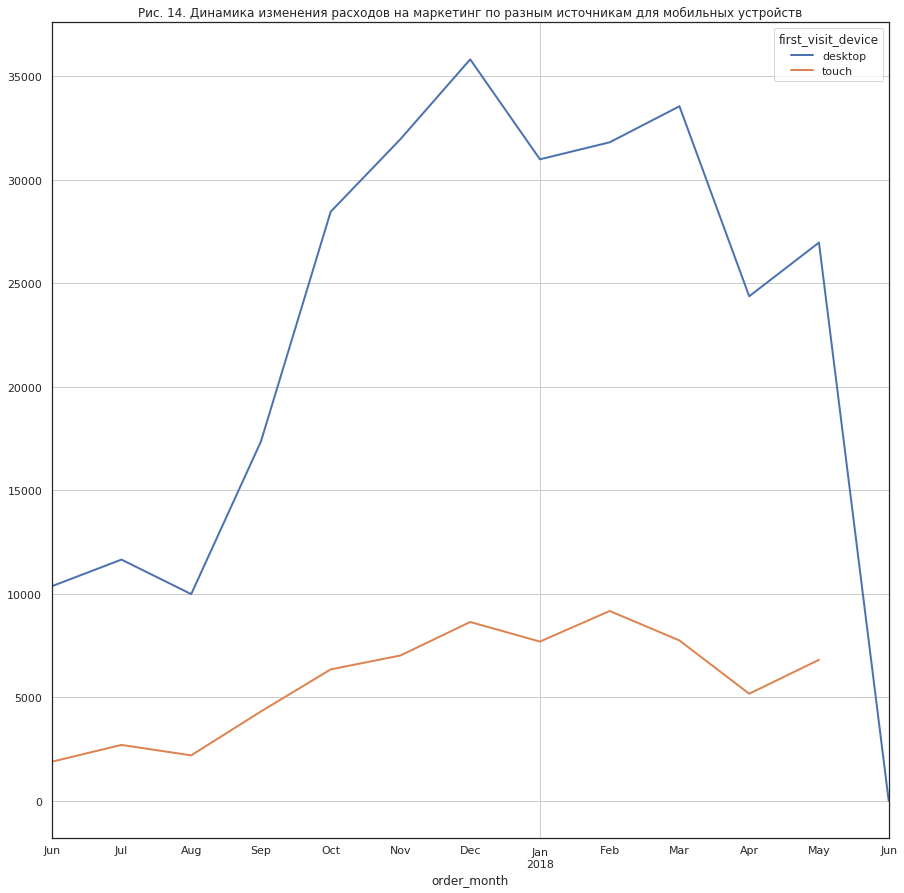

In [93]:
monthly_costs_devices.plot(linewidth=2, markersize=12, figsize=(15, 15), grid=True, title='Рис. 14. Динамика изменения расходов на маркетинг по разным источникам для мобильных устройств')

 Хорошо видно, что для мобильных устройств наибольшие расходы на источники 3,4, 5, а наименьшие - на источники 9 и 10. То есть источники 3, 4, 5 являются наиболее ресурсозатратными, как для мобильных устройств, так и для ПК, а источники 9 и 10 - наименее затратными. Для мобильных устройств и ПК наблюдается сезонность в колебаниях расходов, однако для ПК расходы значительно выше и растут после августа 2017 года, тогда как для мобильных устройств наблюдается снижение после марта 2018 года.

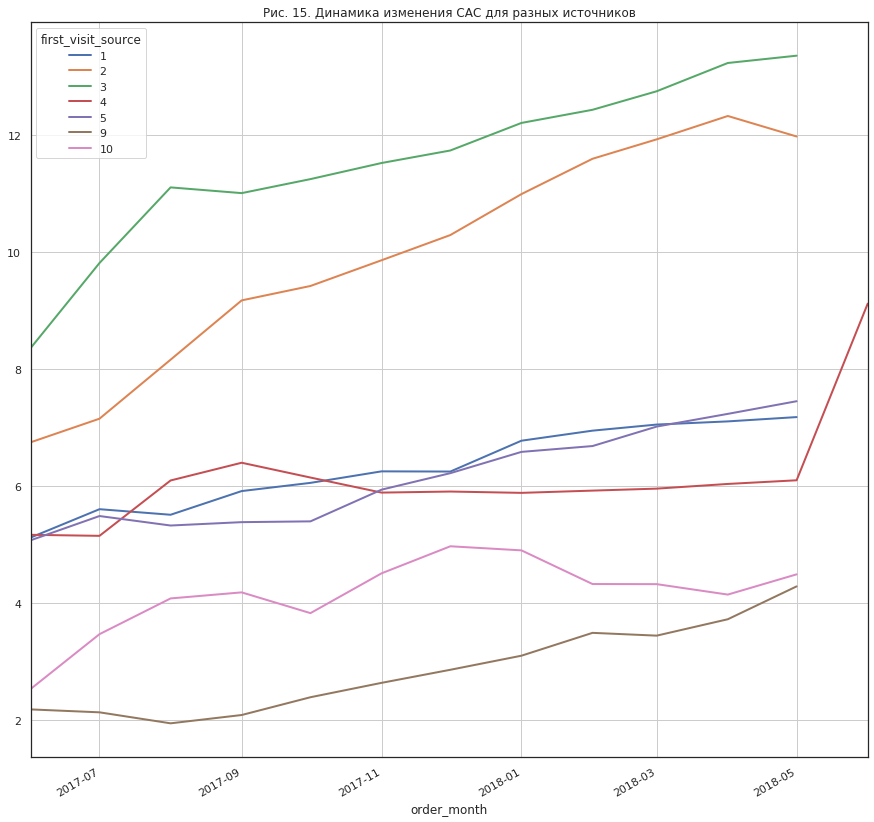

In [94]:
output_cac_sources.plot(linewidth=2, markersize=12, figsize=(15, 15), grid=True, title='Рис. 15. Динамика изменения САС для разных источников')

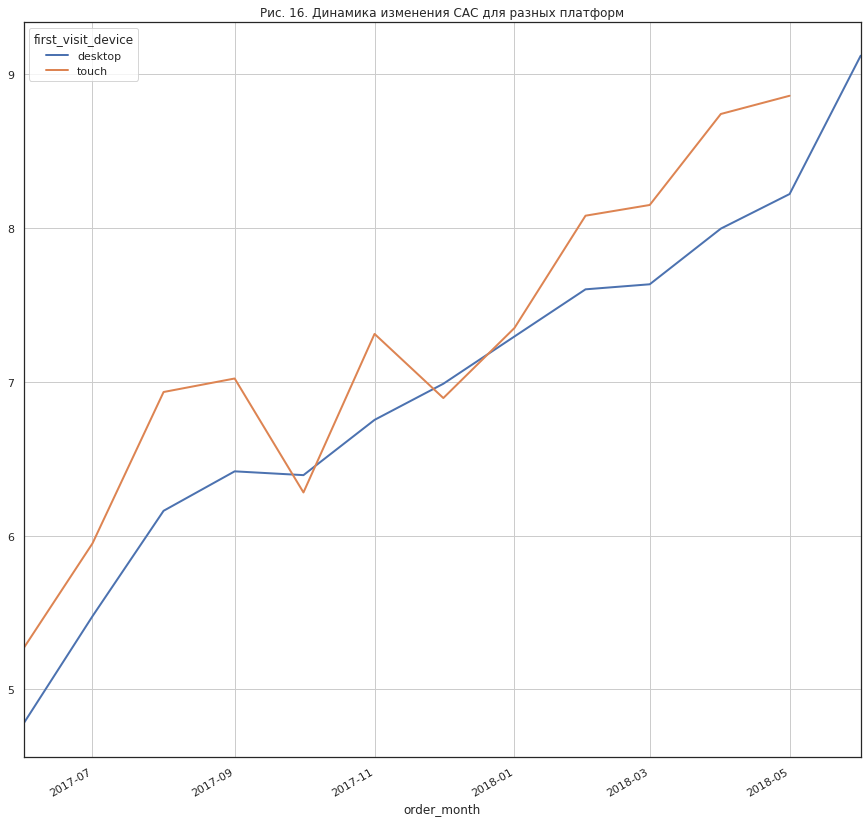

In [95]:
output_cac_device.plot(linewidth=2, markersize=12, figsize=(15, 15), grid=True, title='Рис. 16. Динамика изменения САС для разных платформ')

Стоимость привлечения клиента и валовая прибыль изменяются в зависимости от сезона и когорты (рис. 15, 16). Стоимость привлечения клиента и валовая прибыль изменяются в зависимости от сезона и когорты. То есть с точки зрения стоимости привлечения клиента наиболее дорогостоящими являются источники 1, 2, 3. Для всех источников характерно сезонное изменение расходов на средних значений стоимости привлечения клиентов. Наиболее дешевыми являются источники 9 и 10. Для оценки окупаемости расходов воспользуемся оценкой коэффициента ROMI.Для оценки окупаемости расходов воспользуемся оценкой коэффициента ROMI (рис. 17, 18).

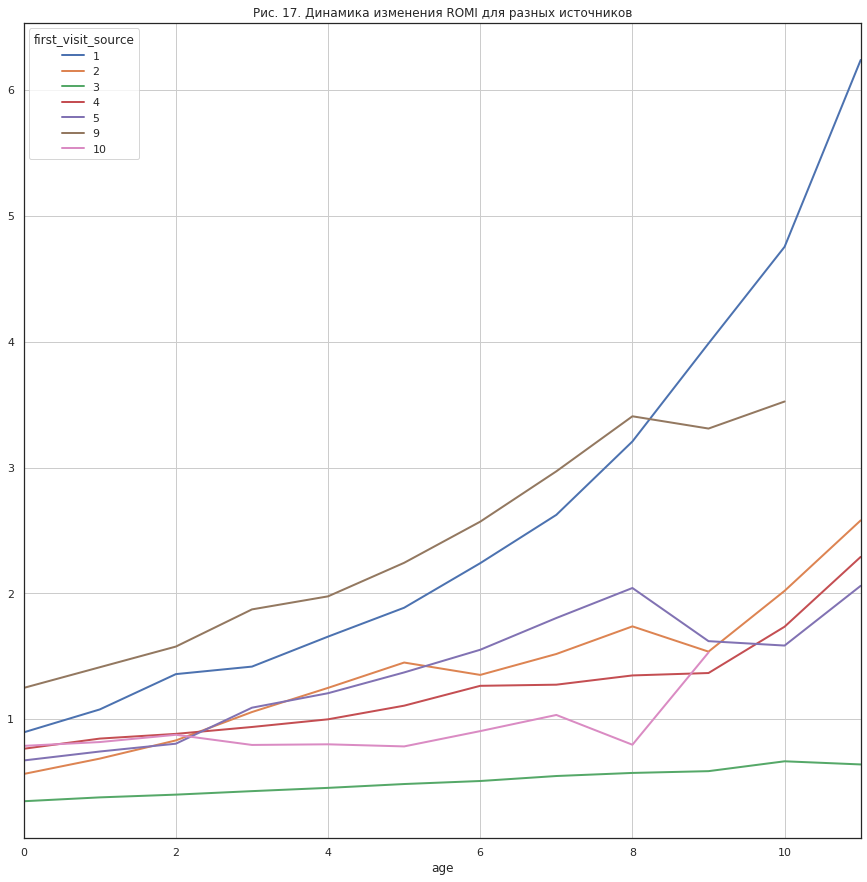

In [96]:
output_romi_sources.plot(linewidth=2, markersize=12, figsize=(15, 15), grid=True, title='Рис. 17. Динамика изменения ROMI для разных источников')

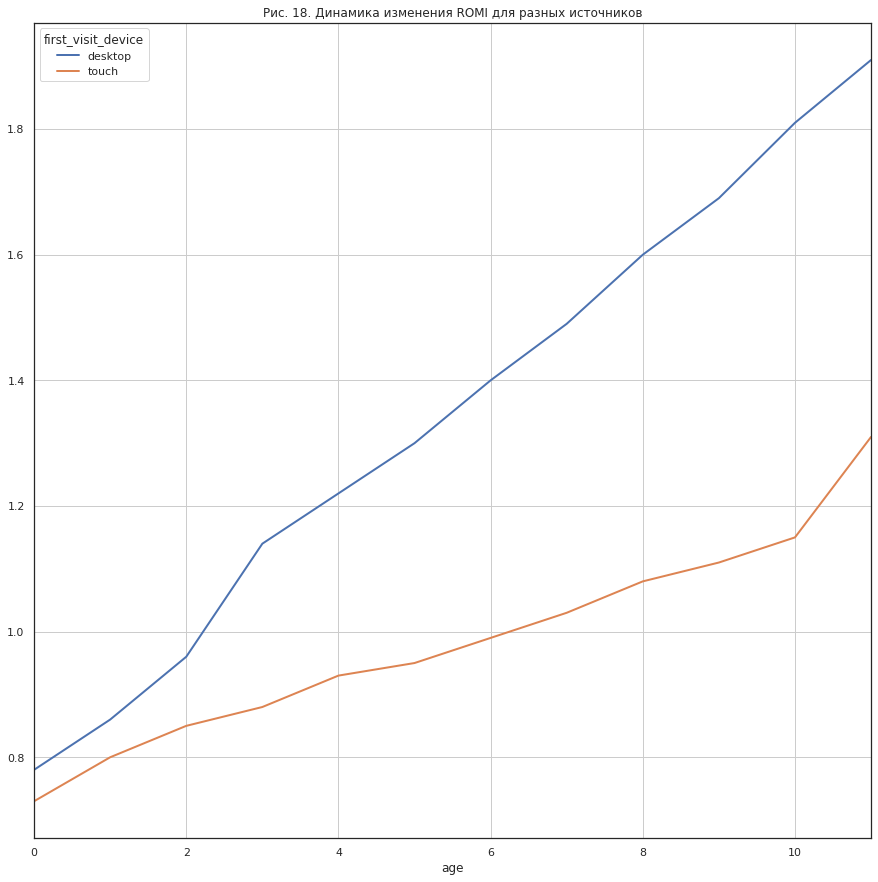

In [97]:
output_romi_devices.plot(linewidth=2, markersize=12, figsize=(15, 15), grid=True, title='Рис. 18. Динамика изменения ROMI для разных источников')

На рисунках 17, 18 приведена динамика накопительных коэффициентов ROMI для разных источников для мобильных устройств и ПК. Видно, что для источников 5, 9 и 10 характерно изменение накопительного коэффициента ROMI в зависимости от возраста когорты. В рассматриваемый промежуток времени окупаются источники 1, 2, 4, 5, 9, 10. Источник 3 не окупается. Наиболее быстро окупаются источники 9 и 1, медленнее 4, 2, 5, 10. Учитывая, что источники 9 и 10 являются также наименее затратными источниками, то целесообразно увеличить расходы на эти источники, также целесообразно продолжать вкладывать деньги в развитие источника 1. При сравнении мобильной платформы и ПК видно, что ПК окупается значительно быстрее.

<a id='the_destination20'></a>
# Общий вывод

На основании проведенного анализа можно порекомендовать развивать мобильное приложение, обеспечивая лучшее удержание клиентов за счет большого удобства пользования приложение, так как наблюдается положительная динамика с увеличением среднего чека на мобильных приложениях, то рекомендуется вкладывать ресурсы в разработку интерфейса, так как это позволит увеличить удержание клиентов, особенно в низкий сезон. Рекомендуется также провести пользовательские опросы для оценки удобства пользованием как мобильной версии, так и сайта, так как снижение удержания клиентов после января 2018 года для ПК версии сайта, говорит о возможных проблемах с пользованием также сайтом Яндекс.Афиша. Так как на мобильной версии Яндекс.Афиши наблюдается несколько меньший эффект от сезонности использования приложения, то целесообразно сделать упор на развитие мобильный версии сайта. 
Также рекомендуется увеличить расходы на маркетинг по источникам 9, 10, так как они дают наибольший положительный эффект с точки зрения окупаемости, продолжить вкладывать деньги в источник 1. Так как в настоящий момент расходы на маркетинг для ПК версии Яндекс.Афиши существенно превышают расходы для мобильной версии - то целесообразно прежде всего увеличивать расходы на мобильную версию за счет снижения расходов на источники 3 и 2.